In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Import alpaca-py as alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoLatestQuoteRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

In [5]:
# Declaring variable for client
client = CryptoHistoricalDataClient()

In [6]:
# Setting up params for request
request_params = CryptoLatestQuoteRequest(symbol_or_symbols="BTC/USD")

In [7]:
# Grabbing latest price with client
latest_quote = client.get_crypto_latest_quote(request_params)

In [8]:
# must use symbol to access even though it is single symbol
latest_quote["BTC/USD"].ask_price

28691.73

In [9]:
# Updating params for historical price data
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime.strptime("2020-04-01", '%Y-%m-%d')
                        )

In [10]:
# Grabbing historical data
bars = client.get_crypto_bars(request_params)

In [11]:
# convert to dataframe
bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-04-16 05:00:00+00:00  30331.71  30571.93  29805.39  30022.52   
        2023-04-17 05:00:00+00:00  30021.25  30046.03  29118.04  29514.71   
        2023-04-18 05:00:00+00:00  29514.67  30498.99  29514.67  30223.30   
        2023-04-19 05:00:00+00:00  30223.30  30342.52  28591.00  28910.70   
        2023-04-20 05:00:00+00:00  28915.17  29102.49  28668.85  28673.97   

                                       volume  trade_count          vwap  
symbol  timestamp                                                         
BTC/USD 2020-04-08 05:00:00+00:00     0.00010          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.00020          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.00010          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.08400          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.01340          3.0   8715.805970  
...                                       ...          ...           ...  
        2023-04-16 05:00:00+00:00  5065.19225      95612.0  30270.499399  
        2023-04-17 05:00:00+00:00  6955.69084     110060.0  29539.296045  
        2023-04-18 05:00:00+00:00  8185.48649     127611.0  30167.675987  
        2023-04-19 05:00:00+00:00  9832.70648     173320.0  29296.807967  
        2023-04-20 05:00:00+00:00  1311.83456      20627.0  28892.647778  

[1078 rows x 7 columns]

In [12]:
# Setting as dataframe variable
btc_df = bars.df
btc_df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-04-16 05:00:00+00:00  30331.71  30571.93  29805.39  30022.52   
        2023-04-17 05:00:00+00:00  30021.25  30046.03  29118.04  29514.71   
        2023-04-18 05:00:00+00:00  29514.67  30498.99  29514.67  30223.30   
        2023-04-19 05:00:00+00:00  30223.30  30342.52  28591.00  28910.70   
        2023-04-20 05:00:00+00:00  28915.17  29102.49  28668.85  28673.97   

                                       volume  trade_count          vwap  
symbol  timestamp                                                         
BTC/USD 2020-04-08 05:00:00+00:00     0.00010          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.00020          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.00010          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.08400          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.01340          3.0   8715.805970  
...                                       ...          ...           ...  
        2023-04-16 05:00:00+00:00  5065.19225      95612.0  30270.499399  
        2023-04-17 05:00:00+00:00  6955.69084     110060.0  29539.296045  
        2023-04-18 05:00:00+00:00  8185.48649     127611.0  30167.675987  
        2023-04-19 05:00:00+00:00  9832.70648     173320.0  29296.807967  
        2023-04-20 05:00:00+00:00  1311.83456      20627.0  28892.647778  

[1078 rows x 7 columns]

In [13]:
# Checking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1078 entries, ('BTC/USD', Timestamp('2020-04-08 05:00:00+0000', tz='UTC')) to ('BTC/USD', Timestamp('2023-04-20 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         1078 non-null   float64
 1   high         1078 non-null   float64
 2   low          1078 non-null   float64
 3   close        1078 non-null   float64
 4   volume       1078 non-null   float64
 5   trade_count  1078 non-null   float64
 6   vwap         1078 non-null   float64
dtypes: float64(7)
memory usage: 103.0+ KB


In [14]:
# Reset index to access symbol and timestamp as columns
btc_df = btc_df.reset_index()
btc_df

symbol                 timestamp      open      high       low  \
0     BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   
1     BTC/USD 2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   
2     BTC/USD 2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   
3     BTC/USD 2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   
4     BTC/USD 2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   
...       ...                       ...       ...       ...       ...   
1073  BTC/USD 2023-04-16 05:00:00+00:00  30331.71  30571.93  29805.39   
1074  BTC/USD 2023-04-17 05:00:00+00:00  30021.25  30046.03  29118.04   
1075  BTC/USD 2023-04-18 05:00:00+00:00  29514.67  30498.99  29514.67   
1076  BTC/USD 2023-04-19 05:00:00+00:00  30223.30  30342.52  28591.00   
1077  BTC/USD 2023-04-20 05:00:00+00:00  28915.17  29102.49  28668.85   

         close      volume  trade_count          vwap  
0      7314.00     0.00010          1.0   7314.000000  
1      7100.00     0.00020          2.0   7100.750000  
2      7118.50     0.00010          1.0   7118.500000  
3      7836.00     0.08400          2.0   7835.687500  
4      8653.00     0.01340          3.0   8715.805970  
...        ...         ...          ...           ...  
1073  30022.52  5065.19225      95612.0  30270.499399  
1074  29514.71  6955.69084     110060.0  29539.296045  
1075  30223.30  8185.48649     127611.0  30167.675987  
1076  28910.70  9832.70648     173320.0  29296.807967  
1077  28673.97  1311.83456      20627.0  28892.647778  

[1078 rows x 9 columns]

In [15]:
# Revising time out of timestamp column
import datetime as dt
btc_df['timestamp'] = btc_df['timestamp'].dt.date
btc_df

symbol   timestamp      open      high       low     close      volume  \
0     BTC/USD  2020-04-08   7314.00   7314.00   7314.00   7314.00     0.00010   
1     BTC/USD  2020-04-14   7101.50   7101.50   7100.00   7100.00     0.00020   
2     BTC/USD  2020-04-22   7118.50   7118.50   7118.50   7118.50     0.00010   
3     BTC/USD  2020-04-28   7748.50   7836.00   7748.50   7836.00     0.08400   
4     BTC/USD  2020-04-30   8829.00   8829.00   8653.00   8653.00     0.01340   
...       ...         ...       ...       ...       ...       ...         ...   
1073  BTC/USD  2023-04-16  30331.71  30571.93  29805.39  30022.52  5065.19225   
1074  BTC/USD  2023-04-17  30021.25  30046.03  29118.04  29514.71  6955.69084   
1075  BTC/USD  2023-04-18  29514.67  30498.99  29514.67  30223.30  8185.48649   
1076  BTC/USD  2023-04-19  30223.30  30342.52  28591.00  28910.70  9832.70648   
1077  BTC/USD  2023-04-20  28915.17  29102.49  28668.85  28673.97  1311.83456   

      trade_count          vwap  
0             1.0   7314.000000  
1             2.0   7100.750000  
2             1.0   7118.500000  
3             2.0   7835.687500  
4             3.0   8715.805970  
...           ...           ...  
1073      95612.0  30270.499399  
1074     110060.0  29539.296045  
1075     127611.0  30167.675987  
1076     173320.0  29296.807967  
1077      20627.0  28892.647778  

[1078 rows x 9 columns]

In [16]:
# Setting up pivot to get subset of closing prices
btc_pivot = btc_df.pivot_table(values='close', index='timestamp', columns='symbol')
btc_pivot

symbol       BTC/USD
timestamp           
2020-04-08   7314.00
2020-04-14   7100.00
2020-04-22   7118.50
2020-04-28   7836.00
2020-04-30   8653.00
...              ...
2023-04-16  30022.52
2023-04-17  29514.71
2023-04-18  30223.30
2023-04-19  28910.70
2023-04-20  28673.97

[1078 rows x 1 columns]

In [17]:
# Checking for nulls
btc_pivot.isnull().sum()

symbol
BTC/USD    0
dtype: int64

In [18]:
# Running percentage change calculation and conversion
btc_daily = btc_pivot.pct_change()
btc_daily

symbol       BTC/USD
timestamp           
2020-04-08       NaN
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262
...              ...
2023-04-16 -0.010098
2023-04-17 -0.016914
2023-04-18  0.024008
2023-04-19 -0.043430
2023-04-20 -0.008188

[1078 rows x 1 columns]

In [19]:
# Recheck nulls
btc_daily.isnull().sum()

symbol
BTC/USD    1
dtype: int64

In [20]:
# Drop nulls
btc_daily = btc_daily.dropna()
btc_daily

symbol       BTC/USD
timestamp           
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262
2020-05-01  0.018895
...              ...
2023-04-16 -0.010098
2023-04-17 -0.016914
2023-04-18  0.024008
2023-04-19 -0.043430
2023-04-20 -0.008188

[1077 rows x 1 columns]

In [21]:
# Checking info
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 2020-04-14 to 2023-04-20
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC/USD  1077 non-null   float64
dtypes: float64(1)
memory usage: 16.8+ KB


In [22]:
# Setting up dependencies for stock price data
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest

In [23]:
# keys required for stock historical data client
stock_client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

In [24]:
# params request for multiple tickers
multisymbol_request_params = StockBarsRequest(symbol_or_symbols=["SPY", "GLD", "TLT"],
                                              timeframe=TimeFrame.Day, 
                                              start=datetime.strptime("2020-04-08", '%Y-%m-%d')
                                             )

In [25]:
# pulling data
historical_quotes = stock_client.get_stock_bars(multisymbol_request_params)

In [26]:
# Display as dataframe
historical_quotes.df

open     high       low   close  \
symbol timestamp                                                      
GLD    2020-04-08 04:00:00+00:00  155.91  155.940  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.080  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.380  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.420  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.540  160.8061  162.00   
...                                  ...      ...       ...     ...   
TLT    2023-04-13 04:00:00+00:00  107.05  107.390  105.8800  106.05   
       2023-04-14 04:00:00+00:00  105.39  105.550  104.7700  105.08   
       2023-04-17 04:00:00+00:00  104.42  104.590  103.7100  103.83   
       2023-04-18 04:00:00+00:00  103.81  104.585  103.8000  104.20   
       2023-04-19 04:00:00+00:00  103.91  104.237  103.4750  104.10   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-04-13 04:00:00+00:00  22079384.0     118196.0  106.430780  
       2023-04-14 04:00:00+00:00  19596665.0     125043.0  105.119817  
       2023-04-17 04:00:00+00:00  19535102.0     114719.0  103.953381  
       2023-04-18 04:00:00+00:00  15922623.0      88745.0  104.189647  
       2023-04-19 04:00:00+00:00  14474040.0      93795.0  103.872673  

[2289 rows x 7 columns]

In [27]:
# Save as df variable
stock_df = historical_quotes.df
stock_df

open     high       low   close  \
symbol timestamp                                                      
GLD    2020-04-08 04:00:00+00:00  155.91  155.940  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.080  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.380  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.420  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.540  160.8061  162.00   
...                                  ...      ...       ...     ...   
TLT    2023-04-13 04:00:00+00:00  107.05  107.390  105.8800  106.05   
       2023-04-14 04:00:00+00:00  105.39  105.550  104.7700  105.08   
       2023-04-17 04:00:00+00:00  104.42  104.590  103.7100  103.83   
       2023-04-18 04:00:00+00:00  103.81  104.585  103.8000  104.20   
       2023-04-19 04:00:00+00:00  103.91  104.237  103.4750  104.10   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-04-13 04:00:00+00:00  22079384.0     118196.0  106.430780  
       2023-04-14 04:00:00+00:00  19596665.0     125043.0  105.119817  
       2023-04-17 04:00:00+00:00  19535102.0     114719.0  103.953381  
       2023-04-18 04:00:00+00:00  15922623.0      88745.0  104.189647  
       2023-04-19 04:00:00+00:00  14474040.0      93795.0  103.872673  

[2289 rows x 7 columns]

In [28]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2289 entries, ('GLD', Timestamp('2020-04-08 04:00:00+0000', tz='UTC')) to ('TLT', Timestamp('2023-04-19 04:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2289 non-null   float64
 1   high         2289 non-null   float64
 2   low          2289 non-null   float64
 3   close        2289 non-null   float64
 4   volume       2289 non-null   float64
 5   trade_count  2289 non-null   float64
 6   vwap         2289 non-null   float64
dtypes: float64(7)
memory usage: 154.2+ KB


In [29]:
# Reset index to access symbol and timestamp as columns
stock_df = stock_df.reset_index()
stock_df

symbol                 timestamp    open     high       low   close  \
0       GLD 2020-04-08 04:00:00+00:00  155.91  155.940  154.5900  154.65   
1       GLD 2020-04-09 04:00:00+00:00  158.08  159.080  157.2100  158.58   
2       GLD 2020-04-13 04:00:00+00:00  159.17  162.380  158.6250  161.41   
3       GLD 2020-04-14 04:00:00+00:00  162.73  164.420  161.7800  162.66   
4       GLD 2020-04-15 04:00:00+00:00  161.80  162.540  160.8061  162.00   
...     ...                       ...     ...      ...       ...     ...   
2284    TLT 2023-04-13 04:00:00+00:00  107.05  107.390  105.8800  106.05   
2285    TLT 2023-04-14 04:00:00+00:00  105.39  105.550  104.7700  105.08   
2286    TLT 2023-04-17 04:00:00+00:00  104.42  104.590  103.7100  103.83   
2287    TLT 2023-04-18 04:00:00+00:00  103.81  104.585  103.8000  104.20   
2288    TLT 2023-04-19 04:00:00+00:00  103.91  104.237  103.4750  104.10   

          volume  trade_count        vwap  
0      7600804.0      60704.0  155.233884  
1     18123039.0     140239.0  158.255634  
2     20549213.0     140401.0  160.906373  
3     17095086.0     146336.0  163.197557  
4     12141890.0      95518.0  161.749049  
...          ...          ...         ...  
2284  22079384.0     118196.0  106.430780  
2285  19596665.0     125043.0  105.119817  
2286  19535102.0     114719.0  103.953381  
2287  15922623.0      88745.0  104.189647  
2288  14474040.0      93795.0  103.872673  

[2289 rows x 9 columns]

In [30]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       2289 non-null   object             
 1   timestamp    2289 non-null   datetime64[ns, UTC]
 2   open         2289 non-null   float64            
 3   high         2289 non-null   float64            
 4   low          2289 non-null   float64            
 5   close        2289 non-null   float64            
 6   volume       2289 non-null   float64            
 7   trade_count  2289 non-null   float64            
 8   vwap         2289 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 161.1+ KB


In [31]:
# Revising time out of timestamp column
stock_df['timestamp'] = stock_df['timestamp'].dt.date
stock_df

symbol   timestamp    open     high       low   close      volume  \
0       GLD  2020-04-08  155.91  155.940  154.5900  154.65   7600804.0   
1       GLD  2020-04-09  158.08  159.080  157.2100  158.58  18123039.0   
2       GLD  2020-04-13  159.17  162.380  158.6250  161.41  20549213.0   
3       GLD  2020-04-14  162.73  164.420  161.7800  162.66  17095086.0   
4       GLD  2020-04-15  161.80  162.540  160.8061  162.00  12141890.0   
...     ...         ...     ...      ...       ...     ...         ...   
2284    TLT  2023-04-13  107.05  107.390  105.8800  106.05  22079384.0   
2285    TLT  2023-04-14  105.39  105.550  104.7700  105.08  19596665.0   
2286    TLT  2023-04-17  104.42  104.590  103.7100  103.83  19535102.0   
2287    TLT  2023-04-18  103.81  104.585  103.8000  104.20  15922623.0   
2288    TLT  2023-04-19  103.91  104.237  103.4750  104.10  14474040.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2284     118196.0  106.430780  
2285     125043.0  105.119817  
2286     114719.0  103.953381  
2287      88745.0  104.189647  
2288      93795.0  103.872673  

[2289 rows x 9 columns]

In [32]:
# Subset of SPY only
loc_df = stock_df.loc[(stock_df.symbol == 'SPY'), :]
loc_df

symbol   timestamp    open      high       low   close       volume  \
763     SPY  2020-04-08  267.96  276.0000  265.2542  274.00  153774487.0   
764     SPY  2020-04-09  277.58  281.2000  275.4700  278.22  190283195.0   
765     SPY  2020-04-13  277.14  277.5100  271.4100  275.63  114868253.0   
766     SPY  2020-04-14  280.98  284.9000  275.5106  283.80  134143470.0   
767     SPY  2020-04-15  277.57  283.9407  275.4600  277.75  121779042.0   
...     ...         ...     ...       ...       ...     ...          ...   
1521    SPY  2023-04-13  409.18  413.8400  407.9922  413.47   85814754.0   
1522    SPY  2023-04-14  412.81  415.0900  410.0600  412.46   75973321.0   
1523    SPY  2023-04-17  412.37  413.9600  411.0850  413.94   66447057.0   
1524    SPY  2023-04-18  415.58  415.7200  412.7802  414.21   63558297.0   
1525    SPY  2023-04-19  412.22  415.0800  412.1600  414.14   53692789.0   

      trade_count        vwap  
763      950859.0  271.051454  
764     1171999.0  278.251697  
765      752225.0  274.512847  
766      761246.0  282.089774  
767      711140.0  277.826041  
...           ...         ...  
1521     566796.0  411.717306  
1522     573427.0  412.263399  
1523     478342.0  412.589811  
1524     493076.0  414.073774  
1525     407857.0  413.666676  

[763 rows x 9 columns]

In [33]:
# Pivot for SPY
spy_pivot = loc_df.pivot_table(values='close', index='timestamp', columns='symbol')
spy_pivot

symbol         SPY
timestamp         
2020-04-08  274.00
2020-04-09  278.22
2020-04-13  275.63
2020-04-14  283.80
2020-04-15  277.75
...            ...
2023-04-13  413.47
2023-04-14  412.46
2023-04-17  413.94
2023-04-18  414.21
2023-04-19  414.14

[763 rows x 1 columns]

In [34]:
# Checking info
spy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 2020-04-08 to 2023-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     763 non-null    float64
dtypes: float64(1)
memory usage: 11.9+ KB


In [35]:
# Running percentage change calculation and conversion
spy_daily = spy_pivot.pct_change()
spy_daily

symbol           SPY
timestamp           
2020-04-08       NaN
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318
...              ...
2023-04-13  0.013283
2023-04-14 -0.002443
2023-04-17  0.003588
2023-04-18  0.000652
2023-04-19 -0.000169

[763 rows x 1 columns]

In [36]:
# Dropping nulls
spy_daily = spy_daily.dropna()
spy_daily

symbol           SPY
timestamp           
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318
2020-04-16  0.004356
...              ...
2023-04-13  0.013283
2023-04-14 -0.002443
2023-04-17  0.003588
2023-04-18  0.000652
2023-04-19 -0.000169

[762 rows x 1 columns]

In [37]:
# Subset of GLD only
gld_df = stock_df.loc[(stock_df.symbol == 'GLD'), :]
gld_df

symbol   timestamp      open      high       low   close      volume  \
0      GLD  2020-04-08  155.9100  155.9400  154.5900  154.65   7600804.0   
1      GLD  2020-04-09  158.0800  159.0800  157.2100  158.58  18123039.0   
2      GLD  2020-04-13  159.1700  162.3800  158.6250  161.41  20549213.0   
3      GLD  2020-04-14  162.7300  164.4200  161.7800  162.66  17095086.0   
4      GLD  2020-04-15  161.8000  162.5400  160.8061  162.00  12141890.0   
..     ...         ...       ...       ...       ...     ...         ...   
758    GLD  2023-04-13  189.7600  190.4100  188.9900  189.72  14060106.0   
759    GLD  2023-04-14  188.0800  188.4869  185.1700  186.36  12842840.0   
760    GLD  2023-04-17  185.8900  185.9300  184.1000  185.53   7468417.0   
761    GLD  2023-04-18  185.2400  186.9900  185.0400  186.25   8056928.0   
762    GLD  2023-04-19  184.3336  185.5800  184.2800  185.36   7172972.0   

     trade_count        vwap  
0        60704.0  155.233884  
1       140239.0  158.255634  
2       140401.0  160.906373  
3       146336.0  163.197557  
4        95518.0  161.749049  
..           ...         ...  
758      98409.0  189.670862  
759     100920.0  186.440870  
760      68030.0  185.144564  
761      59961.0  186.350672  
762      62297.0  185.112158  

[763 rows x 9 columns]

In [38]:
# Pivot for GLD
gld_pivot = gld_df.pivot_table(values='close', index='timestamp', columns='symbol')
gld_pivot

symbol         GLD
timestamp         
2020-04-08  154.65
2020-04-09  158.58
2020-04-13  161.41
2020-04-14  162.66
2020-04-15  162.00
...            ...
2023-04-13  189.72
2023-04-14  186.36
2023-04-17  185.53
2023-04-18  186.25
2023-04-19  185.36

[763 rows x 1 columns]

In [39]:
# Checking info
gld_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 2020-04-08 to 2023-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     763 non-null    float64
dtypes: float64(1)
memory usage: 11.9+ KB


In [40]:
# Running percentage change calculation and conversion
gld_daily = gld_pivot.pct_change()
gld_daily

symbol           GLD
timestamp           
2020-04-08       NaN
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058
...              ...
2023-04-13  0.013516
2023-04-14 -0.017710
2023-04-17 -0.004454
2023-04-18  0.003881
2023-04-19 -0.004779

[763 rows x 1 columns]

In [41]:
# Dropping nulls
gld_daily = gld_daily.dropna()
gld_daily

symbol           GLD
timestamp           
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058
2020-04-16 -0.001790
...              ...
2023-04-13  0.013516
2023-04-14 -0.017710
2023-04-17 -0.004454
2023-04-18  0.003881
2023-04-19 -0.004779

[762 rows x 1 columns]

In [42]:
# Subset of TLT only
tlt_df = stock_df.loc[(stock_df.symbol == 'TLT'), :]
tlt_df

symbol   timestamp    open     high      low   close      volume  \
1526    TLT  2020-04-08  165.11  166.190  164.130  165.09  10147077.0   
1527    TLT  2020-04-09  164.28  165.790  163.780  165.39  14260806.0   
1528    TLT  2020-04-13  164.75  165.710  163.880  163.88   8750297.0   
1529    TLT  2020-04-14  163.84  164.740  163.480  163.84   9019531.0   
1530    TLT  2020-04-15  166.80  168.600  166.740  168.18  10027752.0   
...     ...         ...     ...      ...      ...     ...         ...   
2284    TLT  2023-04-13  107.05  107.390  105.880  106.05  22079384.0   
2285    TLT  2023-04-14  105.39  105.550  104.770  105.08  19596665.0   
2286    TLT  2023-04-17  104.42  104.590  103.710  103.83  19535102.0   
2287    TLT  2023-04-18  103.81  104.585  103.800  104.20  15922623.0   
2288    TLT  2023-04-19  103.91  104.237  103.475  104.10  14474040.0   

      trade_count        vwap  
1526      63686.0  165.217491  
1527      82515.0  164.996594  
1528      60771.0  164.679842  
1529      62051.0  164.073826  
1530      63827.0  167.874800  
...           ...         ...  
2284     118196.0  106.430780  
2285     125043.0  105.119817  
2286     114719.0  103.953381  
2287      88745.0  104.189647  
2288      93795.0  103.872673  

[763 rows x 9 columns]

In [43]:
# Pivot for TLT
tlt_pivot = tlt_df.pivot_table(values='close', index='timestamp', columns='symbol')
tlt_pivot

symbol         TLT
timestamp         
2020-04-08  165.09
2020-04-09  165.39
2020-04-13  163.88
2020-04-14  163.84
2020-04-15  168.18
...            ...
2023-04-13  106.05
2023-04-14  105.08
2023-04-17  103.83
2023-04-18  104.20
2023-04-19  104.10

[763 rows x 1 columns]

In [44]:
# Checking info
tlt_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 2020-04-08 to 2023-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TLT     763 non-null    float64
dtypes: float64(1)
memory usage: 11.9+ KB


In [45]:
# Running percentage change calculation and conversion
tlt_daily = tlt_pivot.pct_change()
tlt_daily

symbol           TLT
timestamp           
2020-04-08       NaN
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489
...              ...
2023-04-13 -0.007859
2023-04-14 -0.009147
2023-04-17 -0.011896
2023-04-18  0.003564
2023-04-19 -0.000960

[763 rows x 1 columns]

In [46]:
# Dropping nulls
tlt_daily = tlt_daily.dropna()
tlt_daily

symbol           TLT
timestamp           
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489
2020-04-16  0.011357
...              ...
2023-04-13 -0.007859
2023-04-14 -0.009147
2023-04-17 -0.011896
2023-04-18  0.003564
2023-04-19 -0.000960

[762 rows x 1 columns]

In [47]:
# Running cumprod (cumulative product) function over BTC Daily Returns to calculate overall gain / loss
BTC_cumprod = (1 + btc_daily).cumprod()
BTC_prod_annotation = (BTC_cumprod.iloc[-1][0]*100).round().astype(int)
BTC_cumprod

symbol       BTC/USD
timestamp           
2020-04-14  0.970741
2020-04-22  0.973270
2020-04-28  1.071370
2020-04-30  1.183074
2020-05-01  1.205428
...              ...
2023-04-16  4.104802
2023-04-17  4.035372
2023-04-18  4.132253
2023-04-19  3.952789
2023-04-20  3.920422

[1077 rows x 1 columns]

In [48]:
# Running cumprod (cumulative product) function over SPY Daily Returns to calculate overall gain / loss
SPY_cumprod = (1 + spy_daily).cumprod()
SPY_prod_annotation = (SPY_cumprod.iloc[-1][0]*100).round().astype(int)
SPY_cumprod

symbol           SPY
timestamp           
2020-04-09  1.015401
2020-04-13  1.005949
2020-04-14  1.035766
2020-04-15  1.013686
2020-04-16  1.018102
...              ...
2023-04-13  1.509015
2023-04-14  1.505328
2023-04-17  1.510730
2023-04-18  1.511715
2023-04-19  1.511460

[762 rows x 1 columns]

In [49]:
# Running cumprod (cumulative product) function over GLD Daily Returns to calculate overall gain / loss
GLD_cumprod = (1 + gld_daily).cumprod()
GLD_prod_annotation = (GLD_cumprod.iloc[-1][0]*100).round().astype(int)
GLD_cumprod

symbol           GLD
timestamp           
2020-04-09  1.025412
2020-04-13  1.043712
2020-04-14  1.051794
2020-04-15  1.047527
2020-04-16  1.045651
...              ...
2023-04-13  1.226770
2023-04-14  1.205044
2023-04-17  1.199677
2023-04-18  1.204332
2023-04-19  1.198577

[762 rows x 1 columns]

In [50]:
# Running cumprod (cumulative product) function over TLT Daily Returns to calculate overall gain / loss
TLT_cumprod = (1 + tlt_daily).cumprod()
TLT_prod_annotation = (TLT_cumprod.iloc[-1][0]*100).round().astype(int)
TLT_cumprod

symbol           TLT
timestamp           
2020-04-09  1.001817
2020-04-13  0.992671
2020-04-14  0.992428
2020-04-15  1.018717
2020-04-16  1.030287
...              ...
2023-04-13  0.642377
2023-04-14  0.636501
2023-04-17  0.628930
2023-04-18  0.631171
2023-04-19  0.630565

[762 rows x 1 columns]

In [51]:
# Running cumulative return against initial investment to obtain current market value of investment in BTC
initial_investment = 10000
btc_profit = initial_investment * BTC_cumprod
btc_annotation = btc_profit.iloc[-1][0].round().astype(int)
btc_profit

symbol           BTC/USD
timestamp               
2020-04-14   9707.410446
2020-04-22   9732.704403
2020-04-28  10713.699754
2020-04-30  11830.735576
2020-05-01  12054.279464
...                  ...
2023-04-16  41048.017501
2023-04-17  40353.718895
2023-04-18  41322.532130
2023-04-19  39527.891715
2023-04-20  39204.224774

[1077 rows x 1 columns]

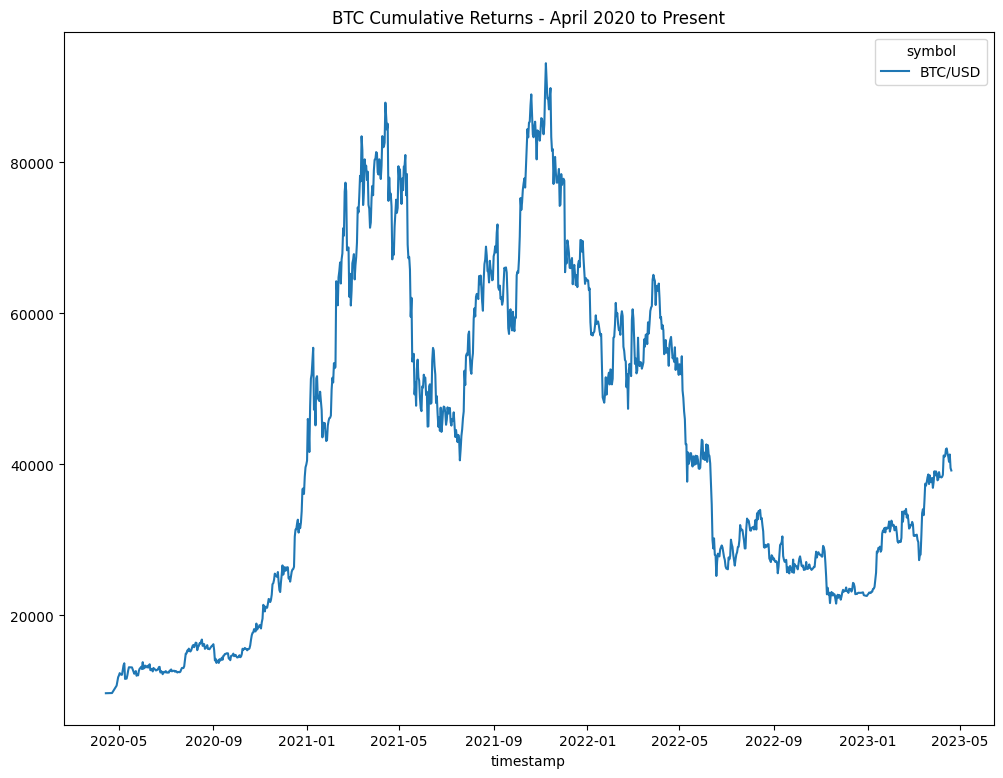

In [52]:
# Plot performance and save to Images
import matplotlib.pyplot as plt
btc_profit.plot(figsize=(12,9), legend=True, title="BTC Cumulative Returns - April 2020 to Present");
plt.savefig("Images/BTCCumulativeReturns.png")

In [53]:
# Running cumulative return against initial investment to obtain current market value of investment in SPY
spy_profit = initial_investment * SPY_cumprod
spy_annotation = spy_profit.iloc[-1][0].round().astype(int)
spy_profit

symbol               SPY
timestamp               
2020-04-09  10154.014599
2020-04-13  10059.489051
2020-04-14  10357.664234
2020-04-15  10136.861314
2020-04-16  10181.021898
...                  ...
2023-04-13  15090.145985
2023-04-14  15053.284672
2023-04-17  15107.299270
2023-04-18  15117.153285
2023-04-19  15114.598540

[762 rows x 1 columns]

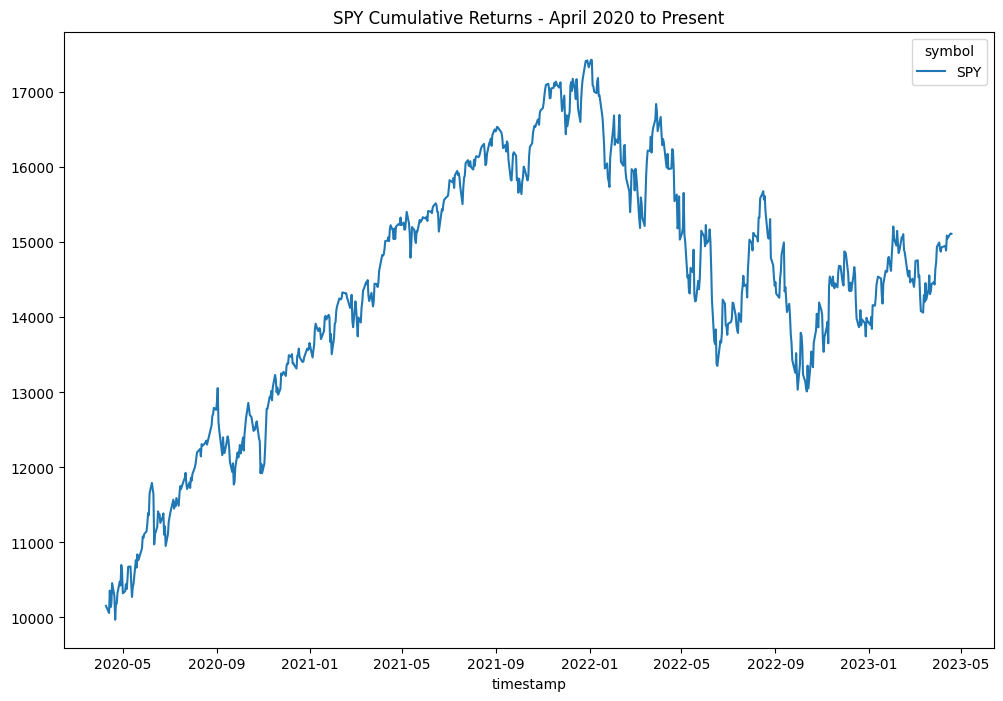

In [54]:
# Plot performance and save to Images
spy_profit.plot(figsize=(12,8), legend=True, title="SPY Cumulative Returns - April 2020 to Present");
plt.savefig("Images/SPYCumulativeReturns.png")

In [55]:
# Running cumulative return against initial investment to obtain current market value of investment in GLD
gld_profit = initial_investment * GLD_cumprod
gld_annotation = gld_profit.iloc[-1][0].round().astype(int)
gld_profit

symbol               GLD
timestamp               
2020-04-09  10254.122211
2020-04-13  10437.116069
2020-04-14  10517.943744
2020-04-15  10475.266731
2020-04-16  10456.514711
...                  ...
2023-04-13  12267.701261
2023-04-14  12050.436469
2023-04-17  11996.766893
2023-04-18  12043.323634
2023-04-19  11985.774329

[762 rows x 1 columns]

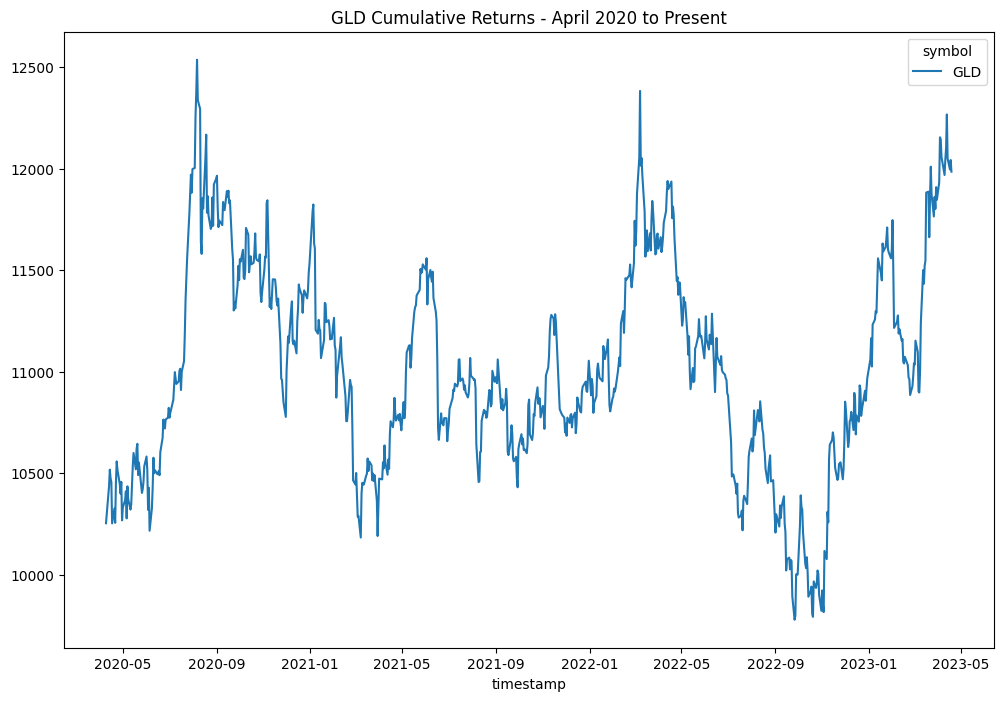

In [56]:
# Plot performance and save to Images
gld_profit.plot(figsize=(12,8), legend=True, title="GLD Cumulative Returns - April 2020 to Present");
plt.savefig("Images/GLDCumulativeReturns.png")

In [57]:
# Running cumulative return against initial investment to obtain current market value of investment in TLT
tlt_profit = initial_investment * TLT_cumprod
tlt_annotation = tlt_profit.iloc[-1][0].round().astype(int)
tlt_profit

symbol               TLT
timestamp               
2020-04-09  10018.171906
2020-04-13   9926.706645
2020-04-14   9924.283724
2020-04-15  10187.170634
2020-04-16  10302.865104
...                  ...
2023-04-13   6423.768853
2023-04-14   6365.013023
2023-04-17   6289.296747
2023-04-18   6311.708765
2023-04-19   6305.651463

[762 rows x 1 columns]

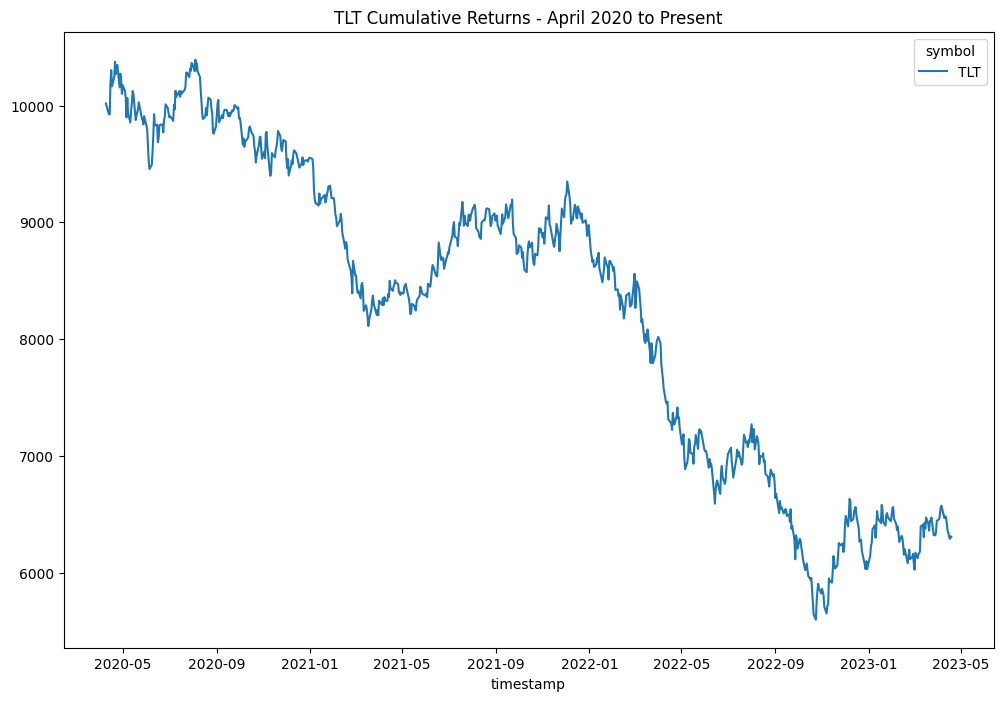

In [58]:
# Plot performance and save to Images
tlt_profit.plot(figsize=(12,8), legend=True, title="TLT Cumulative Returns - April 2020 to Present");
plt.savefig("Images/TLTCumulativeReturns.png")

In [59]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim = (date.today()+timedelta(days=88)).isoformat()

days_after_stocks = (date.today()+timedelta(days=2)).isoformat()

days_after_btc = (date.today()+timedelta(days=1)).isoformat()

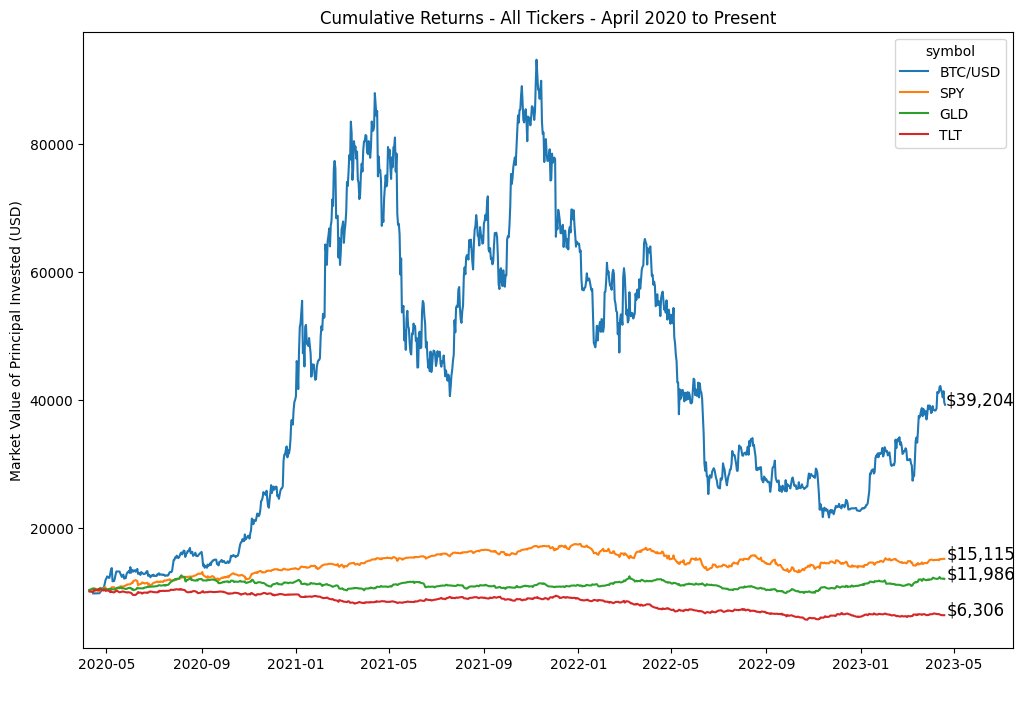

In [60]:
# Overlay of cumulative performances, $10k original investment
ax = btc_profit.plot(figsize=(12,8), legend=True, title="Cumulative Returns - All Tickers - April 2020 to Present")
spy_profit.plot(ax=ax, legend=True)
gld_profit.plot(ax=ax, legend=True)
tlt_profit.plot(ax=ax, legend=True)
ax.text(days_after_stocks, tlt_annotation, f"${tlt_annotation:,}", size=12)
ax.text(days_after_stocks, gld_annotation, f"${gld_annotation:,}", size=12)
ax.text(days_after_stocks, spy_annotation, f"${spy_annotation:,}", size=12)
ax.text(days_after_btc, btc_annotation, f"${btc_annotation:,}", size=12)
ax.set(ylabel='Market Value of Principal Invested (USD)',
       xlabel=' ')
ax.set_xlim('2020-04', days_after_xlim)
plt.savefig("Images/OverlayCumulativeReturns.png");

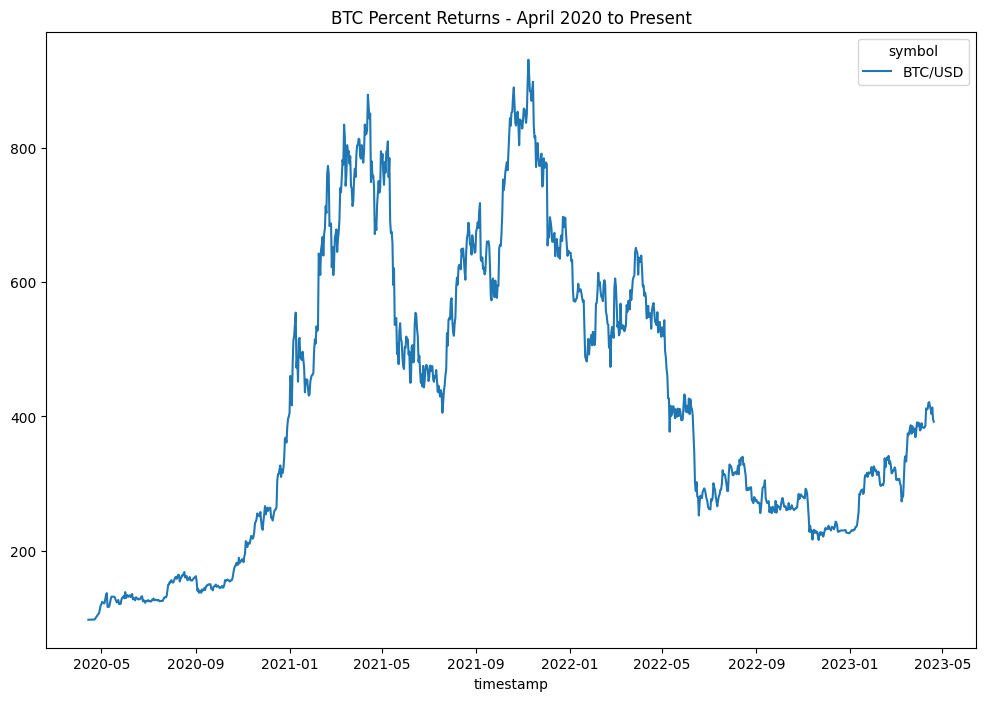

In [61]:
# Plot performance in percentage terms and save to Images
(BTC_cumprod*100).plot(figsize=(12,8), legend=True, title="BTC Percent Returns - April 2020 to Present");
plt.savefig("Images/BTCPercentReturns.png")

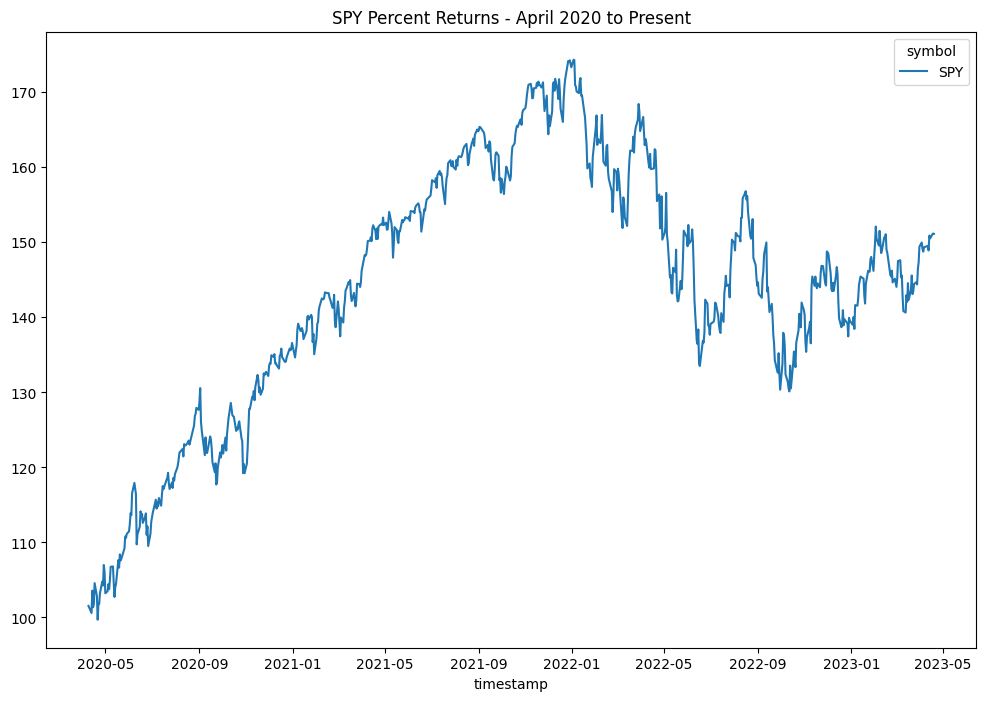

In [62]:
# Plot performance in percentage terms and save to Images
(SPY_cumprod*100).plot(figsize=(12,8), legend=True, title="SPY Percent Returns - April 2020 to Present");
plt.savefig("Images/SPYPercentReturns.png")

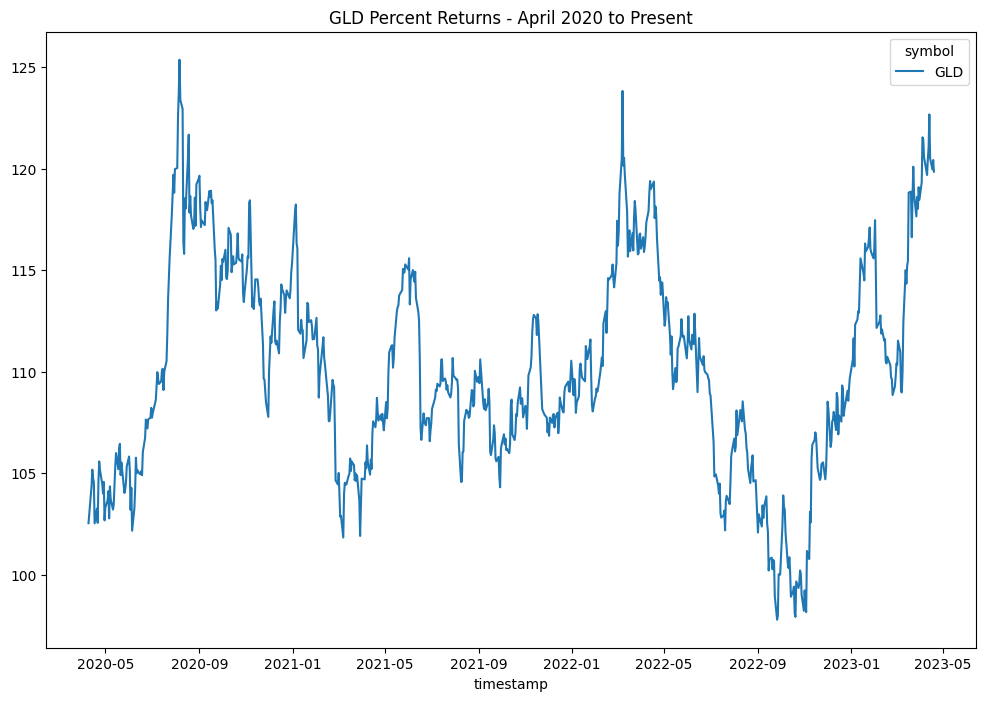

In [63]:
# Plot performance in percentage terms and save to Images
(GLD_cumprod*100).plot(figsize=(12,8), legend=True, title="GLD Percent Returns - April 2020 to Present");
plt.savefig("Images/GLDPercentReturns.png")

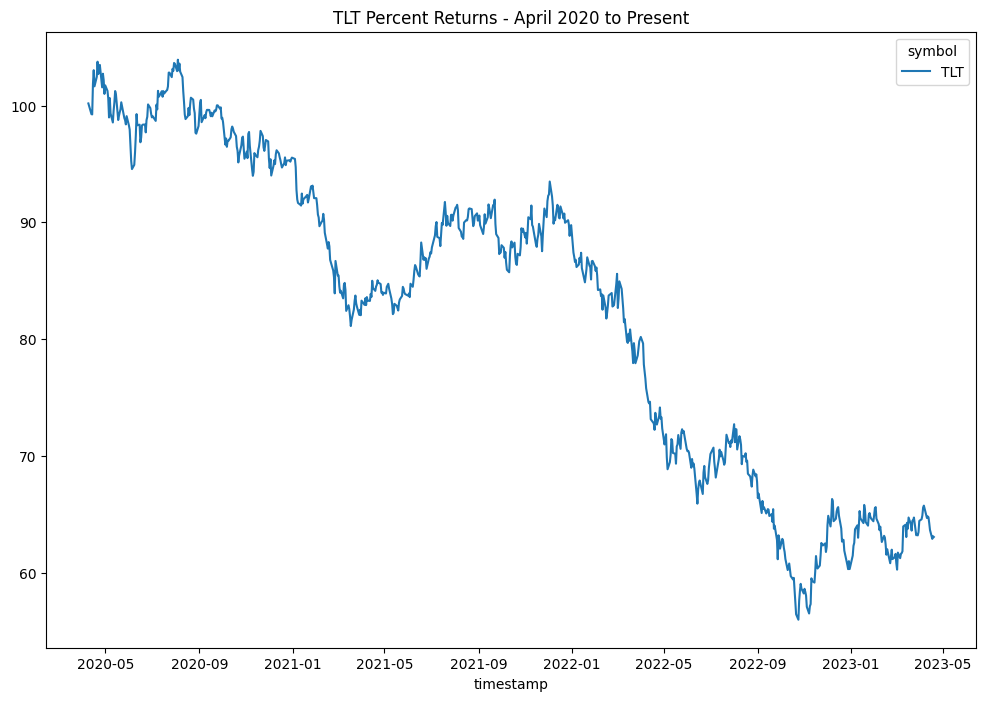

In [64]:
# Plot performance in percentage terms and save to Images
(TLT_cumprod*100).plot(figsize=(12,8), legend=True, title="TLT Percent Returns - April 2020 to Present");
plt.savefig("Images/TLTPercentReturns.png")

In [65]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim_pct = (date.today()+timedelta(days=70)).isoformat()

days_after_stocks_pct = (date.today()+timedelta(days=4)).isoformat()

days_after_btc_pct = (date.today()+timedelta(days=2)).isoformat()

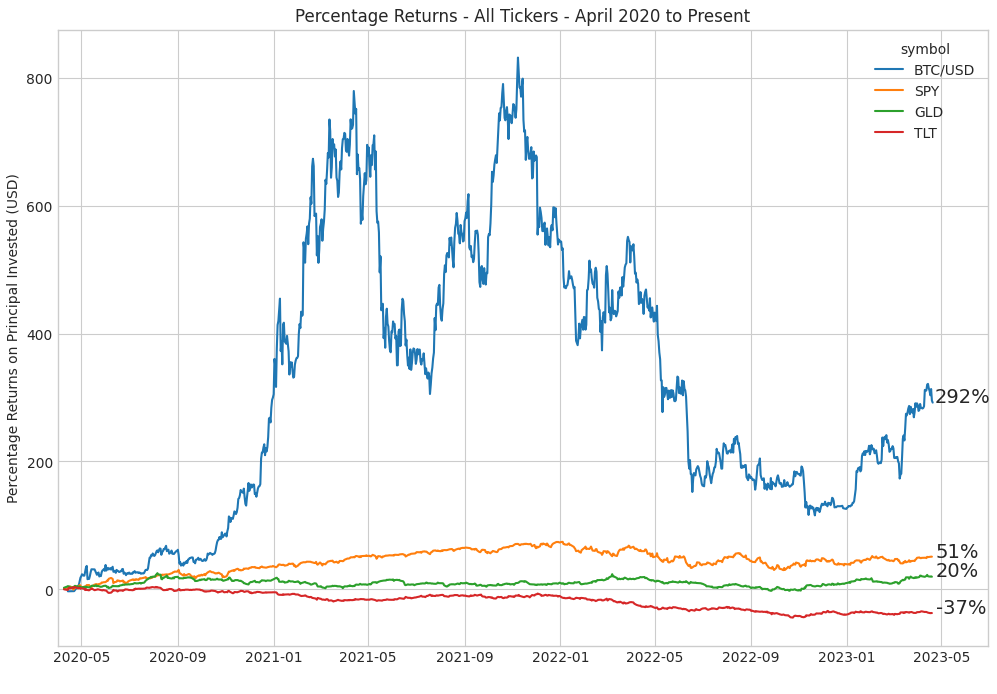

In [66]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = ((BTC_cumprod*100)-100).plot(figsize=(12,8), legend=True, title="Percentage Returns - All Tickers - April 2020 to Present")
    ((SPY_cumprod*100)-100).plot(ax=ax, legend=True)
    ((GLD_cumprod*100)-100).plot(ax=ax, legend=True)
    ((TLT_cumprod*100)-100).plot(ax=ax, legend=True)
    ax.text(days_after_stocks_pct, TLT_prod_annotation-100, f"{TLT_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, GLD_prod_annotation-100, f"{GLD_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, SPY_prod_annotation-100, f"{SPY_prod_annotation-100}%", size=14)
    ax.text(days_after_btc_pct, BTC_prod_annotation-100, f"{BTC_prod_annotation-100}%", size=14)
    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
    ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayPercentageReturns.png");

In [67]:
# Rechecking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1078 non-null   object 
 1   timestamp    1078 non-null   object 
 2   open         1078 non-null   float64
 3   high         1078 non-null   float64
 4   low          1078 non-null   float64
 5   close        1078 non-null   float64
 6   volume       1078 non-null   float64
 7   trade_count  1078 non-null   float64
 8   vwap         1078 non-null   float64
dtypes: float64(7), object(2)
memory usage: 75.9+ KB


In [68]:
# Shifting timestamp back to datetime to filter on month start dates
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       1078 non-null   object        
 1   timestamp    1078 non-null   datetime64[ns]
 2   open         1078 non-null   float64       
 3   high         1078 non-null   float64       
 4   low          1078 non-null   float64       
 5   close        1078 non-null   float64       
 6   volume       1078 non-null   float64       
 7   trade_count  1078 non-null   float64       
 8   vwap         1078 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 75.9+ KB


In [69]:
# Filtering for month start dates
btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
btc_monthly

symbol  timestamp      open      high       low     close       volume  \
5     BTC/USD 2020-05-01   8826.50   8834.00   8716.00   8816.50     0.300700   
29    BTC/USD 2020-06-01   9568.50  10393.00   9515.00  10106.50     5.950700   
59    BTC/USD 2020-07-01   9129.50   9270.00   9129.50   9240.50     5.467900   
90    BTC/USD 2020-08-01  11619.50  12035.00  10594.50  11221.50     0.667400   
116   BTC/USD 2020-09-01  11805.50  12005.50  11805.50  11847.50     0.404900   
146   BTC/USD 2020-10-01  10821.00  10913.00  10477.00  10654.50     5.505900   
177   BTC/USD 2020-11-01  13721.00  13842.50  13688.00  13688.00     1.499100   
207   BTC/USD 2020-12-01  19469.50  19916.00  18222.00  18586.50    32.057500   
238   BTC/USD 2021-01-01  29225.00  29631.00  28750.00  29631.00    25.076500   
269   BTC/USD 2021-02-01  33787.00  34697.00  33145.00  33992.00   815.611700   
297   BTC/USD 2021-03-01  46241.00  50224.00  45863.00  48749.00   266.388900   
328   BTC/USD 2021-04-01  58934.00  60140.00  57957.00  59512.00   220.013800   
358   BTC/USD 2021-05-01  58017.00  58449.00  56253.00  56962.00   451.689800   
389   BTC/USD 2021-06-01  36740.00  37444.00  35536.00  36702.00   854.100000   
419   BTC/USD 2021-07-01  34302.00  34486.00  32724.00  33103.00   631.628100   
450   BTC/USD 2021-08-01  42117.00  42156.00  39265.00  39704.00   674.739700   
481   BTC/USD 2021-09-01  47128.00  49910.00  47124.00  49420.00   970.770000   
511   BTC/USD 2021-10-01  43640.00  48497.00  43573.00  47591.00  1875.942400   
542   BTC/USD 2021-11-01  60587.00  62483.00  60333.00  61474.00   967.860600   
572   BTC/USD 2021-12-01  56846.00  59093.00  55706.00  56927.00  1545.792900   
603   BTC/USD 2022-01-01  47218.00  47933.00  46733.00  47033.00   654.701300   
634   BTC/USD 2022-02-01  38461.00  39310.00  38016.00  38418.00  1911.873400   
662   BTC/USD 2022-03-01  43200.00  44962.00  42876.00  44286.00  2200.385900   
693   BTC/USD 2022-04-01  44720.00  47197.00  44599.00  46559.00  1507.913300   
723   BTC/USD 2022-05-01  37948.00  39112.00  37686.00  38961.00  1014.529700   
754   BTC/USD 2022-06-01  31548.00  31866.00  29316.00  29773.00  2564.134600   
784   BTC/USD 2022-07-01  19381.00  19772.00  18953.00  19176.00  1643.679200   
815   BTC/USD 2022-08-01  23396.00  23514.00  22763.00  22871.00  2027.675400   
846   BTC/USD 2022-09-01  20049.00  20285.00  19555.00  20160.00  2396.350400   
876   BTC/USD 2022-10-01  19410.00  19415.00  19159.00  19331.00   738.110700   
907   BTC/USD 2022-11-01  20499.00  20685.00  20329.00  20516.00  1742.774800   
937   BTC/USD 2022-12-01  17112.80  17312.76  16858.78  16936.52  5872.049400   
968   BTC/USD 2023-01-01  16525.00  16695.31  16495.06  16642.78  1651.545517   
999   BTC/USD 2023-02-01  23116.63  24250.00  22799.97  23815.12  8178.120647   
1027  BTC/USD 2023-03-01  23694.00  23994.59  23307.21  23452.86  5904.993617   
1058  BTC/USD 2023-04-01  28588.76  28605.10  28257.82  28404.03  3835.215540   

      trade_count          vwap  
5             4.0   8830.673595  
29           34.0   9979.759012  
59           59.0   9230.826688  
90           24.0  11656.094171  
116           9.0  11947.180168  
146          50.0  10671.754182  
177          18.0  13756.809853  
207         404.0  19078.142224  
238         211.0  29330.826766  
269        2005.0  33830.680191  
297         765.0  48963.892590  
328         826.0  59119.535396  
358        1724.0  57561.257429  
389        3404.0  36368.753256  
419        3809.0  33356.456415  
450        3861.0  40530.554311  
481        6375.0  48282.504172  
511        5484.0  46913.331288  
542        3887.0  61385.191915  
572        7001.0  57063.133038  
603        3435.0  47287.231933  
634        6839.0  38693.044707  
662        8469.0  44056.197044  
693        5901.0  45919.160566  
723        5273.0  38420.719949  
754        9453.0  30252.373008  
784        7718.0  19372.984712  
815       12894.0  23165.159684  
846       18060.0  1992

In [70]:
# Grabbing subset of timestamp and closing prices 
btc_subset = btc_monthly[['timestamp', 'close']]
btc_subset

timestamp     close
5    2020-05-01   8816.50
29   2020-06-01  10106.50
59   2020-07-01   9240.50
90   2020-08-01  11221.50
116  2020-09-01  11847.50
146  2020-10-01  10654.50
177  2020-11-01  13688.00
207  2020-12-01  18586.50
238  2021-01-01  29631.00
269  2021-02-01  33992.00
297  2021-03-01  48749.00
328  2021-04-01  59512.00
358  2021-05-01  56962.00
389  2021-06-01  36702.00
419  2021-07-01  33103.00
450  2021-08-01  39704.00
481  2021-09-01  49420.00
511  2021-10-01  47591.00
542  2021-11-01  61474.00
572  2021-12-01  56927.00
603  2022-01-01  47033.00
634  2022-02-01  38418.00
662  2022-03-01  44286.00
693  2022-04-01  46559.00
723  2022-05-01  38961.00
754  2022-06-01  29773.00
784  2022-07-01  19176.00
815  2022-08-01  22871.00
846  2022-09-01  20160.00
876  2022-10-01  19331.00
907  2022-11-01  20516.00
937  2022-12-01  16936.52
968  2023-01-01  16642.78
999  2023-02-01  23815.12
1027 2023-03-01  23452.86
1058 2023-04-01  28404.03

In [71]:
# Resetting index
btc_reset = btc_subset.reset_index(drop=True)
btc_reset

timestamp     close
0  2020-05-01   8816.50
1  2020-06-01  10106.50
2  2020-07-01   9240.50
3  2020-08-01  11221.50
4  2020-09-01  11847.50
5  2020-10-01  10654.50
6  2020-11-01  13688.00
7  2020-12-01  18586.50
8  2021-01-01  29631.00
9  2021-02-01  33992.00
10 2021-03-01  48749.00
11 2021-04-01  59512.00
12 2021-05-01  56962.00
13 2021-06-01  36702.00
14 2021-07-01  33103.00
15 2021-08-01  39704.00
16 2021-09-01  49420.00
17 2021-10-01  47591.00
18 2021-11-01  61474.00
19 2021-12-01  56927.00
20 2022-01-01  47033.00
21 2022-02-01  38418.00
22 2022-03-01  44286.00
23 2022-04-01  46559.00
24 2022-05-01  38961.00
25 2022-06-01  29773.00
26 2022-07-01  19176.00
27 2022-08-01  22871.00
28 2022-09-01  20160.00
29 2022-10-01  19331.00
30 2022-11-01  20516.00
31 2022-12-01  16936.52
32 2023-01-01  16642.78
33 2023-02-01  23815.12
34 2023-03-01  23452.86
35 2023-04-01  28404.03

In [72]:
# Setting timestamp column to index to prep for pct_change
btc_index = btc_reset.set_index('timestamp')
btc_index

close
timestamp           
2020-05-01   8816.50
2020-06-01  10106.50
2020-07-01   9240.50
2020-08-01  11221.50
2020-09-01  11847.50
2020-10-01  10654.50
2020-11-01  13688.00
2020-12-01  18586.50
2021-01-01  29631.00
2021-02-01  33992.00
2021-03-01  48749.00
2021-04-01  59512.00
2021-05-01  56962.00
2021-06-01  36702.00
2021-07-01  33103.00
2021-08-01  39704.00
2021-09-01  49420.00
2021-10-01  47591.00
2021-11-01  61474.00
2021-12-01  56927.00
2022-01-01  47033.00
2022-02-01  38418.00
2022-03-01  44286.00
2022-04-01  46559.00
2022-05-01  38961.00
2022-06-01  29773.00
2022-07-01  19176.00
2022-08-01  22871.00
2022-09-01  20160.00
2022-10-01  19331.00
2022-11-01  20516.00
2022-12-01  16936.52
2023-01-01  16642.78
2023-02-01  23815.12
2023-03-01  23452.86
2023-04-01  28404.03

In [73]:
# Calculating month over month pct change
btc_chg = btc_index.pct_change()
btc_chg

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786
2020-10-01 -0.100696
2020-11-01  0.284715
2020-12-01  0.357868
2021-01-01  0.594222
2021-02-01  0.147177
2021-03-01  0.434132
2021-04-01  0.220784
2021-05-01 -0.042849
2021-06-01 -0.355676
2021-07-01 -0.098060
2021-08-01  0.199408
2021-09-01  0.244711
2021-10-01 -0.037009
2021-11-01  0.291715
2021-12-01 -0.073966
2022-01-01 -0.173802
2022-02-01 -0.183169
2022-03-01  0.152741
2022-04-01  0.051325
2022-05-01 -0.163191
2022-06-01 -0.235826
2022-07-01 -0.355927
2022-08-01  0.192689
2022-09-01 -0.118534
2022-10-01 -0.041121
2022-11-01  0.061301
2022-12-01 -0.174473
2023-01-01 -0.017344
2023-02-01  0.430958
2023-03-01 -0.015211
2023-04-01  0.211112

In [74]:
# Rechecking info
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [75]:
# Convert index back to string to prep for plotting
btc_chg.index = btc_chg.index.strftime("%Y-%m-%d")
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


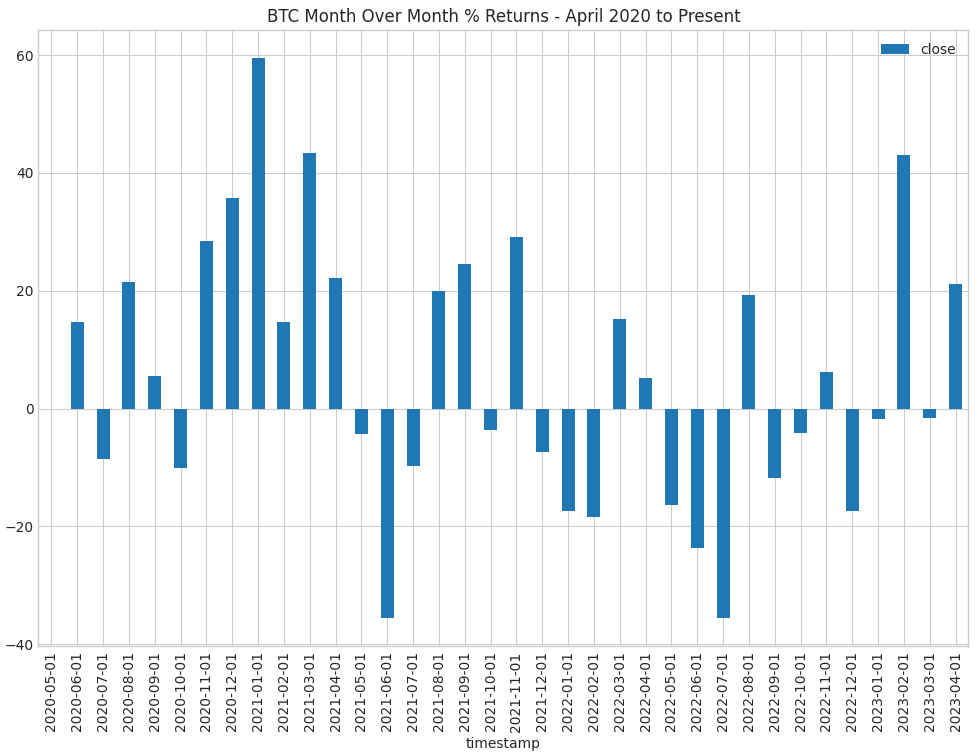

In [76]:
# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_chg*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Month Over Month % Returns - April 2020 to Present");
    plt.savefig("Images/BTCMonthlyPercentReturns.png")

In [77]:
# Prep SPY dataframe
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       2289 non-null   object 
 1   timestamp    2289 non-null   object 
 2   open         2289 non-null   float64
 3   high         2289 non-null   float64
 4   low          2289 non-null   float64
 5   close        2289 non-null   float64
 6   volume       2289 non-null   float64
 7   trade_count  2289 non-null   float64
 8   vwap         2289 non-null   float64
dtypes: float64(7), object(2)
memory usage: 161.1+ KB


In [78]:
# Shifting timestamp back to datetime to filter on month start dates
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       2289 non-null   object        
 1   timestamp    2289 non-null   datetime64[ns]
 2   open         2289 non-null   float64       
 3   high         2289 non-null   float64       
 4   low          2289 non-null   float64       
 5   close        2289 non-null   float64       
 6   volume       2289 non-null   float64       
 7   trade_count  2289 non-null   float64       
 8   vwap         2289 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 161.1+ KB


In [79]:
stock_df

symbol  timestamp    open     high       low   close      volume  \
0       GLD 2020-04-08  155.91  155.940  154.5900  154.65   7600804.0   
1       GLD 2020-04-09  158.08  159.080  157.2100  158.58  18123039.0   
2       GLD 2020-04-13  159.17  162.380  158.6250  161.41  20549213.0   
3       GLD 2020-04-14  162.73  164.420  161.7800  162.66  17095086.0   
4       GLD 2020-04-15  161.80  162.540  160.8061  162.00  12141890.0   
...     ...        ...     ...      ...       ...     ...         ...   
2284    TLT 2023-04-13  107.05  107.390  105.8800  106.05  22079384.0   
2285    TLT 2023-04-14  105.39  105.550  104.7700  105.08  19596665.0   
2286    TLT 2023-04-17  104.42  104.590  103.7100  103.83  19535102.0   
2287    TLT 2023-04-18  103.81  104.585  103.8000  104.20  15922623.0   
2288    TLT 2023-04-19  103.91  104.237  103.4750  104.10  14474040.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2284     118196.0  106.430780  
2285     125043.0  105.119817  
2286     114719.0  103.953381  
2287      88745.0  104.189647  
2288      93795.0  103.872673  

[2289 rows x 9 columns]

In [80]:
stock_index = stock_df.set_index('timestamp')
stock_index

symbol    open     high       low   close      volume  trade_count  \
timestamp                                                                       
2020-04-08    GLD  155.91  155.940  154.5900  154.65   7600804.0      60704.0   
2020-04-09    GLD  158.08  159.080  157.2100  158.58  18123039.0     140239.0   
2020-04-13    GLD  159.17  162.380  158.6250  161.41  20549213.0     140401.0   
2020-04-14    GLD  162.73  164.420  161.7800  162.66  17095086.0     146336.0   
2020-04-15    GLD  161.80  162.540  160.8061  162.00  12141890.0      95518.0   
...           ...     ...      ...       ...     ...         ...          ...   
2023-04-13    TLT  107.05  107.390  105.8800  106.05  22079384.0     118196.0   
2023-04-14    TLT  105.39  105.550  104.7700  105.08  19596665.0     125043.0   
2023-04-17    TLT  104.42  104.590  103.7100  103.83  19535102.0     114719.0   
2023-04-18    TLT  103.81  104.585  103.8000  104.20  15922623.0      88745.0   
2023-04-19    TLT  103.91  104.237  103.4750  104.10  14474040.0      93795.0   

                  vwap  
timestamp               
2020-04-08  155.233884  
2020-04-09  158.255634  
2020-04-13  160.906373  
2020-04-14  163.197557  
2020-04-15  161.749049  
...                ...  
2023-04-13  106.430780  
2023-04-14  105.119817  
2023-04-17  103.953381  
2023-04-18  104.189647  
2023-04-19  103.872673  

[2289 rows x 8 columns]

In [81]:
stock_index['2021-06-30':'2021-07-02']

symbol    open     high       low   close      volume  trade_count  \
timestamp                                                                       
2021-06-30    GLD  164.57  166.100  164.2900  165.63   7954916.0      55215.0   
2021-07-01    GLD  166.65  166.880  165.5000  166.20   7427387.0      50788.0   
2021-07-02    GLD  167.35  167.715  166.4000  167.29   7872766.0      52311.0   
2021-06-30    SPY  427.21  428.780  427.1800  428.06  64702769.0     315392.0   
2021-07-01    SPY  428.87  430.600  428.8000  430.43  52968992.0     315119.0   
2021-07-02    SPY  431.67  434.100  430.5218  433.72  57503965.0     312260.0   
2021-06-30    TLT  144.25  144.930  144.0700  144.35  15707427.0      76777.0   
2021-07-01    TLT  143.98  144.310  143.5300  144.17  10767196.0      55429.0   
2021-07-02    TLT  144.23  145.040  144.1100  145.04   9648629.0      52006.0   

                  vwap  
timestamp               
2021-06-30  165.379047  
2021-07-01  166.141960  
2021-07-02  167.181069  
2021-06-30  428.035998  
2021-07-01  429.721484  
2021-07-02  432.842859  
2021-06-30  144.486788  
2021-07-01  143.845345  
2021-07-02  144.737576

In [82]:
# Grouping GLD by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
gld_group_df

symbol      open      high       low   close      volume  \
timestamp                                                             
2020-04-01    GLD  155.9100  155.9400  154.5900  154.65   7600804.0   
2020-05-01    GLD  157.9500  160.4500  157.8000  159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900  163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400  166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000  185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300  185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375  178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301  177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000  170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550  182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600  174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600  161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800  161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100  167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900  177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000  166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000  169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600  169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850  164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100  167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600  166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000  168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700  168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300  181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800  179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850  173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900  172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600  168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100  165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200  157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300  158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700  153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750  167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200  171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300  181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700  170.76   6590684.0   
2023-04-03    GLD  183.8500  185.0350  183.3200  184.54   9206828.0   

            trade_count        vwap  
timestamp                            
2020-04-01      60704.0  155.233884  
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.0  164.970363  
2022-09-01      56371.0  157.944854  
2022-10-03      69080.0  

In [83]:
# Filtering first and last months due to incomplete data
gld_iloc = gld_group_df.iloc[1:-1]
gld_iloc

symbol      open      high       low   close      volume  \
timestamp                                                             
2020-05-01    GLD  157.9500  160.4500  157.8000  159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900  163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400  166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000  185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300  185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375  178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301  177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000  170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550  182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600  174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600  161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800  161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100  167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900  177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000  166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000  169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600  169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850  164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100  167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600  166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000  168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700  168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300  181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800  179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850  173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900  172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600  168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100  165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200  157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300  158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700  153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750  167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200  171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300  181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700  170.76   6590684.0   

            trade_count        vwap  
timestamp                            
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.0  164.970363  
2022-09-01      56371.0  157.944854  
2022-10-03      69080.0  157.230698  
2022-11-01      39133.0  153.392860  
2022-12-01      59916.0  167.471026  
2023-01-02      55916.0  171.070617  
2023-02-01      57305.0  180.319224  
2023-03-01     

In [84]:
# Grouping SPY by business month start; nth isolates by symbol
spy_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(1)
spy_group_df

symbol     open      high       low   close       volume  \
timestamp                                                             
2020-04-01    SPY  267.960  276.0000  265.2542  274.00  153774487.0   
2020-05-01    SPY  285.310  290.6572  281.5200  282.83  125180028.0   
2020-06-01    SPY  303.620  306.2050  303.0600  305.45   56679836.0   
2020-07-01    SPY  309.540  311.8900  309.0700  310.57   72474858.0   
2020-08-03    SPY  328.320  329.6200  327.7300  328.67   53078112.0   
2020-09-01    SPY  350.210  352.7100  349.2400  352.68   54999325.0   
2020-10-01    SPY  337.690  338.7400  335.0100  336.97   88698745.0   
2020-11-02    SPY  330.200  332.3600  327.2400  330.19   86068377.0   
2020-12-01    SPY  365.570  367.6800  364.9300  365.84   74504970.0   
2021-01-01    SPY  375.310  375.4500  364.8200  368.97  110210840.0   
2021-02-01    SPY  373.720  377.3400  370.3760  376.02   75817597.0   
2021-03-01    SPY  385.590  390.9200  380.5720  389.43  105348798.0   
2021-04-01    SPY  398.400  400.6700  398.1800  400.61   99125509.0   
2021-05-03    SPY  419.430  419.8400  417.6650  418.20   67670957.0   
2021-06-01    SPY  422.570  422.7200  419.2000  419.67   54216625.0   
2021-07-01    SPY  428.870  430.6000  428.8000  430.43   52968992.0   
2021-08-02    SPY  440.340  440.9300  437.2100  437.59   58330752.0   
2021-09-01    SPY  452.560  453.1100  451.5450  451.80   48436745.0   
2021-10-01    SPY  430.980  436.0329  427.2400  434.24  128881427.0   
2021-11-01    SPY  460.300  460.7021  458.2000  460.04   47634255.0   
2021-12-01    SPY  461.640  464.6700  450.2900  450.50  131947695.0   
2022-01-03    SPY  476.300  477.8500  473.8500  477.71   72604064.0   
2022-02-01    SPY  450.680  453.6300  446.9384  452.95  122606343.0   
2022-03-01    SPY  435.040  437.1700  427.2100  429.98  132591866.0   
2022-04-01    SPY  453.310  453.4600  449.1400  452.92   88675787.0   
2022-05-02    SPY  412.070  415.9200  405.0200  414.48  157215637.0   
2022-06-01    SPY  415.170  416.2400  406.9300  409.59   85820291.0   
2022-07-01    SPY  376.560  381.7000  373.8000  381.24   74084447.0   
2022-08-01    SPY  409.150  413.4100  408.4000  410.77   69633616.0   
2022-09-01    SPY  392.890  396.7800  390.0400  396.42   78315802.0   
2022-10-03    SPY  361.080  368.5500  359.2100  366.61   89052594.0   
2022-11-01    SPY  390.140  390.3900  383.2900  384.52   83777606.0   
2022-12-01    SPY  408.770  410.0000  404.7500  407.38   76270288.0   
2023-01-02    SPY  384.370  386.4300  377.8310  380.82   74330774.0   
2023-02-01    SPY  405.211  413.6700  402.3500  410.80  101480517.0   
2023-03-01    SPY  395.410  396.6900  393.3800  394.74   99723518.0   
2023-04-03    SPY  408.850  411.3700  408.4400  410.95   67426048.0   

            trade_count        vwap  
timestamp                            
2020-04-01     950859.0  271.051454  
2020-05-01     639987.0  284.092832  
2020-06-01     316834.0  305.036356  
2020-07-01     418495.0  310.486119  
2020-08-03     288003.0  328.658795  
2020-09-01     295183.0  351.086724  
2020-10-01     442959.0  336.463100  
2020-11-02     582406.0  329.604551  
2020-12-01     378050.0  365.968334  
2021-01-01     623063.0  369.337439  
2021-02-01     414900.0  374.490318  
2021-03-01     570891.0  388.233476  
2021-04-01     386551.0  398.273349  
2021-05-03     380266.0  418.287830  
2021-06-01     379476.0  420.229588  
2021-07-01     315119.0  429.721484  
2021-08-02     406413.0  438.944582  
2021-09-01     333101.0  452.294976  
2021-10-01     849857.0  431.732261  
2021-11-01     401292.0  459.463015  
2021-12-01    1034713.0  457.411297  
2022-01-03     534803.0  476.526964  
2022-02-01    1091104.0  450.710894  
2022-03-01    1350983.0  431.682495  
2022-04-01     624742.0  451.850852  
2022-05-02    1456038.0  411.158042  
2022-06-01     691614.0  410.785032  
2022-07-01     600889.0  378.221933  
2022-08-01     516221.0  411.079113  
2022-09-01     594723.0  393.055687  
2022-10-03     617784.0  

In [85]:
# Filtering first and last months due to incomplete data
spy_iloc = spy_group_df.iloc[1:-1]
spy_iloc

symbol     open      high       low   close       volume  \
timestamp                                                             
2020-05-01    SPY  285.310  290.6572  281.5200  282.83  125180028.0   
2020-06-01    SPY  303.620  306.2050  303.0600  305.45   56679836.0   
2020-07-01    SPY  309.540  311.8900  309.0700  310.57   72474858.0   
2020-08-03    SPY  328.320  329.6200  327.7300  328.67   53078112.0   
2020-09-01    SPY  350.210  352.7100  349.2400  352.68   54999325.0   
2020-10-01    SPY  337.690  338.7400  335.0100  336.97   88698745.0   
2020-11-02    SPY  330.200  332.3600  327.2400  330.19   86068377.0   
2020-12-01    SPY  365.570  367.6800  364.9300  365.84   74504970.0   
2021-01-01    SPY  375.310  375.4500  364.8200  368.97  110210840.0   
2021-02-01    SPY  373.720  377.3400  370.3760  376.02   75817597.0   
2021-03-01    SPY  385.590  390.9200  380.5720  389.43  105348798.0   
2021-04-01    SPY  398.400  400.6700  398.1800  400.61   99125509.0   
2021-05-03    SPY  419.430  419.8400  417.6650  418.20   67670957.0   
2021-06-01    SPY  422.570  422.7200  419.2000  419.67   54216625.0   
2021-07-01    SPY  428.870  430.6000  428.8000  430.43   52968992.0   
2021-08-02    SPY  440.340  440.9300  437.2100  437.59   58330752.0   
2021-09-01    SPY  452.560  453.1100  451.5450  451.80   48436745.0   
2021-10-01    SPY  430.980  436.0329  427.2400  434.24  128881427.0   
2021-11-01    SPY  460.300  460.7021  458.2000  460.04   47634255.0   
2021-12-01    SPY  461.640  464.6700  450.2900  450.50  131947695.0   
2022-01-03    SPY  476.300  477.8500  473.8500  477.71   72604064.0   
2022-02-01    SPY  450.680  453.6300  446.9384  452.95  122606343.0   
2022-03-01    SPY  435.040  437.1700  427.2100  429.98  132591866.0   
2022-04-01    SPY  453.310  453.4600  449.1400  452.92   88675787.0   
2022-05-02    SPY  412.070  415.9200  405.0200  414.48  157215637.0   
2022-06-01    SPY  415.170  416.2400  406.9300  409.59   85820291.0   
2022-07-01    SPY  376.560  381.7000  373.8000  381.24   74084447.0   
2022-08-01    SPY  409.150  413.4100  408.4000  410.77   69633616.0   
2022-09-01    SPY  392.890  396.7800  390.0400  396.42   78315802.0   
2022-10-03    SPY  361.080  368.5500  359.2100  366.61   89052594.0   
2022-11-01    SPY  390.140  390.3900  383.2900  384.52   83777606.0   
2022-12-01    SPY  408.770  410.0000  404.7500  407.38   76270288.0   
2023-01-02    SPY  384.370  386.4300  377.8310  380.82   74330774.0   
2023-02-01    SPY  405.211  413.6700  402.3500  410.80  101480517.0   
2023-03-01    SPY  395.410  396.6900  393.3800  394.74   99723518.0   

            trade_count        vwap  
timestamp                            
2020-05-01     639987.0  284.092832  
2020-06-01     316834.0  305.036356  
2020-07-01     418495.0  310.486119  
2020-08-03     288003.0  328.658795  
2020-09-01     295183.0  351.086724  
2020-10-01     442959.0  336.463100  
2020-11-02     582406.0  329.604551  
2020-12-01     378050.0  365.968334  
2021-01-01     623063.0  369.337439  
2021-02-01     414900.0  374.490318  
2021-03-01     570891.0  388.233476  
2021-04-01     386551.0  398.273349  
2021-05-03     380266.0  418.287830  
2021-06-01     379476.0  420.229588  
2021-07-01     315119.0  429.721484  
2021-08-02     406413.0  438.944582  
2021-09-01     333101.0  452.294976  
2021-10-01     849857.0  431.732261  
2021-11-01     401292.0  459.463015  
2021-12-01    1034713.0  457.411297  
2022-01-03     534803.0  476.526964  
2022-02-01    1091104.0  450.710894  
2022-03-01    1350983.0  431.682495  
2022-04-01     624742.0  451.850852  
2022-05-02    1456038.0  411.158042  
2022-06-01     691614.0  410.785032  
2022-07-01     600889.0  378.221933  
2022-08-01     516221.0  411.079113  
2022-09-01     594723.0  393.055687  
2022-10-03     617784.0  364.702960  
2022-11-01     541297.0  385.596075  
2022-12-01     599125.0  407.368696  
2023-01-02     585048.0  380.961150  
2023-02-01     833884.0  407.864239  
2023-03-01     

In [86]:
# Grouping TLT by business month start; nth isolates by symbol
tlt_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(2)
tlt_group_df

symbol     open      high      low   close      volume  \
timestamp                                                           
2020-04-01    TLT  165.110  166.1900  164.130  165.09  10147077.0   
2020-05-01    TLT  167.500  168.1100  166.440  167.95  10209421.0   
2020-06-01    TLT  162.100  162.4400  161.670  162.28  13353301.0   
2020-07-01    TLT  162.810  163.5600  162.150  163.42  13181262.0   
2020-08-03    TLT  169.240  169.9900  168.970  169.95   9067756.0   
2020-09-01    TLT  161.760  164.0700  161.180  163.86  10587634.0   
2020-10-01    TLT  162.510  163.7401  162.100  163.36  11523874.0   
2020-11-02    TLT  158.700  159.1900  158.330  158.58  10810494.0   
2020-12-01    TLT  158.550  158.7400  156.680  157.50  13666212.0   
2021-01-01    TLT  156.670  158.1800  156.535  157.54  13152865.0   
2021-02-01    TLT  151.660  152.3600  151.490  152.00   8165534.0   
2021-03-01    TLT  140.660  141.4100  140.090  141.06  22050428.0   
2021-04-01    TLT  136.550  137.6200  136.300  137.51  14880298.0   
2021-05-03    TLT  138.700  139.6450  138.280  138.52  16434305.0   
2021-06-01    TLT  137.820  138.2600  137.250  138.21  11777166.0   
2021-07-01    TLT  143.980  144.3100  143.530  144.17  10767196.0   
2021-08-02    TLT  149.460  151.2300  149.180  150.67  21220997.0   
2021-09-01    TLT  149.270  149.3900  148.490  148.89  10798246.0   
2021-10-01    TLT  144.850  145.4000  144.200  145.35  26138957.0   
2021-11-01    TLT  145.800  146.7600  145.700  146.44  18013164.0   
2021-12-01    TLT  150.485  152.4100  149.790  152.34  30824943.0   
2022-01-03    TLT  146.410  146.9400  144.280  144.30  33857678.0   
2022-02-01    TLT  142.280  142.3600  141.055  141.72  20789664.0   
2022-03-01    TLT  140.360  142.3300  140.000  141.30  35286889.0   
2022-04-01    TLT  130.010  132.9600  129.710  132.38  23480857.0   
2022-05-02    TLT  117.860  118.2700  116.930  117.18  29035772.0   
2022-06-01    TLT  117.030  117.3400  115.690  116.22  15514796.0   
2022-07-01    TLT  115.900  117.5900  115.220  115.82  21856202.0   
2022-08-01    TLT  118.250  120.1000  118.080  120.04  17972699.0   
2022-09-01    TLT  109.870  110.2500  108.940  109.60  22490448.0   
2022-10-03    TLT  103.850  104.6800  103.150  103.83  27892138.0   
2022-11-01    TLT   97.380   97.4200   96.210   96.77  17585088.0   
2022-12-01    TLT  103.150  105.8100  103.100  105.76  53156786.0   
2023-01-02    TLT  102.200  102.3400  100.840  101.46  25312171.0   
2023-02-01    TLT  107.550  108.5900  106.420  108.18  25310455.0   
2023-03-01    TLT  100.820  101.0300   99.960  100.37  19004200.0   
2023-04-03    TLT  105.880  107.0950  105.700  106.60  18237429.0   

            trade_count        vwap  
timestamp                            
2020-04-01      63686.0  165.217491  
2020-05-01      52918.0  167.362331  
2020-06-01      54793.0  162.363115  
2020-07-01      66576.0  163.014043  
2020-08-03      61181.0  169.514329  
2020-09-01      58232.0  163.138871  
2020-10-01      62953.0  163.194508  
2020-11-02      57471.0  158.700148  
2020-12-01      73359.0  157.524279  
2021-01-01      66776.0  157.536581  
2021-02-01      41773.0  151.926223  
2021-03-01     131299.0  140.676610  
2021-04-01      66587.0  137.128607  
2021-05-03      84727.0  138.785396  
2021-06-01      61981.0  137.875244  
2021-07-01      55429.0  143.845345  
2021-08-02      93872.0  150.455494  
2021-09-01      62840.0  148.892889  
2021-10-01     120052.0  144.946760  
2021-11-01     102768.0  146.233070  
2021-12-01     159674.0  151.363718  
2022-01-03     132357.0  145.398962  
2022-02-01      97271.0  141.680747  
2022-03-01     227202.0  141.322926  
2022-04-01     149421.0  131.842770  
2022-05-02     165127.0  117.383631  
2022-06-01      89438.0  116.259375  
2022-07-01     138117.0  116.113939  
2022-08-01     106497.0  119.478759  
2022-09-01     131508.0  109.661551  
2022-10-03     138135.0  103.804973  
2022-11-01     117591.0   96.698772  
2022-12-01     215289.0  10

In [87]:
# Filtering first and last months due to incomplete data
tlt_iloc = tlt_group_df.iloc[1:-1]
tlt_iloc

symbol     open      high      low   close      volume  \
timestamp                                                           
2020-05-01    TLT  167.500  168.1100  166.440  167.95  10209421.0   
2020-06-01    TLT  162.100  162.4400  161.670  162.28  13353301.0   
2020-07-01    TLT  162.810  163.5600  162.150  163.42  13181262.0   
2020-08-03    TLT  169.240  169.9900  168.970  169.95   9067756.0   
2020-09-01    TLT  161.760  164.0700  161.180  163.86  10587634.0   
2020-10-01    TLT  162.510  163.7401  162.100  163.36  11523874.0   
2020-11-02    TLT  158.700  159.1900  158.330  158.58  10810494.0   
2020-12-01    TLT  158.550  158.7400  156.680  157.50  13666212.0   
2021-01-01    TLT  156.670  158.1800  156.535  157.54  13152865.0   
2021-02-01    TLT  151.660  152.3600  151.490  152.00   8165534.0   
2021-03-01    TLT  140.660  141.4100  140.090  141.06  22050428.0   
2021-04-01    TLT  136.550  137.6200  136.300  137.51  14880298.0   
2021-05-03    TLT  138.700  139.6450  138.280  138.52  16434305.0   
2021-06-01    TLT  137.820  138.2600  137.250  138.21  11777166.0   
2021-07-01    TLT  143.980  144.3100  143.530  144.17  10767196.0   
2021-08-02    TLT  149.460  151.2300  149.180  150.67  21220997.0   
2021-09-01    TLT  149.270  149.3900  148.490  148.89  10798246.0   
2021-10-01    TLT  144.850  145.4000  144.200  145.35  26138957.0   
2021-11-01    TLT  145.800  146.7600  145.700  146.44  18013164.0   
2021-12-01    TLT  150.485  152.4100  149.790  152.34  30824943.0   
2022-01-03    TLT  146.410  146.9400  144.280  144.30  33857678.0   
2022-02-01    TLT  142.280  142.3600  141.055  141.72  20789664.0   
2022-03-01    TLT  140.360  142.3300  140.000  141.30  35286889.0   
2022-04-01    TLT  130.010  132.9600  129.710  132.38  23480857.0   
2022-05-02    TLT  117.860  118.2700  116.930  117.18  29035772.0   
2022-06-01    TLT  117.030  117.3400  115.690  116.22  15514796.0   
2022-07-01    TLT  115.900  117.5900  115.220  115.82  21856202.0   
2022-08-01    TLT  118.250  120.1000  118.080  120.04  17972699.0   
2022-09-01    TLT  109.870  110.2500  108.940  109.60  22490448.0   
2022-10-03    TLT  103.850  104.6800  103.150  103.83  27892138.0   
2022-11-01    TLT   97.380   97.4200   96.210   96.77  17585088.0   
2022-12-01    TLT  103.150  105.8100  103.100  105.76  53156786.0   
2023-01-02    TLT  102.200  102.3400  100.840  101.46  25312171.0   
2023-02-01    TLT  107.550  108.5900  106.420  108.18  25310455.0   
2023-03-01    TLT  100.820  101.0300   99.960  100.37  19004200.0   

            trade_count        vwap  
timestamp                            
2020-05-01      52918.0  167.362331  
2020-06-01      54793.0  162.363115  
2020-07-01      66576.0  163.014043  
2020-08-03      61181.0  169.514329  
2020-09-01      58232.0  163.138871  
2020-10-01      62953.0  163.194508  
2020-11-02      57471.0  158.700148  
2020-12-01      73359.0  157.524279  
2021-01-01      66776.0  157.536581  
2021-02-01      41773.0  151.926223  
2021-03-01     131299.0  140.676610  
2021-04-01      66587.0  137.128607  
2021-05-03      84727.0  138.785396  
2021-06-01      61981.0  137.875244  
2021-07-01      55429.0  143.845345  
2021-08-02      93872.0  150.455494  
2021-09-01      62840.0  148.892889  
2021-10-01     120052.0  144.946760  
2021-11-01     102768.0  146.233070  
2021-12-01     159674.0  151.363718  
2022-01-03     132357.0  145.398962  
2022-02-01      97271.0  141.680747  
2022-03-01     227202.0  141.322926  
2022-04-01     149421.0  131.842770  
2022-05-02     165127.0  117.383631  
2022-06-01      89438.0  116.259375  
2022-07-01     138117.0  116.113939  
2022-08-01     106497.0  119.478759  
2022-09-01     131508.0  109.661551  
2022-10-03     138135.0  103.804973  
2022-11-01     117591.0   96.698772  
2022-12-01     215289.0  104.856665  
2023-01-02     147214.0  101.573675  
2023-02-01     155975.0  107.567886  
2023-03-01     124652.0  100.407281

In [88]:
# Revising column names to prep for join
dict = {'close':'tlt_close'}

tlt_iloc = tlt_iloc.rename(columns=dict)


spy_dict = {'close':'spy_close'}

spy_iloc = spy_iloc.rename(columns=spy_dict)


gld_dict = {'close':'gld_close'}

gld_iloc = gld_iloc.rename(columns=gld_dict)
gld_iloc



symbol      open      high       low  gld_close      volume  \
timestamp                                                                
2020-05-01    GLD  157.9500  160.4500  157.8000     159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900     163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400     166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000     185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300     185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375     178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301     177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000     170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550     182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600     174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600     161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800     161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100     167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900     177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000     166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000     169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600     169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850     164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100     167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600     166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000     168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700     168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300     181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800     179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850     173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900     172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600     168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100     165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200     157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300     158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700     153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750     167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200     171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300     181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700     170.76   6590684.0   

            trade_count        vwap  
timestamp                            
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.0  164.970363  
2022-09-01      56371.0  157.944854  
2022-10-03      69080.0  157.230698  
2022-11-01      39133.0  153.392860  
2022-12-01      59

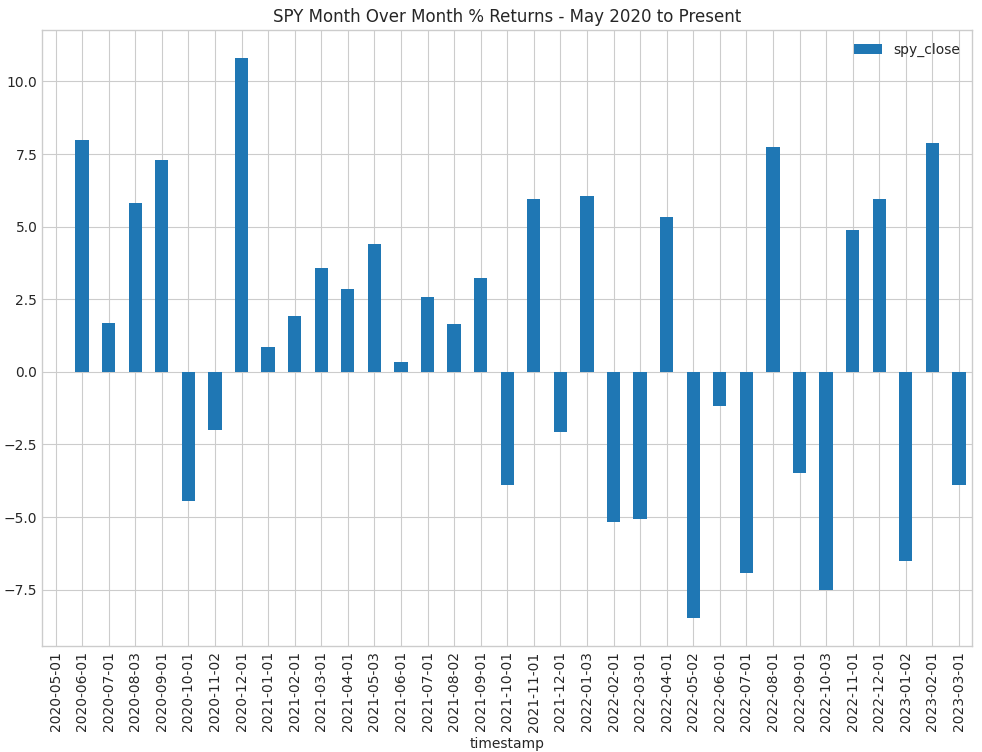

In [89]:
# Grabbing subset of SPY timestamp and closing prices 
spy_close = spy_iloc['spy_close']
spy_close

# Calculating pct change
spy_pct = spy_close.pct_change()

# Convert index back to string to prep for plotting
spy_pct.index = spy_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (spy_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="SPY Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/SPYMonthlyPercentReturns.png")

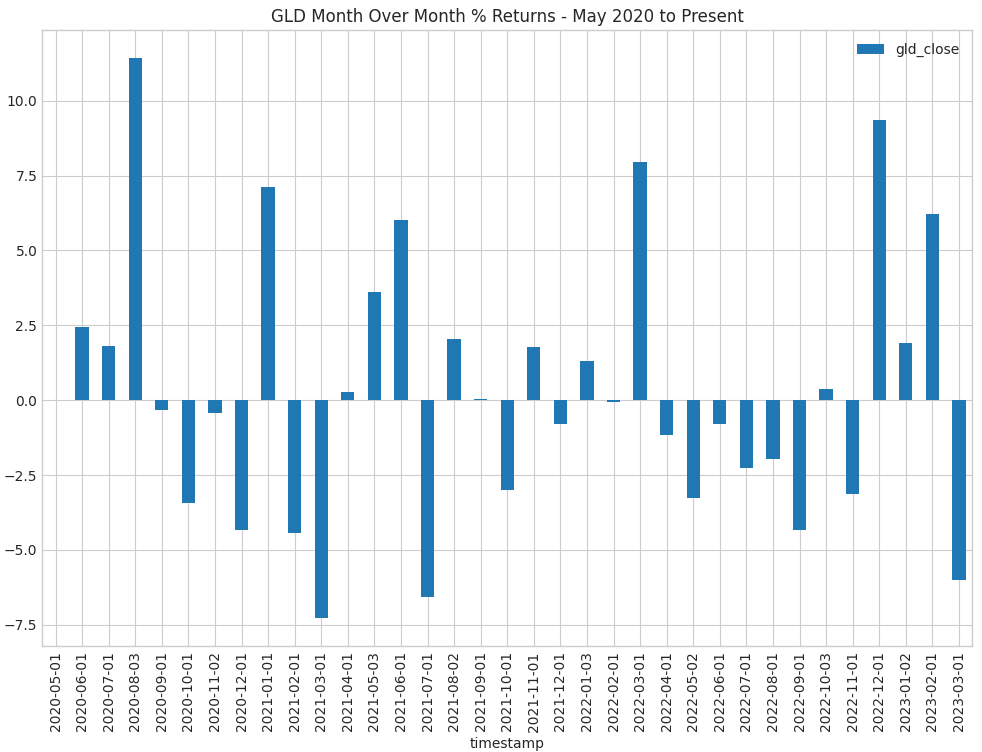

In [90]:
# Grabbing subset of GLD timestamp and closing prices 
gld_close = gld_iloc['gld_close']

# Calculating pct change
gld_pct = gld_close.pct_change()

# Convert index back to string to prep for plotting
gld_pct.index = gld_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (gld_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="GLD Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/GLDMonthlyPercentReturns.png")

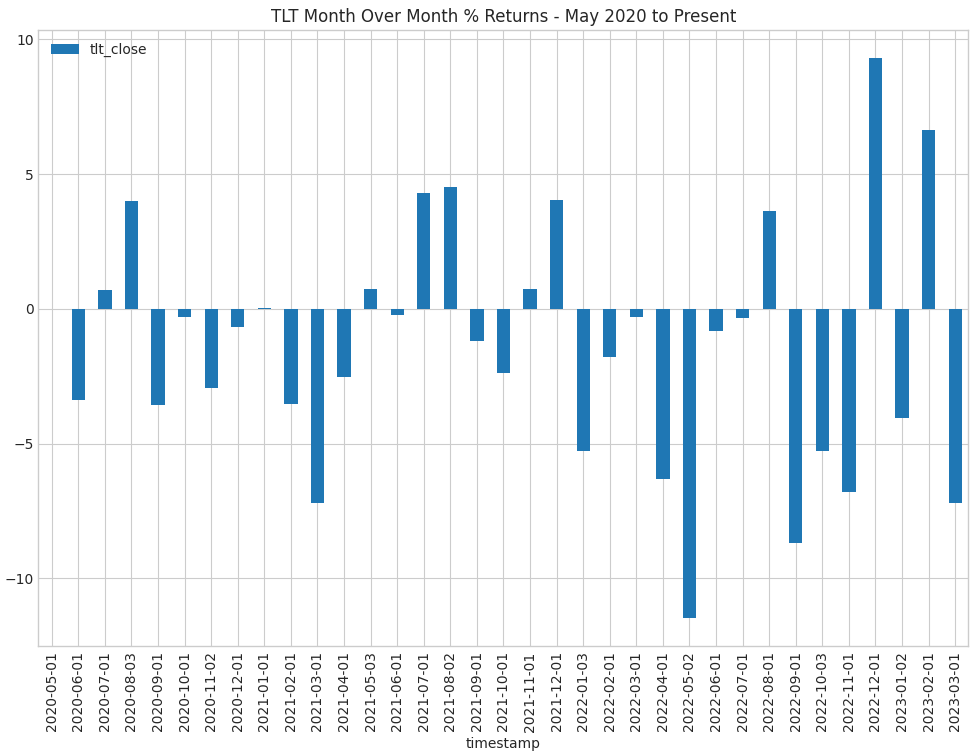

In [91]:
# Grabbing subset of TLT timestamp and closing prices 
tlt_close = tlt_iloc['tlt_close']

# Calculating pct change
tlt_pct = tlt_close.pct_change()

# Convert index back to string to prep for plotting
tlt_pct.index = tlt_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (tlt_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="TLT Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/TLTMonthlyPercentReturns.png")

In [92]:
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [93]:
tlt_pct.info()

<class 'pandas.core.series.Series'>
Index: 35 entries, 2020-05-01 to 2023-03-01
Series name: tlt_close
Non-Null Count  Dtype  
--------------  -----  
34 non-null     float64
dtypes: float64(1)
memory usage: 560.0+ bytes


In [94]:
spy_pct.shape

(35,)

In [95]:
gld_pct.shape

(35,)

In [96]:
df_concat = pd.concat([tlt_pct, spy_pct, gld_pct], axis=1)
df_concat

tlt_close  spy_close  gld_close
timestamp                                  
2020-05-01        NaN        NaN        NaN
2020-06-01  -0.033760   0.079977   0.024283
2020-07-01   0.007025   0.016762   0.018086
2020-08-03   0.039958   0.058280   0.114152
2020-09-01  -0.035834   0.073052  -0.003178
2020-10-01  -0.003051  -0.044545  -0.034315
2020-11-02  -0.029261  -0.020120  -0.004421
2020-12-01  -0.006810   0.107968  -0.043393
2021-01-01   0.000254   0.008556   0.071273
2021-02-01  -0.035166   0.019107  -0.044373
2021-03-01  -0.071974   0.035663  -0.072892
2021-04-01  -0.025167   0.028709   0.002786
2021-05-03   0.007345   0.043908   0.035992
2021-06-01  -0.002238   0.003515   0.060128
2021-07-01   0.043123   0.025639  -0.065767
2021-08-02   0.045086   0.016635   0.020517
2021-09-01  -0.011814   0.032473   0.000531
2021-10-01  -0.023776  -0.038867  -0.030112
2021-11-01   0.007499   0.059414   0.017802
2021-12-01   0.040290  -0.020737  -0.008118
2022-01-03  -0.052777   0.060400   0.013060
2022-02-01  -0.017879  -0.051831  -0.000594
2022-03-01  -0.002964  -0.050712   0.079593
2022-04-01  -0.063128   0.053351  -0.011673
2022-05-02  -0.114821  -0.084872  -0.032702
2022-06-01  -0.008193  -0.011798  -0.008063
2022-07-01  -0.003442  -0.069216  -0.022702
2022-08-01   0.036436   0.077458  -0.019546
2022-09-01  -0.086971  -0.034934  -0.043386
2022-10-03  -0.052646  -0.075198   0.003547
2022-11-01  -0.067996   0.048853  -0.031370
2022-12-01   0.092901   0.059451   0.093705
2023-01-02  -0.040658  -0.065197   0.019185
2023-02-01   0.066233   0.078725   0.062025
2023-03-01  -0.072194  -0.039094  -0.060054

In [97]:
btc_chg.shape

(36, 1)

In [98]:
btc_re = btc_chg.iloc[0:-1]
btc_re

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786
2020-10-01 -0.100696
2020-11-01  0.284715
2020-12-01  0.357868
2021-01-01  0.594222
2021-02-01  0.147177
2021-03-01  0.434132
2021-04-01  0.220784
2021-05-01 -0.042849
2021-06-01 -0.355676
2021-07-01 -0.098060
2021-08-01  0.199408
2021-09-01  0.244711
2021-10-01 -0.037009
2021-11-01  0.291715
2021-12-01 -0.073966
2022-01-01 -0.173802
2022-02-01 -0.183169
2022-03-01  0.152741
2022-04-01  0.051325
2022-05-01 -0.163191
2022-06-01 -0.235826
2022-07-01 -0.355927
2022-08-01  0.192689
2022-09-01 -0.118534
2022-10-01 -0.041121
2022-11-01  0.061301
2022-12-01 -0.174473
2023-01-01 -0.017344
2023-02-01  0.430958
2023-03-01 -0.015211

In [99]:
all_concat = pd.concat([df_concat, btc_re], axis=1)
all_concat

tlt_close  spy_close  gld_close     close
timestamp                                            
2020-05-01        NaN        NaN        NaN       NaN
2020-06-01  -0.033760   0.079977   0.024283  0.146317
2020-07-01   0.007025   0.016762   0.018086 -0.085687
2020-08-03   0.039958   0.058280   0.114152       NaN
2020-09-01  -0.035834   0.073052  -0.003178  0.055786
2020-10-01  -0.003051  -0.044545  -0.034315 -0.100696
2020-11-02  -0.029261  -0.020120  -0.004421       NaN
2020-12-01  -0.006810   0.107968  -0.043393  0.357868
2021-01-01   0.000254   0.008556   0.071273  0.594222
2021-02-01  -0.035166   0.019107  -0.044373  0.147177
2021-03-01  -0.071974   0.035663  -0.072892  0.434132
2021-04-01  -0.025167   0.028709   0.002786  0.220784
2021-05-03   0.007345   0.043908   0.035992       NaN
2021-06-01  -0.002238   0.003515   0.060128 -0.355676
2021-07-01   0.043123   0.025639  -0.065767 -0.098060
2021-08-02   0.045086   0.016635   0.020517       NaN
2021-09-01  -0.011814   0.032473   0.000531  0.244711
2021-10-01  -0.023776  -0.038867  -0.030112 -0.037009
2021-11-01   0.007499   0.059414   0.017802  0.291715
2021-12-01   0.040290  -0.020737  -0.008118 -0.073966
2022-01-03  -0.052777   0.060400   0.013060       NaN
2022-02-01  -0.017879  -0.051831  -0.000594 -0.183169
2022-03-01  -0.002964  -0.050712   0.079593  0.152741
2022-04-01  -0.063128   0.053351  -0.011673  0.051325
2022-05-02  -0.114821  -0.084872  -0.032702       NaN
2022-06-01  -0.008193  -0.011798  -0.008063 -0.235826
2022-07-01  -0.003442  -0.069216  -0.022702 -0.355927
2022-08-01   0.036436   0.077458  -0.019546  0.192689
2022-09-01  -0.086971  -0.034934  -0.043386 -0.118534
2022-10-03  -0.052646  -0.075198   0.003547       NaN
2022-11-01  -0.067996   0.048853  -0.031370  0.061301
2022-12-01   0.092901   0.059451   0.093705 -0.174473
2023-01-02  -0.040658  -0.065197   0.019185       NaN
2023-02-01   0.066233   0.078725   0.062025  0.430958
2023-03-01  -0.072194  -0.039094  -0.060054 -0.015211
2020-08-01        NaN        NaN        NaN  0.214382
2020-11-01        NaN        NaN        NaN  0.284715
2021-05-01        NaN        NaN        NaN -0.042849
2021-08-01        NaN        NaN        NaN  0.199408
2022-01-01        NaN        NaN        NaN -0.173802
2022-05-01        NaN        NaN        NaN -0.163191
2022-10-01        NaN        NaN        NaN -0.041121
2023-01-01        NaN        NaN        NaN -0.017344

In [100]:
# !pip install scipy

The correlation between both factors is 0.15


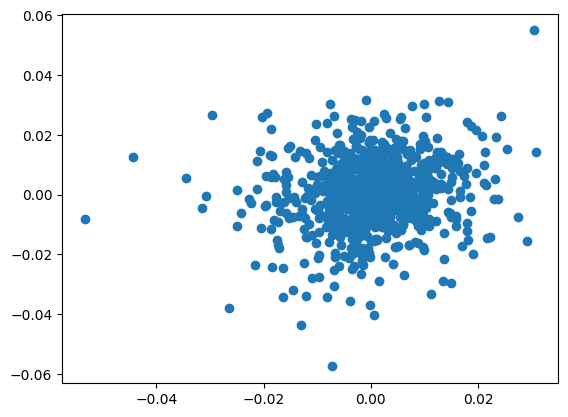

In [101]:
import scipy.stats as st
plt.scatter(gld_daily['GLD'], spy_daily['SPY'])
plt.show
correlation = st.pearsonr(gld_daily['GLD'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [102]:
correlation

PearsonRResult(statistic=0.14868360387014676, pvalue=3.780512743222735e-05)

The correlation between both factors is -0.07


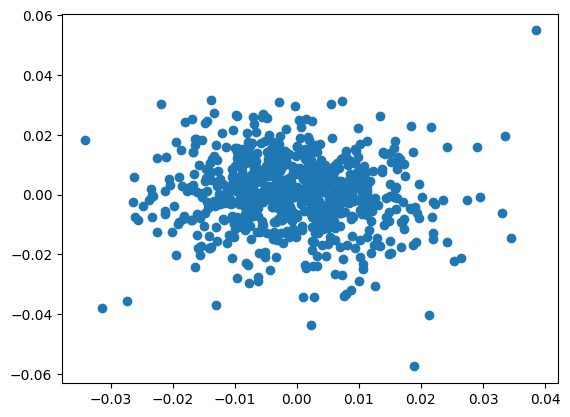

In [103]:
plt.scatter(tlt_daily['TLT'], spy_daily['SPY'])
plt.show
correlation_tlt = st.pearsonr(tlt_daily['TLT'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation_tlt[0],2)}")

In [104]:
correlation_tlt

PearsonRResult(statistic=-0.06604086850666095, pvalue=0.06845321154157652)

The correlation between both factors is 0.28


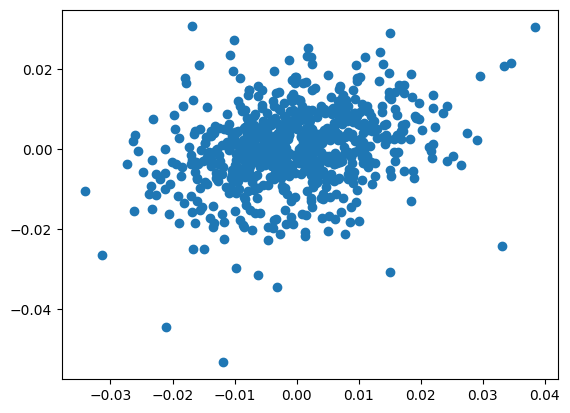

In [105]:
plt.scatter(tlt_daily['TLT'], gld_daily['GLD'])
plt.show
correlation_gld = st.pearsonr(tlt_daily['TLT'], gld_daily['GLD'])
print(f"The correlation between both factors is {round(correlation_gld[0],2)}")

In [106]:
correlation_gld

PearsonRResult(statistic=0.28206734040330494, pvalue=2.1018645848774352e-15)

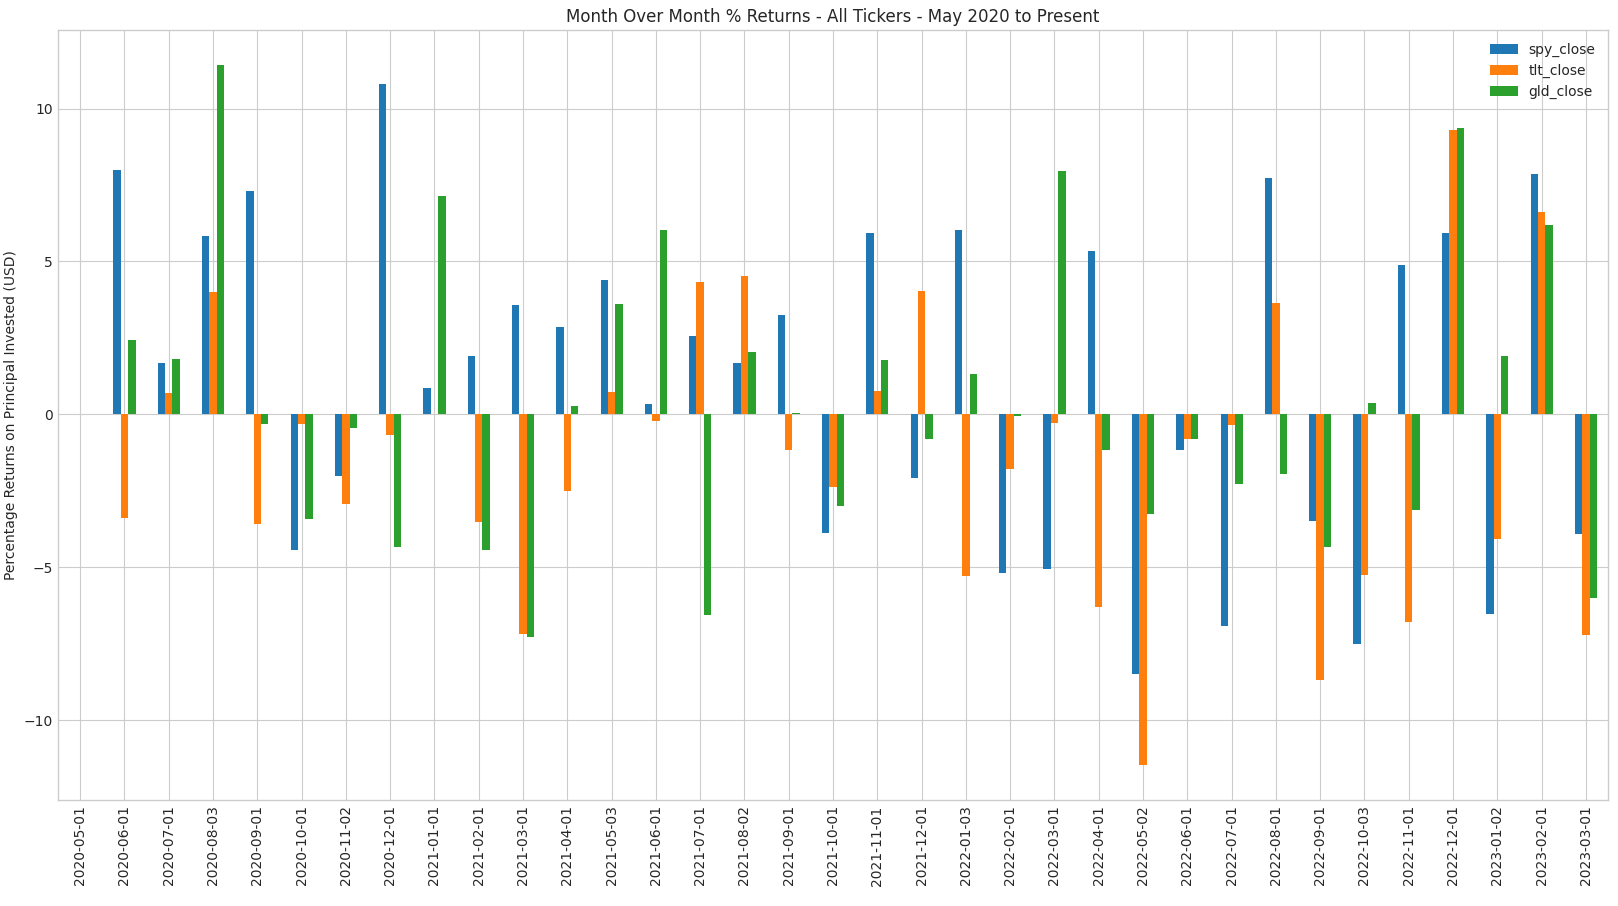

In [107]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = (df_concat*100).plot(y=['spy_close','tlt_close','gld_close'], kind='bar', figsize=(20,10), legend=True, title="Month Over Month % Returns - All Tickers - May 2020 to Present");
#     (spy_pct*100).plot(ax=ax, legend=True)
#     (gld_pct*100).plot(ax=ax, legend=True)
#     (tlt_pct*100).plot(ax=ax, legend=True)

    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
#     ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayMoMPercentageReturns.png");

In [108]:
tlt_pct.max()

0.09290069236333576

In [109]:
gld_pct.max()

0.11415196254951376

In [110]:
spy_pct.max()

0.10796813955601303

In [111]:
tlt_pct.min()

-0.11482096993503543

In [112]:
gld_pct.min()

-0.0728921540492452

In [113]:
spy_pct.min()

-0.084871500485737

In [114]:
btc_chg.max()

close    0.594222
dtype: float64

In [115]:
btc_chg.min()

close   -0.355927
dtype: float64

In [116]:
# max_df = pd.DataFrame

In [117]:
# max_df.columns = [['gld_max','spy_max','tlt_max']]
# max_df

In [118]:
# max_df['gld_max'] = gld_pct.max()
# max_df

In [119]:
stock_df

symbol  timestamp    open     high       low   close      volume  \
0       GLD 2020-04-08  155.91  155.940  154.5900  154.65   7600804.0   
1       GLD 2020-04-09  158.08  159.080  157.2100  158.58  18123039.0   
2       GLD 2020-04-13  159.17  162.380  158.6250  161.41  20549213.0   
3       GLD 2020-04-14  162.73  164.420  161.7800  162.66  17095086.0   
4       GLD 2020-04-15  161.80  162.540  160.8061  162.00  12141890.0   
...     ...        ...     ...      ...       ...     ...         ...   
2284    TLT 2023-04-13  107.05  107.390  105.8800  106.05  22079384.0   
2285    TLT 2023-04-14  105.39  105.550  104.7700  105.08  19596665.0   
2286    TLT 2023-04-17  104.42  104.590  103.7100  103.83  19535102.0   
2287    TLT 2023-04-18  103.81  104.585  103.8000  104.20  15922623.0   
2288    TLT 2023-04-19  103.91  104.237  103.4750  104.10  14474040.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2284     118196.0  106.430780  
2285     125043.0  105.119817  
2286     114719.0  103.953381  
2287      88745.0  104.189647  
2288      93795.0  103.872673  

[2289 rows x 9 columns]

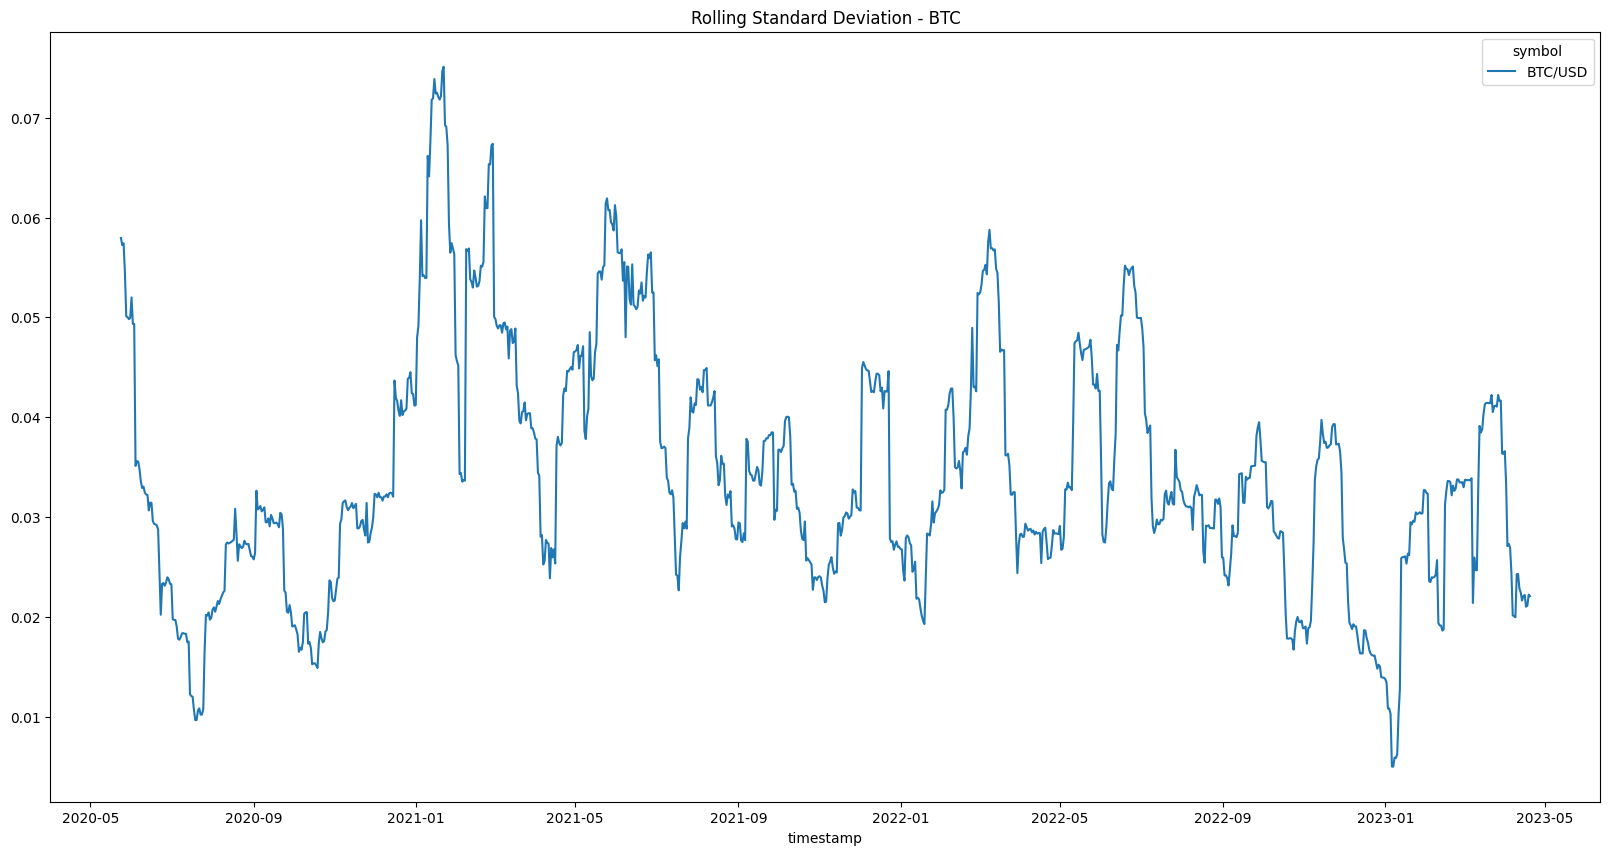

In [120]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolling = btc_daily.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC")

# Plot the rolling standard deviation
btc_rolling;
plt.savefig("Images/RollingSTD_alpaca.png")

In [121]:
# !pip install yfinance

In [122]:
import yfinance as yf

btc_data = yf.Ticker("BTC-USD")

hist = btc_data.history(period="11y")

hist

Open          High           Low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2023-04-16 00:00:00+00:00  30315.976562  30555.537109  30157.832031   
2023-04-17 00:00:00+00:00  30317.146484  30319.197266  29275.371094   
2023-04-18 00:00:00+00:00  29449.091797  30470.302734  29154.849609   
2023-04-19 00:00:00+00:00  30394.187500  30411.054688  28669.898438   
2023-04-20 00:00:00+00:00  28809.228516  29076.400391  28668.949219   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2014-09-17 00:00:00+00:00    457.334015     21056800        0.0           0.0  
2014-09-18 00:00:00+00:00    424.440002     34483200        0.0           0.0  
2014-09-19 00:00:00+00:00    394.795990     37919700        0.0           0.0  
2014-09-20 00:00:00+00:00    408.903992     36863600        0.0           0.0  
2014-09-21 00:00:00+00:00    398.821014     26580100        0.0           0.0  
...                                 ...          ...        ...           ...  
2023-04-16 00:00:00+00:00  30315.355469  12854816417        0.0           0.0  
2023-04-17 00:00:00+00:00  29445.044922  17872186762        0.0           0.0  
2023-04-18 00:00:00+00:00  30397.552734  19480529496        0.0           0.0  
2023-04-19 00:00:00+00:00  28822.679688  24571565421        0.0           0.0  
2023-04-20 00:00:00+00:00  28707.082031  20086886400        0.0           0.0  

[3138 rows x 7 columns]

In [123]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3138 entries, 2014-09-17 00:00:00+00:00 to 2023-04-20 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3138 non-null   float64
 1   High          3138 non-null   float64
 2   Low           3138 non-null   float64
 3   Close         3138 non-null   float64
 4   Volume        3138 non-null   int64  
 5   Dividends     3138 non-null   float64
 6   Stock Splits  3138 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 196.1 KB


In [124]:
hist_reset = hist.reset_index()
hist_reset

Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3133 2023-04-16 00:00:00+00:00  30315.976562  30555.537109  30157.832031   
3134 2023-04-17 00:00:00+00:00  30317.146484  30319.197266  29275.371094   
3135 2023-04-18 00:00:00+00:00  29449.091797  30470.302734  29154.849609   
3136 2023-04-19 00:00:00+00:00  30394.187500  30411.054688  28669.898438   
3137 2023-04-20 00:00:00+00:00  28809.228516  29076.400391  28668.949219   

             Close       Volume  Dividends  Stock Splits  
0       457.334015     21056800        0.0           0.0  
1       424.440002     34483200        0.0           0.0  
2       394.795990     37919700        0.0           0.0  
3       408.903992     36863600        0.0           0.0  
4       398.821014     26580100        0.0           0.0  
...            ...          ...        ...           ...  
3133  30315.355469  12854816417        0.0           0.0  
3134  29445.044922  17872186762        0.0           0.0  
3135  30397.552734  19480529496        0.0           0.0  
3136  28822.679688  24571565421        0.0           0.0  
3137  28707.082031  20086886400        0.0           0.0  

[3138 rows x 8 columns]

In [125]:
hist_reset['Date'] = hist_reset['Date'].dt.date
hist_reset

Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
3133  2023-04-16  30315.976562  30555.537109  30157.832031  30315.355469   
3134  2023-04-17  30317.146484  30319.197266  29275.371094  29445.044922   
3135  2023-04-18  29449.091797  30470.302734  29154.849609  30397.552734   
3136  2023-04-19  30394.187500  30411.054688  28669.898438  28822.679688   
3137  2023-04-20  28809.228516  29076.400391  28668.949219  28707.082031   

           Volume  Dividends  Stock Splits  
0        21056800        0.0           0.0  
1        34483200        0.0           0.0  
2        37919700        0.0           0.0  
3        36863600        0.0           0.0  
4        26580100        0.0           0.0  
...           ...        ...           ...  
3133  12854816417        0.0           0.0  
3134  17872186762        0.0           0.0  
3135  19480529496        0.0           0.0  
3136  24571565421        0.0           0.0  
3137  20086886400        0.0           0.0  

[3138 rows x 8 columns]

In [126]:
# Grabbing subset of timestamp and closing prices 
btc_sub = hist_reset[['Date', 'Close']].set_index('Date')
btc_sub

Close
Date                    
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
...                  ...
2023-04-16  30315.355469
2023-04-17  29445.044922
2023-04-18  30397.552734
2023-04-19  28822.679688
2023-04-20  28707.082031

[3138 rows x 1 columns]

In [127]:
# Calculating month over month pct change
btc_c = btc_sub.pct_change()
btc_c

Close
Date                
2014-09-17       NaN
2014-09-18 -0.071926
2014-09-19 -0.069843
2014-09-20  0.035735
2014-09-21 -0.024659
...              ...
2023-04-16 -0.000104
2023-04-17 -0.028709
2023-04-18  0.032349
2023-04-19 -0.051809
2023-04-20 -0.004011

[3138 rows x 1 columns]

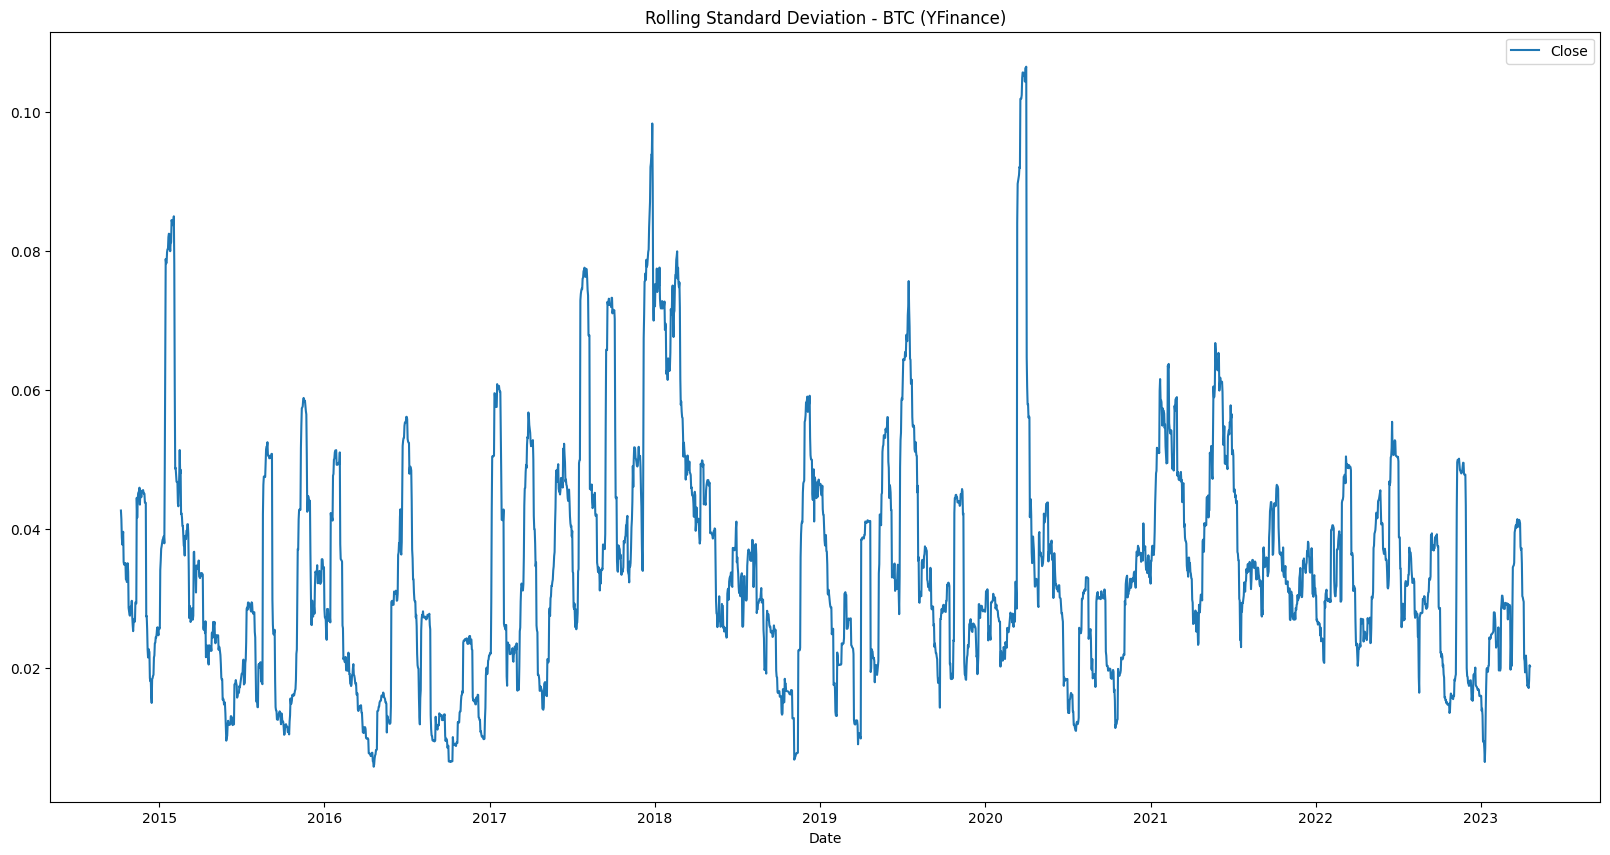

In [128]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_roll = btc_c.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (YFinance)")

# Plot the rolling standard deviation
btc_roll;
plt.savefig("Images/RollingSTD_yfinance.png")

In [129]:
yf_data = yf.download("BTC-USD", start="2011-01-01", end="2012-01-01")
yf_data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: Data doesn't exist for startDate = 1293840000, endDate = 1325376000


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [130]:
# !pip install quandl

In [131]:
import quandl


In [132]:
# Save API Key for Quandl to Access
# quandl.save_key("api_key")
# print(quandl.ApiConfig.api_key)

In [133]:
# Import API Key securely
quandl.read_key()

In [134]:
# Grabbing BTC Data from Quandl
data_q = quandl.get('BCHAIN/MKPRU')  # Format is: `DATABASE_CODE/DATASET_CODE`
data_q

Value
Date                
2009-01-02      0.00
2009-01-03      0.00
2009-01-04      0.00
2009-01-05      0.00
2009-01-06      0.00
...              ...
2023-04-16  30319.32
2023-04-17  30315.39
2023-04-18  29447.10
2023-04-19  30393.64
2023-04-20  28829.57

[5222 rows x 1 columns]

In [135]:
data_q.isnull().sum()

Value    0
dtype: int64

In [136]:
# Calculating month over month pct change
btc_q = data_q.pct_change()
btc_q

Value
Date                
2009-01-02       NaN
2009-01-03       NaN
2009-01-04       NaN
2009-01-05       NaN
2009-01-06       NaN
...              ...
2023-04-16 -0.005469
2023-04-17 -0.000130
2023-04-18 -0.028642
2023-04-19  0.032144
2023-04-20 -0.051460

[5222 rows x 1 columns]

In [137]:
btc_qna = btc_q.dropna()
btc_qna

Value
Date                
2010-08-16       inf
2010-08-17 -1.000000
2010-08-18       inf
2010-08-19 -0.030523
2010-08-20  0.049475
...              ...
2023-04-16 -0.005469
2023-04-17 -0.000130
2023-04-18 -0.028642
2023-04-19  0.032144
2023-04-20 -0.051460

[4631 rows x 1 columns]

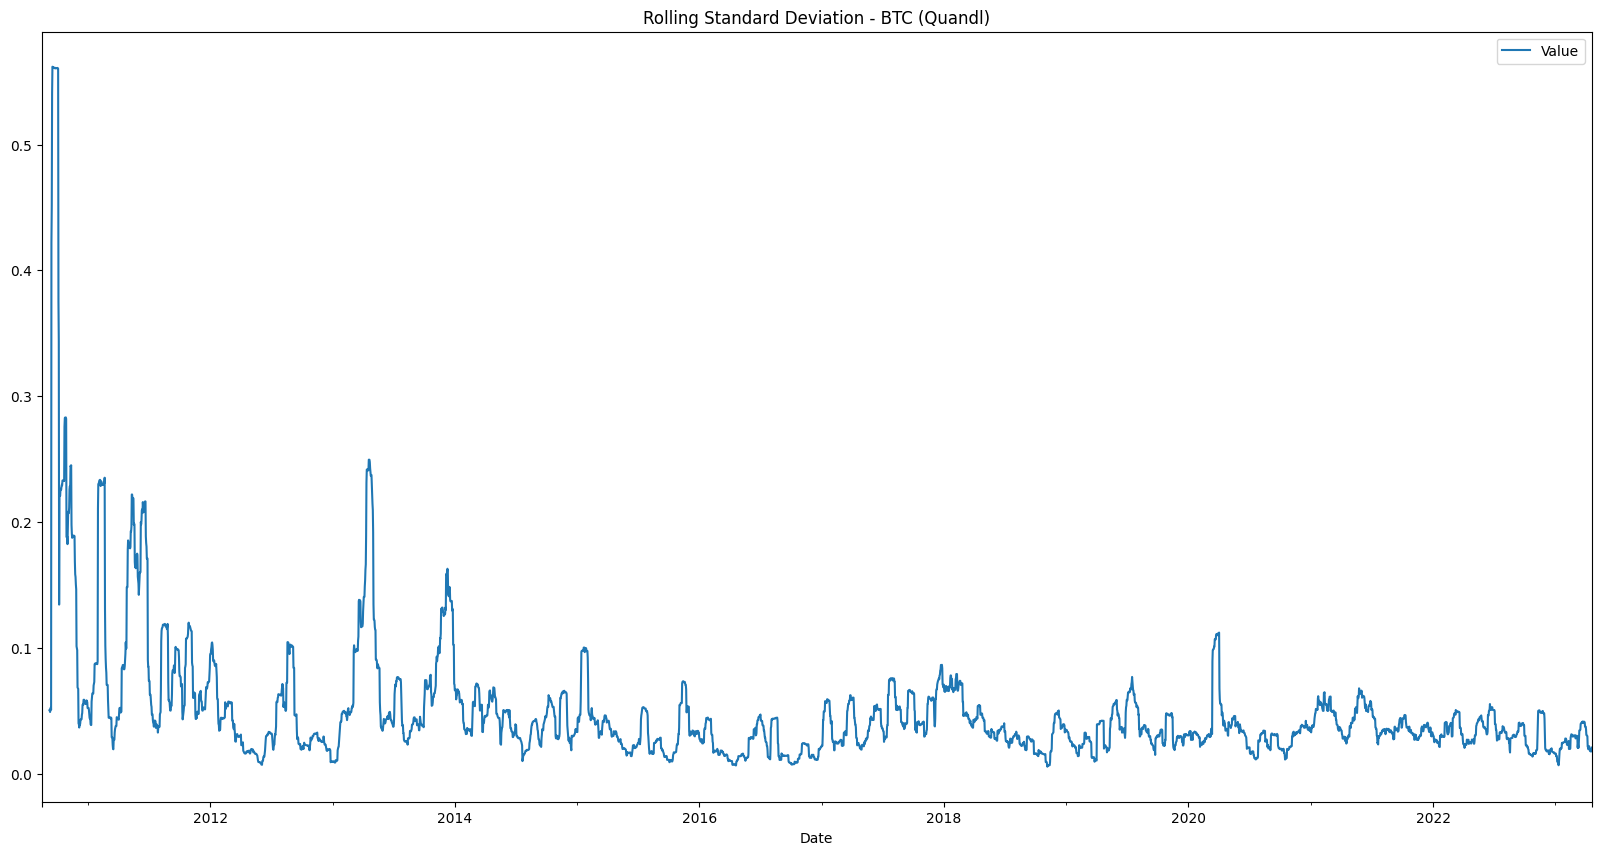

In [138]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolled = btc_qna.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolled;
plt.savefig("Images/RollingSTD_quandl.png")

In [139]:
data_slice = data_q['2010-09-15':'2023']
data_slice

Value
Date                    
2010-09-15      0.061900
2010-09-16      0.150000
2010-09-17      0.060900
2010-09-18      0.062599
2010-09-19      0.060000
...                  ...
2023-04-16  30319.320000
2023-04-17  30315.390000
2023-04-18  29447.100000
2023-04-19  30393.640000
2023-04-20  28829.570000

[4601 rows x 1 columns]

In [140]:
# Calculating month over month pct change
btc_cambio = data_slice.pct_change()
btc_cambio

Value
Date                
2010-09-15       NaN
2010-09-16  1.423263
2010-09-17 -0.594000
2010-09-18  0.027898
2010-09-19 -0.041518
...              ...
2023-04-16 -0.005469
2023-04-17 -0.000130
2023-04-18 -0.028642
2023-04-19  0.032144
2023-04-20 -0.051460

[4601 rows x 1 columns]

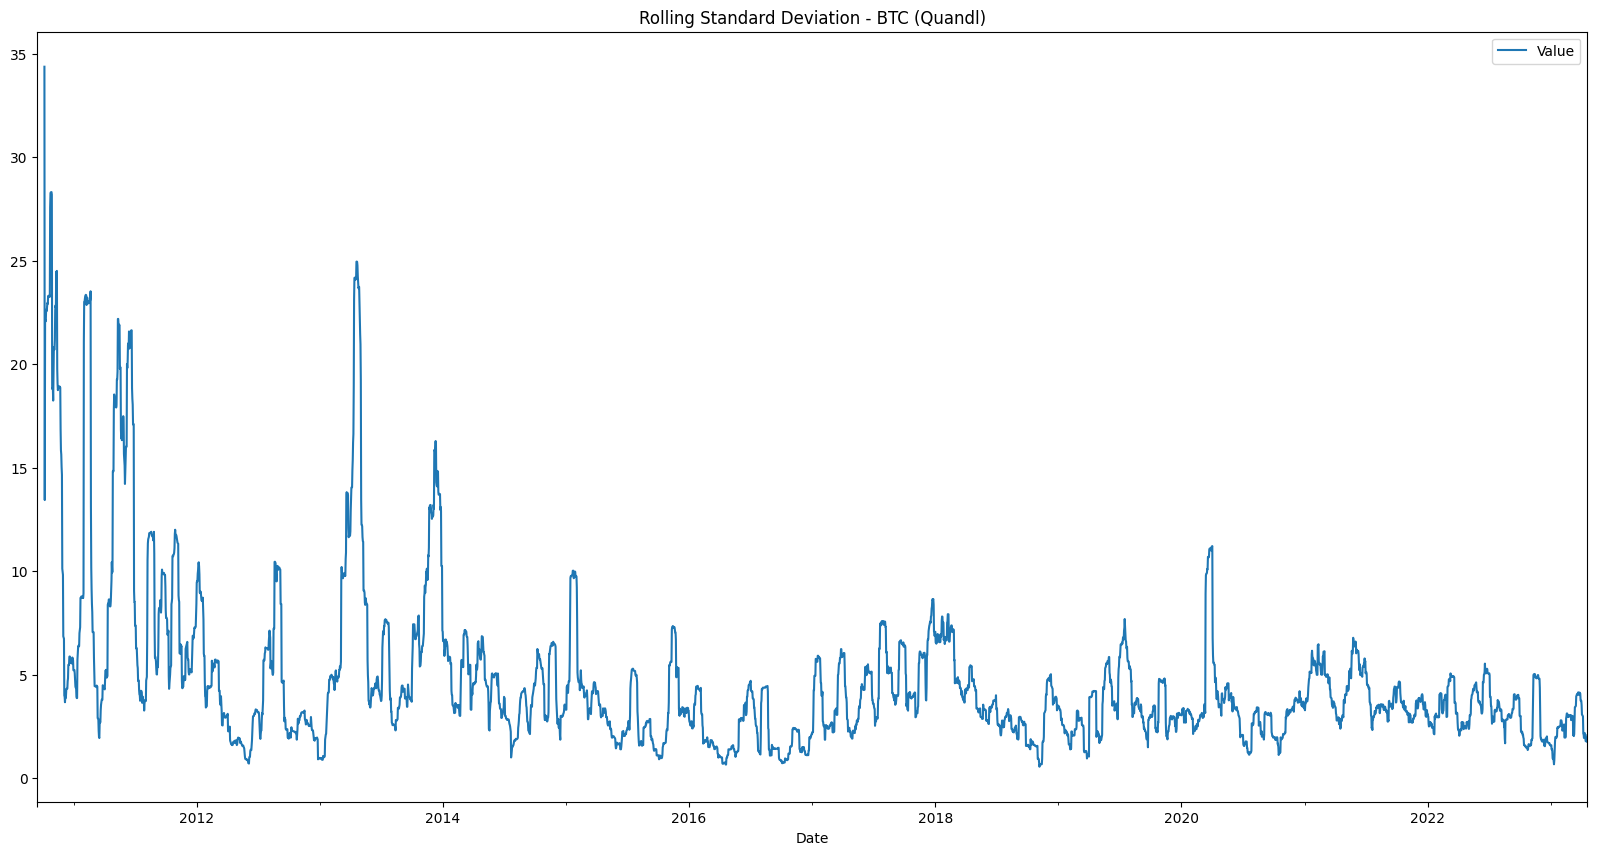

In [141]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolls = (btc_cambio*100).rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolls;
plt.savefig("Images/RollingSTD_quandl_sept.png")

In [142]:
# Grabbing last 30 days
btc_last_30 = btc_df.tail(30)
btc_last_30

symbol  timestamp      open      high       low     close  \
1048  BTC/USD 2023-03-22  28293.67  28900.00  26685.00  27359.80   
1049  BTC/USD 2023-03-23  27360.42  28772.68  27350.29  28194.57   
1050  BTC/USD 2023-03-24  28188.76  28388.63  27084.27  27582.61   
1051  BTC/USD 2023-03-25  27586.39  27850.00  27180.00  27543.78   
1052  BTC/USD 2023-03-26  27546.35  28238.07  27500.98  27946.58   
1053  BTC/USD 2023-03-27  27947.80  28010.46  26540.00  26994.96   
1054  BTC/USD 2023-03-28  26992.83  27622.24  26674.02  27580.86   
1055  BTC/USD 2023-03-29  27580.86  29189.54  27516.03  28594.44   
1056  BTC/USD 2023-03-30  28599.03  28788.12  27719.21  28193.24   
1057  BTC/USD 2023-03-31  28195.37  28824.80  27529.53  28588.44   
1058  BTC/USD 2023-04-01  28588.76  28605.10  28257.82  28404.03   
1059  BTC/USD 2023-04-02  28404.32  28508.68  27579.82  27721.50   
1060  BTC/USD 2023-04-03  27723.97  28522.00  27300.00  27823.92   
1061  BTC/USD 2023-04-04  27827.33  28786.01  27823.59  28513.19   
1062  BTC/USD 2023-04-05  28518.32  28752.57  27861.98  28089.42   
1063  BTC/USD 2023-04-06  28086.02  28197.42  27724.33  28044.99   
1064  BTC/USD 2023-04-07  28042.19  28080.08  27782.43  27999.42   
1065  BTC/USD 2023-04-08  28000.11  28180.00  27885.74  28055.08   
1066  BTC/USD 2023-04-09  28055.09  28551.55  27817.06  28259.98   
1067  BTC/USD 2023-04-10  28261.60  30442.56  28179.00  30127.35   
1068  BTC/USD 2023-04-11  30132.76  30566.97  29810.74  29999.65   
1069  BTC/USD 2023-04-12  29995.67  30500.00  29698.05  30088.37   
1070  BTC/USD 2023-04-13  30319.99  30930.33  30247.42  30740.07   
1071  BTC/USD 2023-04-14  30740.07  31049.99  30727.25  30810.52   
1072  BTC/USD 2023-04-15  30384.86  30500.00  30157.85  30328.77   
1073  BTC/USD 2023-04-16  30331.71  30571.93  29805.39  30022.52   
1074  BTC/USD 2023-04-17  30021.25  30046.03  29118.04  29514.71   
1075  BTC/USD 2023-04-18  29514.67  30498.99  29514.67  30223.30   
1076  BTC/USD 2023-04-19  30223.30  30342.52  28591.00  28910.70   
1077  BTC/USD 2023-04-20  28915.17  29102.49  28668.85  28673.97   

            volume  trade_count          vwap  
1048  17219.154097     571643.0  27889.946132  
1049  14644.892170     516262.0  28088.700852  
1050  11761.353080     369526.0  27837.485939  
1051   6709.724570     179818.0  27506.953196  
1052   8619.723040     252161.0  27874.871683  
1053  12169.421960     384940.0  27302.902467  
1054  10802.762400     415238.0  27140.698798  
1055  17065.085119     580600.0  28415.669898  
1056  13818.790240     339849.0  28282.496754  
1057  10207.067870     238333.0  28264.484682  
1058   3835.215540      91695.0  28443.351585  
1059   6977.723200     144550.0  28061.981229  
1060  14202.439090     234335.0  28033.088149  
1061  10372.334150     167848.0  28262.442598  
1062   8959.369600     149908.0  28228.581600  
1063   6361.327530     105691.0  27997.279878  
1064   4015.262640      82793.0  27924.334599  
1065   2321.540070      45629.0  28027.762592  
1066   4613.152460      73492.0  28170.555198  
1067  11192.487108     162582.0  29310.217974  
1068   8701.623220     134599.0  30147.947549  
1069   6766.824150     143452.0  30058.618412  
1070   4539.725880      87935.0  30585.884375  
1071   1117.960625      20446.0  30879.257949  
1072   3449.800840      83410.0  30362.644170  
1073   5065.192250      95612.0  30270.499399  
1074   6955.690840     110060.0  29539.296045  
1075   8185.486490     127611.0  30167.675987  
1076   9832.706480     173320.0  29296.807967  
1077   1311.834560      20627.0  28892.647778

In [143]:
# Subset of timestamp and close
btc_30 = btc_last_30[['timestamp','close']]
btc_30

timestamp     close
1048 2023-03-22  27359.80
1049 2023-03-23  28194.57
1050 2023-03-24  27582.61
1051 2023-03-25  27543.78
1052 2023-03-26  27946.58
1053 2023-03-27  26994.96
1054 2023-03-28  27580.86
1055 2023-03-29  28594.44
1056 2023-03-30  28193.24
1057 2023-03-31  28588.44
1058 2023-04-01  28404.03
1059 2023-04-02  27721.50
1060 2023-04-03  27823.92
1061 2023-04-04  28513.19
1062 2023-04-05  28089.42
1063 2023-04-06  28044.99
1064 2023-04-07  27999.42
1065 2023-04-08  28055.08
1066 2023-04-09  28259.98
1067 2023-04-10  30127.35
1068 2023-04-11  29999.65
1069 2023-04-12  30088.37
1070 2023-04-13  30740.07
1071 2023-04-14  30810.52
1072 2023-04-15  30328.77
1073 2023-04-16  30022.52
1074 2023-04-17  29514.71
1075 2023-04-18  30223.30
1076 2023-04-19  28910.70
1077 2023-04-20  28673.97

In [144]:
# Setting timestamp as index
btc_30_index = btc_30.set_index('timestamp')
btc_30_index

close
timestamp           
2023-03-22  27359.80
2023-03-23  28194.57
2023-03-24  27582.61
2023-03-25  27543.78
2023-03-26  27946.58
2023-03-27  26994.96
2023-03-28  27580.86
2023-03-29  28594.44
2023-03-30  28193.24
2023-03-31  28588.44
2023-04-01  28404.03
2023-04-02  27721.50
2023-04-03  27823.92
2023-04-04  28513.19
2023-04-05  28089.42
2023-04-06  28044.99
2023-04-07  27999.42
2023-04-08  28055.08
2023-04-09  28259.98
2023-04-10  30127.35
2023-04-11  29999.65
2023-04-12  30088.37
2023-04-13  30740.07
2023-04-14  30810.52
2023-04-15  30328.77
2023-04-16  30022.52
2023-04-17  29514.71
2023-04-18  30223.30
2023-04-19  28910.70
2023-04-20  28673.97

In [145]:
# Running daily percentage change
btc_last_pct = btc_30_index.pct_change()
btc_last_pct

close
timestamp           
2023-03-22       NaN
2023-03-23  0.030511
2023-03-24 -0.021705
2023-03-25 -0.001408
2023-03-26  0.014624
2023-03-27 -0.034051
2023-03-28  0.021704
2023-03-29  0.036749
2023-03-30 -0.014031
2023-03-31  0.014018
2023-04-01 -0.006451
2023-04-02 -0.024029
2023-04-03  0.003695
2023-04-04  0.024773
2023-04-05 -0.014862
2023-04-06 -0.001582
2023-04-07 -0.001625
2023-04-08  0.001988
2023-04-09  0.007303
2023-04-10  0.066078
2023-04-11 -0.004239
2023-04-12  0.002957
2023-04-13  0.021660
2023-04-14  0.002292
2023-04-15 -0.015636
2023-04-16 -0.010098
2023-04-17 -0.016914
2023-04-18  0.024008
2023-04-19 -0.043430
2023-04-20 -0.008188

In [146]:
# Checking info
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-03-22 to 2023-04-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [147]:
# Convert index back to string to prep for plotting
btc_last_pct.index = btc_last_pct.index.strftime("%Y-%m-%d")
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2023-03-22 to 2023-04-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0+ bytes


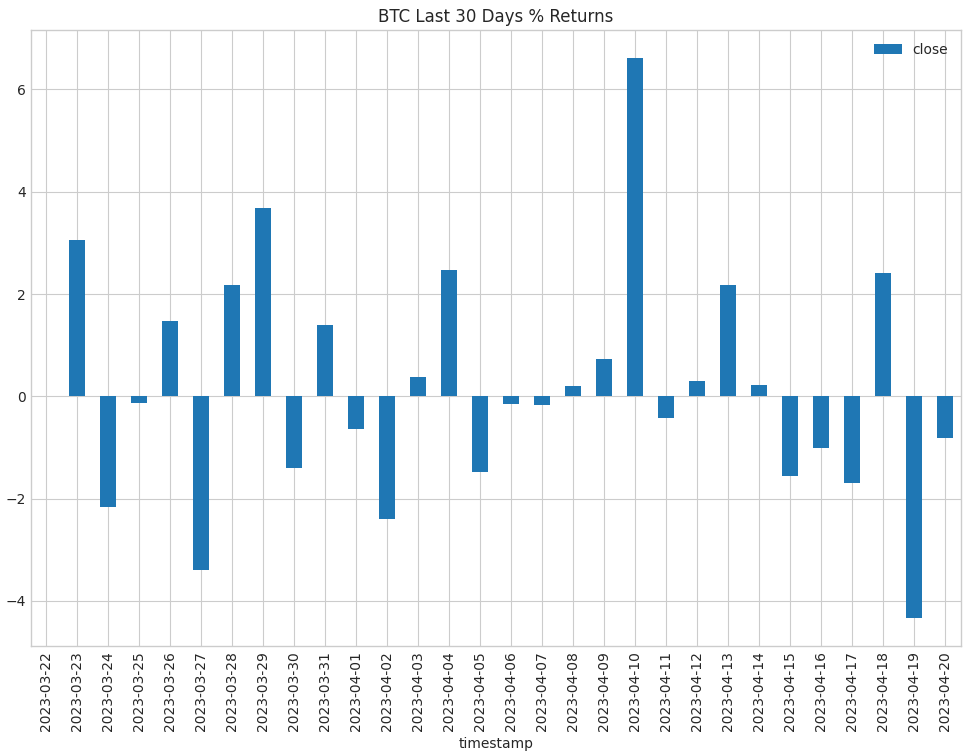

In [148]:
# Plot performance in last 30 days percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_last_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Last 30 Days % Returns");
    plt.savefig("Images/BTCDailyPercentReturns.png")

In [149]:
import plotly.express as px

In [150]:
# Comparing Plotly
fig = px.bar(btc_last_pct*100, 
  y="close",
  x=btc_last_pct.index,
  title="BTC Last 30 Days % Returns",
  template="simple_white",
  labels={"close": "Daily Change (%)"},
  width=900, 
  height=800,
            )

fig.update_xaxes(title_text='Days', dtick="d1")

fig.update_layout(title_x=0.5, xaxis_tickformat='%d-%b')

# fig.write_image("Images/plotly_btc_last_30.png")

In [151]:
btc_nov_low = btc_df.tail(141)
btc_nov_low

symbol  timestamp      open      high       low     close       volume  \
937   BTC/USD 2022-12-01  17112.80  17312.76  16858.78  16936.52  5872.049400   
938   BTC/USD 2022-12-02  16936.52  17162.67  16793.12  17018.69  5166.387110   
939   BTC/USD 2022-12-03  17018.69  17072.67  16862.77  17015.51  3323.272891   
940   BTC/USD 2022-12-04  17019.21  17424.31  16911.06  17344.37  6008.056760   
941   BTC/USD 2022-12-05  17344.37  17389.03  16870.58  16978.02  7324.949316   
...       ...        ...       ...       ...       ...       ...          ...   
1073  BTC/USD 2023-04-16  30331.71  30571.93  29805.39  30022.52  5065.192250   
1074  BTC/USD 2023-04-17  30021.25  30046.03  29118.04  29514.71  6955.690840   
1075  BTC/USD 2023-04-18  29514.67  30498.99  29514.67  30223.30  8185.486490   
1076  BTC/USD 2023-04-19  30223.30  30342.52  28591.00  28910.70  9832.706480   
1077  BTC/USD 2023-04-20  28915.17  29102.49  28668.85  28673.97  1311.834560   

      trade_count          vwap  
937      109770.0  17010.997271  
938      105950.0  16974.090499  
939       57416.0  16955.830793  
940      100723.0  17143.076879  
941      119394.0  17089.282043  
...           ...           ...  
1073      95612.0  30270.499399  
1074     110060.0  29539.296045  
1075     127611.0  30167.675987  
1076     173320.0  29296.807967  
1077      20627.0  28892.647778  

[141 rows x 9 columns]

In [152]:
btc_seit = btc_nov_low[['timestamp','close']]
btc_seit

timestamp     close
937  2022-12-01  16936.52
938  2022-12-02  17018.69
939  2022-12-03  17015.51
940  2022-12-04  17344.37
941  2022-12-05  16978.02
...         ...       ...
1073 2023-04-16  30022.52
1074 2023-04-17  29514.71
1075 2023-04-18  30223.30
1076 2023-04-19  28910.70
1077 2023-04-20  28673.97

[141 rows x 2 columns]

In [153]:
btc_nov_index = btc_seit.set_index('timestamp')
btc_nov_index

close
timestamp           
2022-12-01  16936.52
2022-12-02  17018.69
2022-12-03  17015.51
2022-12-04  17344.37
2022-12-05  16978.02
...              ...
2023-04-16  30022.52
2023-04-17  29514.71
2023-04-18  30223.30
2023-04-19  28910.70
2023-04-20  28673.97

[141 rows x 1 columns]

In [154]:
# btc_365.min()

NameError: name 'btc_365' is not defined

In [ ]:
# btc_365[btc_365['close'] == 15781.17]

In [155]:
btc_nov_pct = btc_nov_index.pct_change()
btc_nov_pct

close
timestamp           
2022-12-01       NaN
2022-12-02  0.004852
2022-12-03 -0.000187
2022-12-04  0.019327
2022-12-05 -0.021122
...              ...
2023-04-16 -0.010098
2023-04-17 -0.016914
2023-04-18  0.024008
2023-04-19 -0.043430
2023-04-20 -0.008188

[141 rows x 1 columns]

In [156]:
# Up off November lows
btc_nov_cumprod = (1 + btc_nov_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_nov_round = round((btc_nov_cumprod*100)-100,2)
btc_nov_round

close
timestamp        
2022-12-01    NaN
2022-12-02   0.49
2022-12-03   0.47
2022-12-04   2.41
2022-12-05   0.25
...           ...
2023-04-16  77.26
2023-04-17  74.27
2023-04-18  78.45
2023-04-19  70.70
2023-04-20  69.30

[141 rows x 1 columns]

In [157]:
# Plotly - BTC off November lows line chart
fig = px.line(btc_nov_round, 
  y="close",
  x=btc_nov_round.index,
  title="BTC - % Returns Off November Lows",
  template="simple_white",
  labels={"close": "Percentage Change"},
  width=900, 
  height=800,
            )

fig.update_xaxes(title_text='')

fig.update_layout(title_x=0.5)

fig.add_annotation( # add a text callout with arrow
    text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
)

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [158]:
new_q = data_q['2010-08-18':]
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-04-16  30319.3200
2023-04-17  30315.3900
2023-04-18  29447.1000
2023-04-19  30393.6400
2023-04-20  28829.5700

[4629 rows x 1 columns]

In [159]:
btc_alltime_pct = new_q.pct_change()
btc_alltime_pct

Value
Date                
2010-08-18       NaN
2010-08-19 -0.030523
2010-08-20  0.049475
2010-08-21 -0.051429
2010-08-22 -0.006024
...              ...
2023-04-16 -0.005469
2023-04-17 -0.000130
2023-04-18 -0.028642
2023-04-19  0.032144
2023-04-20 -0.051460

[4629 rows x 1 columns]

In [160]:
# All Time Returns
btc_alltime_cumprod = (1 + btc_alltime_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_alltime_round = round((btc_alltime_cumprod*100)-100,2)
btc_alltime_round

Value
Date                   
2010-08-18          NaN
2010-08-19        -3.05
2010-08-20         1.74
2010-08-21        -3.49
2010-08-22        -4.07
...                 ...
2023-04-16  44068679.07
2023-04-17  44062966.86
2023-04-18  42800917.44
2023-04-19  44176702.33
2023-04-20  41903344.77

[4629 rows x 1 columns]

In [161]:
new_2010 = data_q['2010-08-18':'2010-12-31']
new_2010

Value
Date                
2010-08-18  0.068800
2010-08-19  0.066700
2010-08-20  0.070000
2010-08-21  0.066400
2010-08-22  0.066000
...              ...
2010-12-27  0.270000
2010-12-28  0.301000
2010-12-29  0.299999
2010-12-30  0.300000
2010-12-31  0.299998

[136 rows x 1 columns]

In [162]:
btc_2010_pct = new_2010.pct_change()
btc_2010_pct

Value
Date                
2010-08-18       NaN
2010-08-19 -0.030523
2010-08-20  0.049475
2010-08-21 -0.051429
2010-08-22 -0.006024
...              ...
2010-12-27  0.018868
2010-12-28  0.114815
2010-12-29 -0.003326
2010-12-30  0.000003
2010-12-31 -0.000007

[136 rows x 1 columns]

In [163]:
# 2010 Returns
btc_2010_cumprod = (1 + btc_2010_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_2010_round = round((btc_2010_cumprod*100)-100,2)
btc_2010_round

Value
Date              
2010-08-18     NaN
2010-08-19   -3.05
2010-08-20    1.74
2010-08-21   -3.49
2010-08-22   -4.07
...            ...
2010-12-27  292.44
2010-12-28  337.50
2010-12-29  336.05
2010-12-30  336.05
2010-12-31  336.04

[136 rows x 1 columns]

In [164]:
# 2011 Returns
new_2011 = data_q['2011-01-01':'2011-12-31']

# percentage change calculation
btc_2011_pct = new_2011.pct_change()

# cumulative product
btc_2011_cumprod = (1 + btc_2011_pct).cumprod()
btc_2011_round = round((btc_2010_cumprod*100)-100,2)
btc_2011_round

Value
Date              
2010-08-18     NaN
2010-08-19   -3.05
2010-08-20    1.74
2010-08-21   -3.49
2010-08-22   -4.07
...            ...
2010-12-27  292.44
2010-12-28  337.50
2010-12-29  336.05
2010-12-30  336.05
2010-12-31  336.04

[136 rows x 1 columns]

In [165]:
# 2012 Returns
new_2012 = data_q['2012-01-01':'2012-12-31']

# percentage change calculation
btc_2012_pct = new_2012.pct_change()

# cumulative product
btc_2012_cumprod = (1 + btc_2012_pct).cumprod()
btc_2012_round = round((btc_2012_cumprod*100)-100,2)
btc_2012_round

Value
Date              
2012-01-01     NaN
2012-01-02   -3.82
2012-01-03   -0.91
2012-01-04   16.35
2012-01-05   31.28
...            ...
2012-12-27  148.18
2012-12-28  145.64
2012-12-29  146.73
2012-12-30  147.10
2012-12-31  146.73

[366 rows x 1 columns]

In [166]:
# 2013 Returns
new_2013 = data_q['2013-01-01':'2013-12-31']

# percentage change calculation
btc_2013_pct = new_2013.pct_change()

# cumulative product
btc_2013_cumprod = (1 + btc_2013_pct).cumprod()
btc_2013_round = round((btc_2013_cumprod*100)-100,2)
btc_2013_round

Value
Date               
2013-01-01      NaN
2013-01-02     0.48
2013-01-03     0.15
2013-01-04     1.10
2013-01-05     0.97
...             ...
2013-12-27  5135.90
2013-12-28  5234.25
2013-12-29  5235.82
2013-12-30  5355.22
2013-12-31  5473.88

[365 rows x 1 columns]

In [167]:
# 2014 Returns
new_2014 = data_q['2014-01-01':'2014-12-31']

# percentage change calculation
btc_2014_pct = new_2014.pct_change()

# cumulative product
btc_2014_cumprod = (1 + btc_2014_pct).cumprod()
btc_2014_round = round((btc_2014_cumprod*100)-100,2)
btc_2014_round

Value
Date             
2014-01-01    NaN
2014-01-02  10.14
2014-01-03  12.35
2014-01-04  10.30
2014-01-05  27.62
...           ...
2014-12-27 -54.93
2014-12-28 -57.04
2014-12-29 -57.23
2014-12-30 -57.19
2014-12-31 -56.87

[365 rows x 1 columns]

In [168]:
# 2015 Returns
new_2015 = data_q['2015-01-01':'2015-12-31']

# percentage change calculation
btc_2015_pct = new_2015.pct_change()

# cumulative product
btc_2015_cumprod = (1 + btc_2015_pct).cumprod()
btc_2015_round = round((btc_2015_cumprod*100)-100,2)
btc_2015_round

Value
Date             
2015-01-01    NaN
2015-01-02  -0.42
2015-01-03 -14.30
2015-01-04 -12.45
2015-01-05 -16.76
...           ...
2015-12-27  32.36
2015-12-28  33.61
2015-12-29  36.37
2015-12-30  35.38
2015-12-31  35.45

[365 rows x 1 columns]

In [169]:
# 2016 Returns
new_2016 = data_q['2016-01-01':'2016-12-31']

# percentage change calculation
btc_2016_pct = new_2016.pct_change()

# cumulative product
btc_2016_cumprod = (1 + btc_2016_pct).cumprod()
btc_2016_round = round((btc_2016_cumprod*100)-100,2)
btc_2016_round

Value
Date              
2016-01-01     NaN
2016-01-02    0.37
2016-01-03    0.10
2016-01-04    0.15
2016-01-05   -0.10
...            ...
2016-12-27  115.20
2016-12-28  115.19
2016-12-29  122.83
2016-12-30  120.24
2016-12-31  121.62

[366 rows x 1 columns]

In [170]:
# 2017 Returns
new_2017 = data_q['2017-01-01':'2017-12-31']

# percentage change calculation
btc_2017_pct = new_2017.pct_change()

# cumulative product
btc_2017_cumprod = (1 + btc_2017_pct).cumprod()
btc_2017_round = round((btc_2017_cumprod*100)-100,2)
btc_2017_round

Value
Date               
2017-01-01      NaN
2017-01-02     1.83
2017-01-03     1.57
2017-01-04    12.93
2017-01-05    -0.31
...             ...
2017-12-27  1462.49
2017-12-28  1341.34
2017-12-29  1324.65
2017-12-30  1224.58
2017-12-31  1319.79

[365 rows x 1 columns]

In [171]:
# 2018 Returns
new_2018 = data_q['2018-01-01':'2018-12-31']

# percentage change calculation
btc_2018_pct = new_2018.pct_change()

# cumulative product
btc_2018_cumprod = (1 + btc_2018_pct).cumprod()
btc_2018_round = round((btc_2018_cumprod*100)-100,2)
btc_2018_round

Value
Date             
2018-01-01    NaN
2018-01-02   8.77
2018-01-03   9.11
2018-01-04   9.01
2018-01-05  24.49
...           ...
2018-12-27 -72.11
2018-12-28 -72.86
2018-12-29 -71.64
2018-12-30 -72.67
2018-12-31 -72.52

[365 rows x 1 columns]

In [172]:
# 2019 Returns
new_2019 = data_q['2019-01-01':'2019-12-31']

# percentage change calculation
btc_2019_pct = new_2019.pct_change()

# cumulative product
btc_2019_cumprod = (1 + btc_2019_pct).cumprod()
btc_2019_round = round((btc_2019_cumprod*100)-100,2)
btc_2019_round

Value
Date             
2019-01-01    NaN
2019-01-02   2.76
2019-01-03   3.03
2019-01-04   1.87
2019-01-05   2.78
...           ...
2019-12-27  91.73
2019-12-28  93.05
2019-12-29  94.58
2019-12-30  96.82
2019-12-31  92.41

[365 rows x 1 columns]

In [173]:
# 2020 Returns
new_2020 = data_q['2020-01-01':'2020-12-31']

# percentage change calculation
btc_2020_pct = new_2020.pct_change()

# cumulative product
btc_2020_cumprod = (1 + btc_2020_pct).cumprod()
btc_2020_round = round((btc_2020_cumprod*100)-100,2)
btc_2020_round

Value
Date              
2020-01-01     NaN
2020-01-02    0.10
2020-01-03   -3.12
2020-01-04    2.20
2020-01-05    2.51
...            ...
2020-12-27  268.89
2020-12-28  266.15
2020-12-29  277.17
2020-12-30  281.91
2020-12-31  302.56

[366 rows x 1 columns]

In [174]:
# 2021 Returns
new_2021 = data_q['2021-01-01':'2021-12-31']

# percentage change calculation
btc_2021_pct = new_2021.pct_change()

# cumulative product
btc_2021_cumprod = (1 + btc_2021_pct).cumprod()
btc_2021_round = round((btc_2021_cumprod*100)-100,2)
btc_2021_round

Value
Date             
2021-01-01    NaN
2021-01-02   1.42
2021-01-03  11.09
2021-01-04  13.86
2021-01-05  10.53
...           ...
2021-12-27  75.28
2021-12-28  74.91
2021-12-29  64.24
2021-12-30  60.13
2021-12-31  62.63

[365 rows x 1 columns]

In [175]:
# 2022 Returns
new_2022 = data_q['2022-01-01':'2022-12-31']

# percentage change calculation
btc_2022_pct = new_2022.pct_change()

# cumulative product
btc_2022_cumprod = (1 + btc_2022_pct).cumprod()
btc_2022_round = round((btc_2022_cumprod*100)-100,2)
btc_2022_round

Value
Date             
2022-01-01    NaN
2022-01-02   3.27
2022-01-03   2.33
2022-01-04   0.42
2022-01-05  -0.84
...           ...
2022-12-27 -63.43
2022-12-28 -63.89
2022-12-29 -64.24
2022-12-30 -64.04
2022-12-31 -64.11

[365 rows x 1 columns]

In [176]:
# 2023 Returns
new_2023 = data_q['2023-01-01':]

# percentage change calculation
btc_2023_pct = new_2023.pct_change()

# cumulative product
btc_2023_cumprod = (1 + btc_2023_pct).cumprod()
btc_2023_round = round((btc_2023_cumprod*100)-100,2)
btc_2023_round

Value
Date             
2023-01-01    NaN
2023-01-02   0.53
2023-01-03   0.88
2023-01-04   0.86
2023-01-05   1.96
...           ...
2023-04-16  83.46
2023-04-17  83.43
2023-04-18  78.18
2023-04-19  83.91
2023-04-20  74.44

[110 rows x 1 columns]

In [177]:
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-04-16  30319.3200
2023-04-17  30315.3900
2023-04-18  29447.1000
2023-04-19  30393.6400
2023-04-20  28829.5700

[4629 rows x 1 columns]

In [178]:
new_q.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4629 entries, 2010-08-18 to 2023-04-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   4629 non-null   float64
dtypes: float64(1)
memory usage: 72.3 KB


In [179]:
new_q_pct = new_q.pct_change()*100
new_q_pct

Value
Date                
2010-08-18       NaN
2010-08-19 -3.052326
2010-08-20  4.947526
2010-08-21 -5.142857
2010-08-22 -0.602410
...              ...
2023-04-16 -0.546906
2023-04-17 -0.012962
2023-04-18 -2.864189
2023-04-19  3.214374
2023-04-20 -5.146044

[4629 rows x 1 columns]

In [180]:
round(new_q_pct.describe(),2)

Value
count  4628.00
mean      0.49
std       7.14
min     -64.63
25%      -1.48
50%       0.05
75%       1.94
max     191.67

In [181]:
fig_daily = px.box(new_q_pct, 
  x="Value", 
  title="Distribution of Daily % Returns Box Plot")

fig_daily.update_xaxes(title_text='Daily % Change')

fig_daily.update_layout(title_x=0.5)

In [211]:
# make count of positive and negative dailies to see breakdown
new_q_pos = new_q_pct[new_q_pct['Value'] > 0].count()
new_q_pos

Value    2386
dtype: int64

In [222]:
new_q_neg = new_q_pct[new_q_pct['Value'] < 0].count()
new_q_neg

Value    2206
dtype: int64

In [213]:
new_q_pos / new_q_neg

Value    1.081596
dtype: float64

In [216]:
new_q_pie = [new_q_pos,new_q_neg]
new_q_pie

[Value    2386
 dtype: int64,
 Value    2206
 dtype: int64]

In [224]:
new_q_pct_loc = new_q_pct.loc[new_q_pct['Value'] > 0,:]
new_q_pct_loc

Value    2386
dtype: int64

In [244]:
pos = []
neg = []

for x in new_q_pct['Value']:
    if x > 0:
        pos.append(x)
    else:
        neg.append(x)
    

    
pos

[4.947526236881572,
 6.060606060606055,
 5.2647408231702775,
 8.283333333333331,
 5.666666666666664,
 6.666666666666665,
 4.0000000000000036,
 8.33166666666667,
 191.66666666666666,
 142.32633279483036,
 2.78981937602627,
 5.499999999999994,
 4.6833333333333504,
 3.6766666666666614,
 0.8102112336430656,
 3.200000000000003,
 0.1275839793281497,
 2.333333333333343,
 0.9771986970684043,
 5.499999999999994,
 0.789889415481837,
 100.01666666666668,
 5.263157894736836,
 18.999999999999993,
 10.091743119266061,
 8.999999999999986,
 2.8037383177570208,
 72.72727272727273,
 19.999999999999996,
 5.555555555555558,
 0.005263157894752624,
 1.0000000000000009,
 3.699843668577407,
 2.894736842105261,
 40.66496163682864,
 14.23809523809525,
 20.883701542309296,
 48.0,
 6.888361045130642,
 4.583333333333339,
 24.583333333333336,
 6.082036775106081,
 3.5710714285714262,
 3.214285714285703,
 0.34602076124568004,
 2.4771193328386065,
 1.9694162075112764,
 1.81818181818183,
 2.1200000000000108,
 2.2222222

In [251]:
pie_df = pd.DataFrame({'Pos_Values': [pos], 'Neg_Values': [neg]})
pie_df

Pos_Values  \
0  [4.947526236881572, 6.060606060606055, 5.26474...   

                                          Neg_Values  
0  [nan, -3.0523255813953543, -5.1428571428571495...

In [246]:
# Comparing Plotly
fig_pie = px.pie(pie_df)

fig_pie
#   y="Value",
#   x=yearly_pct.index,
#   title="BTC Annual % Returns",
#   template="simple_white",
#   labels={"Value": "Annual Change (%)"},
#   width=900, 
#   height=600,
#             )

# fig.update_xaxes(title_text='Year End')

# fig.update_layout(title_x=0.5)

# fig.write_image("Images/plotly_btc_last_30.png")

In [ ]:
# make subplots of daily % change box plots grouped by year to see the evolution over time

In [183]:
new_reset = new_q.reset_index()
new_reset

Date       Value
0    2010-08-18      0.0688
1    2010-08-19      0.0667
2    2010-08-20      0.0700
3    2010-08-21      0.0664
4    2010-08-22      0.0660
...         ...         ...
4624 2023-04-16  30319.3200
4625 2023-04-17  30315.3900
4626 2023-04-18  29447.1000
4627 2023-04-19  30393.6400
4628 2023-04-20  28829.5700

[4629 rows x 2 columns]

In [184]:
new_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4629 non-null   datetime64[ns]
 1   Value   4629 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 72.5 KB


In [185]:
# Count of trading days per year
new_group = new_reset['Value'].groupby(new_reset['Date'].dt.year).count()
new_group

Date
2010    136
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    110
Name: Value, dtype: int64

In [186]:
# Attempting to get groupby year and pct change on value column but wasn't really working, found solution
# below with resample and apply
new_reset.groupby(new_reset['Date'].dt.year)['Value'].pct_change()

0            NaN
1      -0.030523
2       0.049475
3      -0.051429
4      -0.006024
          ...   
4624   -0.005469
4625   -0.000130
4626   -0.028642
4627    0.032144
4628   -0.051460
Name: Value, Length: 4629, dtype: float64

In [187]:
yearly = new_q.resample('A').apply(lambda x: x[-1])
yearly

Value
Date                    
2010-12-31      0.299998
2011-12-31      4.470000
2012-12-31     13.570000
2013-12-31    746.900000
2014-12-31    315.700000
2015-12-31    428.230000
2016-12-31    958.120000
2017-12-31  14165.575000
2018-12-31   3791.545833
2019-12-31   7219.600000
2020-12-31  28856.590000
2021-12-31  47132.960000
2022-12-31  16599.690000
2023-12-31  28829.570000

In [188]:
yearly_pct = round(yearly.pct_change()*100,2)
yearly_pct

Value
Date               
2010-12-31      NaN
2011-12-31  1390.01
2012-12-31   203.58
2013-12-31  5404.05
2014-12-31   -57.73
2015-12-31    35.64
2016-12-31   123.74
2017-12-31  1378.48
2018-12-31   -73.23
2019-12-31    90.41
2020-12-31   299.70
2021-12-31    63.34
2022-12-31   -64.78
2023-12-31    73.68

In [189]:
# Comparing Plotly
fig_annual = px.bar(yearly_pct, 
  y="Value",
  x=yearly_pct.index,
  title="BTC Annual % Returns",
  template="simple_white",
  labels={"Value": "Annual Change (%)"},
  width=900, 
  height=600,
            )

fig_annual.update_xaxes(title_text='Year End')

fig_annual.update_layout(title_x=0.5)

# fig_annual.write_image("Images/plotly_btc_last_30.png")

In [207]:
# Filtering for month start dates
btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
btc_monthly

In [191]:
# Grabbing month end using resample and apply
monthly = new_q.resample('BM').apply(lambda x: x[-1])
monthly

Value
Date                    
2010-08-31      0.064900
2010-09-30      0.061999
2010-10-29      0.191900
2010-11-30      0.280000
2010-12-31      0.299998
...                  ...
2022-12-30  16630.490000
2023-01-31  22836.090000
2023-02-28  23497.620000
2023-03-31  28033.060000
2023-04-28  28829.570000

[153 rows x 1 columns]

In [192]:
monthly_pct = round(monthly.pct_change()*100,2)
monthly_pct

Value
Date              
2010-08-31     NaN
2010-09-30   -4.47
2010-10-29  209.52
2010-11-30   45.91
2010-12-31    7.14
...            ...
2022-12-30    1.20
2023-01-31   37.31
2023-02-28    2.90
2023-03-31   19.30
2023-04-28    2.84

[153 rows x 1 columns]

In [193]:
round(monthly_pct.describe(),2)

Value
count  152.00
mean    16.26
std     54.83
min    -38.77
25%    -10.80
50%      5.29
75%     25.72
max    398.97

In [276]:
fig2 = px.box(monthly_pct, 
  x="Value",
  title="Distribution of Monthly % Returns")

fig2.update_xaxes(title_text='Monthly % Change')

fig2.update_layout(title_x=0.5)

# fig2.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2013-03-29", arrowhead=1, showarrow=True
# )

# fig2.write_image("Images/plotly_btc_monthly_returns_dist.png")

In [195]:
# Checking dates of monthly outliers
monthly_sort = monthly_pct.sort_values('Value', ascending=False)
monthly_sort.head(10)

Value
Date              
2013-11-29  398.97
2011-05-31  253.05
2011-04-29  232.51
2011-01-31  216.67
2010-10-29  209.52
2013-03-29  160.91
2011-06-30   81.02
2017-05-31   71.71
2013-02-28   63.75
2013-10-31   60.02

In [196]:
# Grouping GLD by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
gld_group_df

symbol      open      high       low   close      volume  \
timestamp                                                             
2020-04-01    GLD  155.9100  155.9400  154.5900  154.65   7600804.0   
2020-05-01    GLD  157.9500  160.4500  157.8000  159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900  163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400  166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000  185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300  185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375  178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301  177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000  170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550  182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600  174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600  161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800  161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100  167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900  177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000  166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000  169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600  169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850  164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100  167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600  166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000  168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700  168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300  181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800  179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850  173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900  172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600  168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100  165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200  157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300  158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700  153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750  167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200  171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300  181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700  170.76   6590684.0   
2023-04-03    GLD  183.8500  185.0350  183.3200  184.54   9206828.0   

            trade_count        vwap  
timestamp                            
2020-04-01      60704.0  155.233884  
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.0  164.970363  
2022-09-01      56371.0  157.944854  
2022-10-03      69080.0  

In [252]:
gld_test = stock_index.groupby('symbol').nth(0)
gld_test

open    high       low   close       volume  trade_count        vwap
symbol                                                                        
GLD     155.91  155.94  154.5900  154.65    7600804.0      60704.0  155.233884
SPY     267.96  276.00  265.2542  274.00  153774487.0     950859.0  271.051454
TLT     165.11  166.19  164.1300  165.09   10147077.0      63686.0  165.217491

In [256]:
gld_loc = stock_index.loc[stock_index['symbol'] == 'GLD',:]
gld_loc[gld_loc.index == '2020-04-30']

symbol    open    high     low  close      volume  trade_count  \
timestamp                                                                   
2020-04-30    GLD  160.22  160.82  158.13  158.8  13633483.0     107884.0   

                  vwap  
timestamp               
2020-04-30  159.269773

In [257]:
gld_monthly2 = gld_loc.resample('BM').apply(lambda x: x[-1])
gld_monthly2.head()

symbol    open      high      low   close      volume  trade_count  \
timestamp                                                                       
2020-04-30    GLD  160.22  160.8200  158.130  158.80  13633483.0     107884.0   
2020-05-29    GLD  162.58  163.4000  162.320  162.91  12584009.0      70183.0   
2020-06-30    GLD  166.31  167.9906  166.185  167.37  12762597.0      84161.0   
2020-07-31    GLD  184.51  185.7501  184.165  185.56  15885010.0     107782.0   
2020-08-31    GLD  184.79  185.5300  184.280  184.82  10251152.0      71796.0   

                  vwap  
timestamp               
2020-04-30  159.269773  
2020-05-29  162.852059  
2020-06-30  167.268997  
2020-07-31  185.142863  
2020-08-31  184.986839

In [289]:
# Revising column names to prep for join

gld_dict2 = {'close':'gld_close'}

gld_monthly2 = gld_monthly2.rename(columns=gld_dict2)
gld_monthly2


tlt_dict2 = {'close':'tlt_close'}

tlt_monthly2 = tlt_monthly2.rename(columns=tlt_dict2)


spy_dict2 = {'close':'spy_close'}

spy_monthly2 = spy_monthly2.rename(columns=spy_dict2)
spy_monthly2.head()



symbol    open      high     low  spy_close       volume  \
timestamp                                                             
2020-04-30    SPY  291.71  293.3239  288.59   290.6300  123003721.0   
2020-05-29    SPY  302.46  304.9600  299.47   304.4900  119265702.0   
2020-06-30    SPY  304.01  310.2000  303.82   308.9400  113444772.0   
2020-07-31    SPY  325.90  326.6300  321.33   326.4000   85211555.0   
2020-08-31    SPY  350.35  351.3000  349.06   349.8206   66099183.0   

            trade_count        vwap  
timestamp                            
2020-04-30     650783.0  290.584103  
2020-05-29     667925.0  302.753666  
2020-06-30     523384.0  307.462538  
2020-07-31     448876.0  324.494578  
2020-08-31     322309.0  350.256348

In [278]:
spy_loc = stock_index.loc[stock_index['symbol'] == 'SPY',:]
spy_loc[spy_loc.index == '2020-04-30']

symbol    open      high     low   close       volume  trade_count  \
timestamp                                                                       
2020-04-30    SPY  291.71  293.3239  288.59  290.63  123003721.0     650783.0   

                  vwap  
timestamp               
2020-04-30  290.584103

In [279]:
spy_monthly2 = spy_loc.resample('BM').apply(lambda x: x[-1])
spy_monthly2.head()

symbol    open      high     low     close       volume  \
timestamp                                                            
2020-04-30    SPY  291.71  293.3239  288.59  290.6300  123003721.0   
2020-05-29    SPY  302.46  304.9600  299.47  304.4900  119265702.0   
2020-06-30    SPY  304.01  310.2000  303.82  308.9400  113444772.0   
2020-07-31    SPY  325.90  326.6300  321.33  326.4000   85211555.0   
2020-08-31    SPY  350.35  351.3000  349.06  349.8206   66099183.0   

            trade_count        vwap  
timestamp                            
2020-04-30     650783.0  290.584103  
2020-05-29     667925.0  302.753666  
2020-06-30     523384.0  307.462538  
2020-07-31     448876.0  324.494578  
2020-08-31     322309.0  350.256348

In [280]:
tlt_loc = stock_index.loc[stock_index['symbol'] == 'TLT',:]
tlt_loc[tlt_loc.index == '2020-04-30']

symbol    open    high     low   close      volume  trade_count  \
timestamp                                                                    
2020-04-30    TLT  168.74  169.23  166.71  166.74  11606074.0      62765.0   

                  vwap  
timestamp               
2020-04-30  167.875507

In [281]:
tlt_monthly2 = tlt_loc.resample('BM').apply(lambda x: x[-1])
tlt_monthly2.head()

symbol    open      high      low   close      volume  trade_count  \
timestamp                                                                       
2020-04-30    TLT  168.74  169.2300  166.710  166.74  11606074.0      62765.0   
2020-05-29    TLT  162.71  164.0900  162.355  163.59  14662054.0      75454.0   
2020-06-30    TLT  165.23  165.2900  163.480  163.93  14841678.0      79244.0   
2020-07-31    TLT  170.15  171.4554  169.940  171.00   8886264.0      57269.0   
2020-08-31    TLT  161.60  163.2500  161.560  162.19  11388108.0      75800.0   

                  vwap  
timestamp               
2020-04-30  167.875507  
2020-05-29  163.264590  
2020-06-30  164.132873  
2020-07-31  170.685787  
2020-08-31  162.449506

In [260]:
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-04-16  30319.3200
2023-04-17  30315.3900
2023-04-18  29447.1000
2023-04-19  30393.6400
2023-04-20  28829.5700

[4629 rows x 1 columns]

In [264]:
btc_resamp = data_q['2020-04-01':]
btc_resamp

Value
Date                
2020-04-01   6428.28
2020-04-02   6652.87
2020-04-03   6809.11
2020-04-04   6741.67
2020-04-05   6871.69
...              ...
2023-04-16  30319.32
2023-04-17  30315.39
2023-04-18  29447.10
2023-04-19  30393.64
2023-04-20  28829.57

[1115 rows x 1 columns]

In [265]:
btc_resamp2 = btc_resamp.resample('BM').apply(lambda x: x[-1])
btc_resamp2.head()

Value
Date                
2020-04-30   8777.63
2020-05-29   9569.21
2020-06-30   9185.35
2020-07-31  11114.93
2020-08-31  11707.78

In [295]:
# Testing concat of gld and btc after resample, seems to work now
new_concat = pd.concat([btc_resamp2, gld_monthly2, spy_monthly2, tlt_monthly2], axis=1)
new_concat.head()

Value  symbol    open      high      low  gld_close  \
2020-04-30   8777.63     GLD  160.22  160.8200  158.130     158.80   
2020-05-29   9569.21     GLD  162.58  163.4000  162.320     162.91   
2020-06-30   9185.35     GLD  166.31  167.9906  166.185     167.37   
2020-07-31  11114.93     GLD  184.51  185.7501  184.165     185.56   
2020-08-31  11707.78     GLD  184.79  185.5300  184.280     184.82   

                volume  trade_count        vwap  symbol  ...  trade_count  \
2020-04-30  13633483.0     107884.0  159.269773     SPY  ...     650783.0   
2020-05-29  12584009.0      70183.0  162.852059     SPY  ...     667925.0   
2020-06-30  12762597.0      84161.0  167.268997     SPY  ...     523384.0   
2020-07-31  15885010.0     107782.0  185.142863     SPY  ...     448876.0   
2020-08-31  10251152.0      71796.0  184.986839     SPY  ...     322309.0   

                  vwap  symbol    open      high      low  tlt_close  \
2020-04-30  290.584103     TLT  168.74  169.2300  166.710     166.74   
2020-05-29  302.753666     TLT  162.71  164.0900  162.355     163.59   
2020-06-30  307.462538     TLT  165.23  165.2900  163.480     163.93   
2020-07-31  324.494578     TLT  170.15  171.4554  169.940     171.00   
2020-08-31  350.256348     TLT  161.60  163.2500  161.560     162.19   

                volume  trade_count        vwap  
2020-04-30  11606074.0      62765.0  167.875507  
2020-05-29  14662054.0      75454.0  163.264590  
2020-06-30  14841678.0      79244.0  164.132873  
2020-07-31   8886264.0      57269.0  170.685787  
2020-08-31  11388108.0      75800.0  162.449506  

[5 rows x 25 columns]

In [284]:
latest_quote["BTC/USD"].ask_price

28691.73

In [292]:
new_concat_cols = new_concat[['Value','gld_close','spy_close','tlt_close']]
new_concat_cols.head()

Value  gld_close  spy_close  tlt_close
2020-04-30   8777.63     158.80   290.6300     166.74
2020-05-29   9569.21     162.91   304.4900     163.59
2020-06-30   9185.35     167.37   308.9400     163.93
2020-07-31  11114.93     185.56   326.4000     171.00
2020-08-31  11707.78     184.82   349.8206     162.19

In [294]:
new_concat_slice = new_concat_cols[:'2023-03-31']
new_concat_slice.tail()

Value  gld_close  spy_close  tlt_close
2022-11-30  16432.73     164.81     407.68     102.73
2022-12-30  16630.49     169.64     382.43      99.56
2023-01-31  22836.09     179.41     406.48     107.17
2023-02-28  23497.62     169.78     396.26     101.71
2023-03-31  28033.06     183.22     409.39     106.37

In [297]:
new_concat_pct = new_concat_slice.pct_change()
new_concat_pct.tail()

Value  gld_close  spy_close  tlt_close
2022-11-30 -0.203397   0.084919   0.055592   0.068879
2022-12-30  0.012035   0.029306  -0.061936  -0.030858
2023-01-31  0.373146   0.057593   0.062887   0.076436
2023-02-28  0.028969  -0.053676  -0.025143  -0.050947
2023-03-31  0.193017   0.079161   0.033135   0.045817

In [304]:
concat_three_mos = new_concat_pct.tail(3)
concat_three_mos

Value  gld_close  spy_close  tlt_close
2023-01-31  0.373146   0.057593   0.062887   0.076436
2023-02-28  0.028969  -0.053676  -0.025143  -0.050947
2023-03-31  0.193017   0.079161   0.033135   0.045817

In [342]:
concat_round = round(concat_three_mos,2)
concat_round

Value  gld_close  spy_close  tlt_close
2023-01-31   0.37       0.06       0.06       0.08
2023-02-28   0.03      -0.05      -0.03      -0.05
2023-03-31   0.19       0.08       0.03       0.05

In [343]:
# Comparing Plotly
fig_3mos = px.bar(concat_round, 
  y=["Value","gld_close","spy_close","tlt_close"],
  x=concat_round.index,
  barmode='group',
  text_auto='.0%',
  title="Last 3 Mos % Returns",
  template="simple_white",
  labels={"value": "Monthly Change (%)"},
  width=900, 
  height=600,
            )

fig_3mos.update_xaxes(title_text='')

fig_3mos.update_layout(title_x=0.5)

# fig_3mos.write_image("Images/last_three_mos.png")

In [197]:
stock_index

symbol    open     high       low   close      volume  trade_count  \
timestamp                                                                       
2020-04-08    GLD  155.91  155.940  154.5900  154.65   7600804.0      60704.0   
2020-04-09    GLD  158.08  159.080  157.2100  158.58  18123039.0     140239.0   
2020-04-13    GLD  159.17  162.380  158.6250  161.41  20549213.0     140401.0   
2020-04-14    GLD  162.73  164.420  161.7800  162.66  17095086.0     146336.0   
2020-04-15    GLD  161.80  162.540  160.8061  162.00  12141890.0      95518.0   
...           ...     ...      ...       ...     ...         ...          ...   
2023-04-13    TLT  107.05  107.390  105.8800  106.05  22079384.0     118196.0   
2023-04-14    TLT  105.39  105.550  104.7700  105.08  19596665.0     125043.0   
2023-04-17    TLT  104.42  104.590  103.7100  103.83  19535102.0     114719.0   
2023-04-18    TLT  103.81  104.585  103.8000  104.20  15922623.0      88745.0   
2023-04-19    TLT  103.91  104.237  103.4750  104.10  14474040.0      93795.0   

                  vwap  
timestamp               
2020-04-08  155.233884  
2020-04-09  158.255634  
2020-04-13  160.906373  
2020-04-14  163.197557  
2020-04-15  161.749049  
...                ...  
2023-04-13  106.430780  
2023-04-14  105.119817  
2023-04-17  103.953381  
2023-04-18  104.189647  
2023-04-19  103.872673  

[2289 rows x 8 columns]

In [198]:
stock_monthly = stock_index.resample('BM').apply(lambda x: x[-1])
stock_monthly

symbol     open      high      low   close      volume  \
timestamp                                                           
2020-04-30    TLT  168.740  169.2300  166.710  166.74  11606074.0   
2020-05-29    TLT  162.710  164.0900  162.355  163.59  14662054.0   
2020-06-30    TLT  165.230  165.2900  163.480  163.93  14841678.0   
2020-07-31    TLT  170.150  171.4554  169.940  171.00   8886264.0   
2020-08-31    TLT  161.600  163.2500  161.560  162.19  11388108.0   
2020-09-30    TLT  164.000  164.0000  162.550  163.26  12971092.0   
2020-10-30    TLT  159.030  159.3500  157.570  157.57  13095938.0   
2020-11-30    TLT  160.030  160.5300  159.760  160.02  13072083.0   
2020-12-31    TLT  157.460  158.0800  157.450  157.73   7742413.0   
2021-01-29    TLT  151.420  152.4900  151.300  152.00  14966238.0   
2021-02-26    TLT  140.770  143.3000  139.680  143.12  45423326.0   
2021-03-31    TLT  136.340  136.5900  134.980  135.45  19292467.0   
2021-04-30    TLT  138.507  138.7300  137.980  138.64  15684149.0   
2021-05-31    TLT  138.582  139.3000  138.340  138.44  10251665.0   
2021-06-30    TLT  144.250  144.9300  144.070  144.35  15707427.0   
2021-07-30    TLT  149.130  149.7200  149.060  149.52  14332728.0   
2021-08-31    TLT  149.670  150.0900  148.500  148.83  15253807.0   
2021-09-30    TLT  144.100  144.5150  143.650  144.32  22513240.0   
2021-10-29    TLT  146.470  148.0000  146.320  147.69  19073370.0   
2021-11-30    TLT  150.830  152.0700  150.250  151.59  31467481.0   
2021-12-31    TLT  147.810  149.0300  147.430  148.19  13395043.0   
2022-01-31    TLT  142.180  142.9500  141.960  142.39  13985524.0   
2022-02-28    TLT  138.430  140.0450  138.320  139.87  25520768.0   
2022-03-31    TLT  131.980  132.6700  131.660  132.08  19893042.0   
2022-04-29    TLT  119.310  120.9700  119.105  119.45  26116689.0   
2022-05-31    TLT  117.180  117.2300  115.928  116.56  28249674.0   
2022-06-30    TLT  114.859  115.7700  114.750  114.87  25802876.0   
2022-07-29    TLT  117.700  119.3050  117.330  117.43  16655370.0   
2022-08-31    TLT  112.690  113.3400  111.575  111.88  13617930.0   
2022-09-30    TLT  104.270  104.8600  102.225  102.45  26484990.0   
2022-10-31    TLT   96.360   96.6200   95.030   96.11  23956265.0   
2022-11-30    TLT  101.615  102.7300  101.370  102.73  21594217.0   
2022-12-30    TLT   99.870  100.5500   99.370   99.56  20808679.0   
2023-01-31    TLT  106.980  107.2800  105.870  107.17  13706800.0   
2023-02-28    TLT  100.570  101.7200  100.280  101.71  14956342.0   
2023-03-31    TLT  105.350  106.5600  105.075  106.37  22338075.0   
2023-04-28    TLT  103.910  104.2370  103.475  104.10  14474040.0   

            trade_count        vwap  
timestamp                            
2020-04-30      62765.0  167.875507  
2020-05-29      75454.0  163.264590  
2020-06-30      79244.0  164.132873  
2020-07-31      57269.0  170.685787  
2020-08-31      75800.0  162.449506  
2020-09-30      73554.0  163.284694  
2020-10-30      77605.0  158.317623  
2020-11-30      60777.0  160.085895  
2020-12-31      42723.0  157.786914  
2021-01-29      72057.0  151.896852  
2021-02-26     264612.0  141.074269  
2021-03-31      97575.0  135.773342  
2021-04-30      75392.0  138.439478  
2021-05-31      58494.0  138.874556  
2021-06-30      76777.0  144.486788  
2021-07-30      70579.0  149.490907  
2021-08-31      80103.0  148.996281  
2021-09-30     109556.0  144.155056  
2021-10-29     120810.0  147.463471  
2021-11-30     218198.0  151.399185  
2021-12-31      80937.0  148.211890  
2022-01-31      85292.0  142.435123  
2022-02-28     145092.0  139.369096  
2022-03-31     135009.0  132.282619  
2022-04-29     179359.0  119.861327  
2022-05-31     129017.0  116.706060  
2022-06-30     125548.0  115.303059  
2022-07-29     107271.0  118.184094  
2022-08-31      88542.0  112.351215  
2022-09-30     176869.0  103.216833  
2022-10-31     139205.0   95.885319  
2022-11-30     143566.0  102.184996  
2022-12-30     124396.0   9

In [199]:
# run corr of fbs to btc - scatterplot?

In [ ]:
# run corr of 2yr to btc?

In [200]:
btc_df

symbol  timestamp      open      high       low     close      volume  \
0     BTC/USD 2020-04-08   7314.00   7314.00   7314.00   7314.00     0.00010   
1     BTC/USD 2020-04-14   7101.50   7101.50   7100.00   7100.00     0.00020   
2     BTC/USD 2020-04-22   7118.50   7118.50   7118.50   7118.50     0.00010   
3     BTC/USD 2020-04-28   7748.50   7836.00   7748.50   7836.00     0.08400   
4     BTC/USD 2020-04-30   8829.00   8829.00   8653.00   8653.00     0.01340   
...       ...        ...       ...       ...       ...       ...         ...   
1073  BTC/USD 2023-04-16  30331.71  30571.93  29805.39  30022.52  5065.19225   
1074  BTC/USD 2023-04-17  30021.25  30046.03  29118.04  29514.71  6955.69084   
1075  BTC/USD 2023-04-18  29514.67  30498.99  29514.67  30223.30  8185.48649   
1076  BTC/USD 2023-04-19  30223.30  30342.52  28591.00  28910.70  9832.70648   
1077  BTC/USD 2023-04-20  28915.17  29102.49  28668.85  28673.97  1311.83456   

      trade_count          vwap  
0             1.0   7314.000000  
1             2.0   7100.750000  
2             1.0   7118.500000  
3             2.0   7835.687500  
4             3.0   8715.805970  
...           ...           ...  
1073      95612.0  30270.499399  
1074     110060.0  29539.296045  
1075     127611.0  30167.675987  
1076     173320.0  29296.807967  
1077      20627.0  28892.647778  

[1078 rows x 9 columns]

In [201]:
# covid lows
data_lows = data_q['2020-03-01':'2020-04-01']
data_lows

Value
Date               
2020-03-01  8534.17
2020-03-02  8912.82
2020-03-03  8912.82
2020-03-04  8754.34
2020-03-05  8758.90
2020-03-06  9067.39
2020-03-07  9155.89
2020-03-08  8898.63
2020-03-09  8039.38
2020-03-10  7931.94
2020-03-11  7885.46
2020-03-12  7936.65
2020-03-13  4830.21
2020-03-14  5609.03
2020-03-15  5166.26
2020-03-16  5348.44
2020-03-17  5026.35
2020-03-18  5357.61
2020-03-19  5410.23
2020-03-20  6195.20
2020-03-21  6226.44
2020-03-22  6189.85
2020-03-23  5822.62
2020-03-24  6502.16
2020-03-25  6768.49
2020-03-26  6698.46
2020-03-27  6763.75
2020-03-28  6369.09
2020-03-29  6260.95
2020-03-30  5885.41
2020-03-31  6405.29
2020-04-01  6428.28

In [202]:
min_df = pd.DataFrame({'gld_min': [0,1,2],
                       'tlt_min': [1,2,3],
                       'spy_min': [2,3,4]})
min_df

gld_min  tlt_min  spy_min
0        0        1        2
1        1        2        3
2        2        3        4

In [203]:
# initialize data of lists.
datas = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18]}
  
# Create DataFrame
dfs = pd.DataFrame(datas)
  
# Print the output.
dfs

Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18

In [204]:
# Month end dates plus 5/29
month_end_df = stock_df.loc[(stock_df.timestamp.dt.is_month_end) | (stock_df.timestamp.dt.day == 15), :]
month_end_df

symbol  timestamp    open      high       low   close      volume  \
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
15      GLD 2020-04-30  160.22  160.8200  158.1300  158.80  13633483.0   
26      GLD 2020-05-15  164.02  164.8000  163.0800  163.93  13918816.0   
46      GLD 2020-06-15  160.52  162.5600  160.1600  162.33   8538826.0   
57      GLD 2020-06-30  166.31  167.9906  166.1850  167.37  12762597.0   
...     ...        ...     ...       ...       ...     ...         ...   
2234    TLT 2023-01-31  106.98  107.2800  105.8700  107.17  13706800.0   
2245    TLT 2023-02-15  103.55  103.9500  102.4950  103.05  15881281.0   
2253    TLT 2023-02-28  100.57  101.7200  100.2800  101.71  14956342.0   
2264    TLT 2023-03-15  106.78  107.7100  105.3450  106.10  45174032.0   
2276    TLT 2023-03-31  105.35  106.5600  105.0750  106.37  22338075.0   

      trade_count        vwap  
4         95518.0  161.749049  
15       107884.0  159.269773  
26       103072.0  164.068763  
46        60744.0  161.585502  
57        84161.0  167.268997  
...           ...         ...  
2234      90604.0  106.551306  
2245     102691.0  103.037636  
2253     100754.0  101.091431  
2264     339908.0  106.690206  
2276     125397.0  105.921266  

[156 rows x 9 columns]

In [205]:
month_end_df.tail(33)

symbol  timestamp      open     high      low   close      volume  \
1824    TLT 2021-06-15  140.8000  141.090  140.480  141.05  18177787.0   
1835    TLT 2021-06-30  144.2500  144.930  144.070  144.35  15707427.0   
1845    TLT 2021-07-15  147.9500  148.600  147.030  148.49  18454932.0   
1878    TLT 2021-08-31  149.6700  150.090  148.500  148.83  15253807.0   
1888    TLT 2021-09-15  151.2100  151.250  149.930  150.58  11936274.0   
1899    TLT 2021-09-30  144.1000  144.515  143.650  144.32  22513240.0   
1910    TLT 2021-10-15  145.0000  145.140  144.470  145.03  11794328.0   
1931    TLT 2021-11-15  146.8900  146.960  145.220  145.48  15229963.0   
1941    TLT 2021-11-30  150.8300  152.070  150.250  151.59  31467481.0   
1952    TLT 2021-12-15  149.6139  150.790  149.130  149.25  25368709.0   
1963    TLT 2021-12-31  147.8100  149.030  147.430  148.19  13395043.0   
1983    TLT 2022-01-31  142.1800  142.950  141.960  142.39  13985524.0   
1994    TLT 2022-02-15  135.6000  135.840  134.940  134.98  18124291.0   
2002    TLT 2022-02-28  138.4300  140.045  138.320  139.87  25520768.0   
2013    TLT 2022-03-15  132.8600  133.150  131.190  131.53  17260850.0   
2025    TLT 2022-03-31  131.9800  132.670  131.660  132.08  19893042.0   
2066    TLT 2022-05-31  117.1800  117.230  115.928  116.56  28249674.0   
2077    TLT 2022-06-15  110.0850  110.990  109.030  110.84  24146569.0   
2087    TLT 2022-06-30  114.8590  115.770  114.750  114.87  25802876.0   
2097    TLT 2022-07-15  115.8400  116.820  115.600  116.14  16022586.0   
2118    TLT 2022-08-15  116.3300  116.745  115.450  115.45   9031814.0   
2130    TLT 2022-08-31  112.6900  113.340  111.575  111.88  13617930.0   
2140    TLT 2022-09-15  107.8500  108.190  107.580  107.97  10394405.0   
2151    TLT 2022-09-30  104.2700  104.860  102.225  102.45  26484990.0   
2172    TLT 2022-10-31   96.3600   96.620   95.030   96.11  23956265.0   
2183    TLT 2022-11-15   98.2500   99.300   98.110   99.23  26585624.0   
2193    TLT 2022-11-30  101.6150  102.730  101.370  102.73  21594217.0   
2204    TLT 2022-12-15  108.3900  109.120  108.160  108.32  20255470.0   
2234    TLT 2023-01-31  106.9800  107.280  105.870  107.17  13706800.0   
2245    TLT 2023-02-15  103.5500  103.950  102.495  103.05  15881281.0   
2253    TLT 2023-02-28  100.5700  101.720  100.280  101.71  14956342.0   
2264    TLT 2023-03-15  106.7800  107.710  105.345  106.10  45174032.0   
2276    TLT 2023-03-31  105.3500  106.560  105.075  106.37  22338075.0   

      trade_count        vwap  
1824      63501.0  140.863603  
1835      76777.0  144.486788  
1845      83696.0  148.104619  
1878      80103.0  148.996281  
1888      72162.0  150.558290  
1899     109556.0  144.155056  
1910      64608.0  144.873370  
1931      85769.0  145.786411  
1941     218198.0  151.399185  
1952     159167.0  149.983254  
1963      80937.0  148.211890  
1983      85292.0  142.435123  
1994      98264.0  135.321390  
2002     145092.0  139.369096  
2013     121898.0  131.956025  
2025     135009.0  132.282619  
2066     129017.0  116.706060  
2077     163693.0  109.876568  
2087     125548.0  115.303059  
2097      86522.0  116.227225  
2118      55570.0  116.024302  
2130      88542.0  112.351215  
2140      68284.0  107.872767  
2151     176869.0  103.216833  
2172     139205.0   95.885319  
2183     155459.0   98.868782  
2193     143566.0  102.184996  
2204     112012.0  108.578492  
2234      90604.0  106.551306  
2245     102691.0  103.037636  
2253     100754.0  101.091431  
2264     339908.0  106.690206  
2276     125397.0  105.921266

In [206]:
Introducing MSTR
TSLA?
BTC : SPY ratio


SyntaxError: invalid syntax (813749698.py, line 1)

In [ ]:
# Filtering for month start dates
spy_monthly = stock_df[if stock_df['timestamp'] == stock_df['timestamp'].dt.is_month_start 
                       then stock_df['timestamp'].dt.is_month_start
                      
                      
                      
                      
                      ] 
spy_monthly

In [ ]:
# Subset of SPY only
spy_df = spy_monthly.loc[(spy_monthly.symbol == 'SPY'), :]
spy_df